In [ ]:
path = '/content/drive/MyDrive/SECOND_PROJECT/'

channel_path = 'CHANNEL.txt'
compet_path = 'COMPET.txt'
custdemo_path = 'CUSTDEMO.txt'
membership_path = 'MEMBERSHIP.txt'
prodcl_path = 'PRODCL.txt'
purprod_path = 'PURPRODTR.txt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_custdemo = pd.read_csv(path + custdemo_path, encoding = 'cp949')
df_purprodtr = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_df_purchase.csv').iloc[:, 1:]   # final purchase df로 변경함
df_class = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/upperclass_final.txt')
df_region = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/data.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/branch').iloc[:, 1:]

## final 점포 리스트로만 된 데이터 저장하기(purchase)

In [ ]:
# 점포코드랑 제휴사 합치기
df_purprodtr['점포코드'] = df_purprodtr['점포코드'].astype(str)
df_purprodtr['점포코드'] = df_purprodtr['제휴사'] + df_purprodtr['점포코드']

# final_store_list 만들기
final_store_list = [x for x in cd_final['점포코드']]

# purprod 필요한 점포만 추리기
df_purprodtr = df_purprodtr[df_purprodtr['점포코드'].isin(final_store_list)]

# 년도, 월 나타내기
df_purprodtr['년도'] = [str(x)[:4] for x in df_purprodtr.구매일자]
df_purprodtr['월'] = [str(x)[4:6] for x in df_purprodtr.구매일자]

# 분기별로 테이블 나누고 합치기
df_purprodtr_2014 = df_purprodtr.query("년도 == '2014'")
df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin(['01', '02', '03']), '1',
                         np.where(df_purprodtr_2014['월'].isin(['04', '05', '06']), '2',
                                  np.where(df_purprodtr_2014['월'].isin(['07', '08', '09']), '3', '4')))

df_purprodtr_2015 = df_purprodtr.query("년도 == '2015'")
df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin(['01', '02', '03']), '5',
                         np.where(df_purprodtr_2015['월'].isin(['04', '05', '06']), '6',
                                  np.where(df_purprodtr_2015['월'].isin(['07', '08', '09']), '7', '8')))

df_purprodtr = pd.concat([df_purprodtr_2014, df_purprodtr_2015], axis = 0)
df_purprodtr

<ipython-input-22-31a1ac8588a7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin(['01', '02', '03']), '1st',
<ipython-input-22-31a1ac8588a7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin(['01', '02', '03']), '5th',


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
361,B,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
453,B,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
454,B,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
455,B,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
456,B,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592947,B,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,08,7th
28592948,B,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,08,7th
28592949,B,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,08,7th
28592950,B,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,08,7th


In [ ]:
df_purprodtr = df_purprodtr.reset_index().iloc[:, 1:]
df_purprodtr

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,B,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
1,B,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
2,B,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
3,B,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
4,B,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,B,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,08,7th
8336525,B,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,08,7th
8336526,B,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,08,7th
8336527,B,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,08,7th


In [ ]:
df_purprodtr

,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
1,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
2,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
3,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
4,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,8,7th
8336525,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,8,7th
8336526,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,8,7th
8336527,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,8,7th


In [ ]:
df_purprodtr_2014 = df_purprodtr.query("년도 == 2014")
df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin([1, 2, 3]), 1,
                         np.where(df_purprodtr_2014['월'].isin([4, 5, 6]), 2,
                                  np.where(df_purprodtr_2014['월'].isin([7, 8, 9]), 3, 4)))

df_purprodtr_2015 = df_purprodtr.query("년도 == 2015")
df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin([1, 2, 3]), 5,
                         np.where(df_purprodtr_2015['월'].isin([4, 5, 6]), 6,
                                  np.where(df_purprodtr_2015['월'].isin([7, 8, 9]), 7, 8)))

df_purprodtr = pd.concat([df_purprodtr_2014, df_purprodtr_2015], axis = 0)
df_purprodtr

<ipython-input-169-d8bd415ec9a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin([1, 2, 3]), 1,
<ipython-input-169-d8bd415ec9a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin([1, 2, 3]), 5,


,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4
1,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4
2,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4
3,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4
4,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,8,7
8336525,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,8,7
8336526,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,8,7
8336527,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,8,7


## 구매고객 성별 

### 여성의 이용횟수 및 구매금액

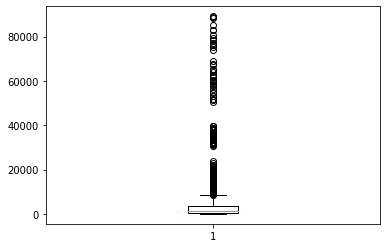

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(F_store_gender['여성_이용횟수'])
plt.figure(figsize = (20, 20))
plt.show()

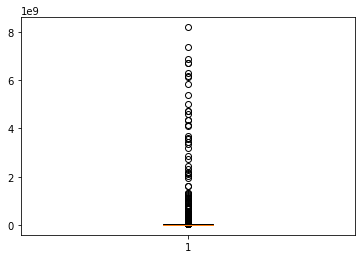

<Figure size 4320x4320 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(F_store_gender['여성_구매금액'])
plt.figure(figsize = (60, 60))
plt.show()

In [ ]:
import numpy as np

# 필요한 데이터만 골라서 합치기
store_gender = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '성별']], on = '고객번호')

# 여성만 골라내기
F_store_gender = store_gender.query("성별 == 'F'")

# 점포별, 분기별 이용횟수 및 구매금액 구하기
F_store_gender = F_store_gender.groupby(['점포코드', '분기'])[['고객번호', '구매금액']].agg({'고객번호' : 'count', '구매금액' : 'sum'}).reset_index()
F_store_gender.columns = ['점포코드', '분기', '여성_이용횟수', '여성_구매금액']

# 없는 분기에는 0으로 값 채우기
for i in F_store_gender['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = F_store_gender.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '여성_이용횟수' : 0, '여성_구매금액' : 0}, index = [0])
      F_store_gender = pd.concat([F_store_gender, add_df])

F_store_gender = F_store_gender.sort_values(['점포코드', '분기']).reset_index().iloc[:, 1:]

# 이용횟수 등급 구하기(20등급)
F_store_gender['여성이용횟수_등급'] = np.log1p(F_store_gender['여성_이용횟수'])
labels = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(F_store_gender['여성이용횟수_등급'], 20, labels = labels)
F_store_gender['여성이용횟수_등급'] = bins

# 구매금액 등급 구하기(30등급)
F_store_gender['여성구매금액_등급'] = np.log1p(F_store_gender['여성_구매금액'])
labels = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(F_store_gender['여성구매금액_등급'], 30, labels = labels)
F_store_gender['여성구매금액_등급'] = bins
F_store_gender

,점포코드,분기,여성_이용횟수,여성_구매금액,여성이용횟수_등급,여성구매금액_등급
0,A1,1,32554,4329361050,2,1
1,A1,2,38137,4726419530,2,1
2,A1,3,36144,4108896650,2,1
3,A1,4,38814,5388437100,2,1
4,A1,5,34786,4607985400,2,1
...,...,...,...,...,...,...
1299,D8,4,192,1168230,11,12
1300,D8,5,183,1448420,11,12
1301,D8,6,349,2768970,10,11
1302,D8,7,215,2705850,11,11


In [ ]:
F_store_gender[['점포코드', '분기', '여성이용횟수_등급', '여성구매금액_등급']].to_csv('female_count_feature_1.csv')

### 남성의 이용횟수 및 구매금액

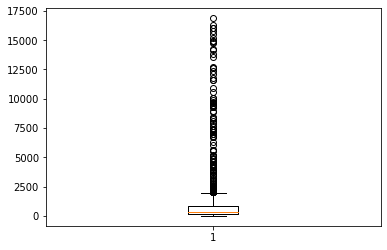

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(M_store_gender['남성_이용횟수'])
plt.figure(figsize = (20, 20))
plt.show()

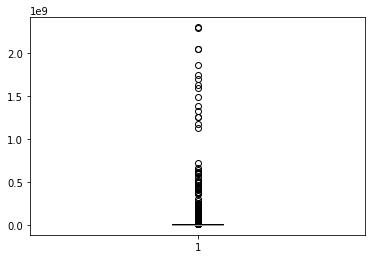

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(M_store_gender['남성_구매금액'])
plt.figure(figsize = (20, 20))
plt.show()

In [ ]:
import numpy as np

# 필요한 데이터만 골라서 합치기
store_gender = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '성별']], on = '고객번호')

# 남성만 골라내기
M_store_gender = store_gender.query("성별 == 'M'")

# 점포별, 분기별 이용횟수 및 구매금액 구하기
M_store_gender = M_store_gender.groupby(['점포코드', '분기'])[['고객번호', '구매금액']].agg({'고객번호' : 'count', '구매금액' : 'sum'}).reset_index()
M_store_gender.columns = ['점포코드', '분기', '남성_이용횟수', '남성_구매금액']

# 없는 분기에는 0으로 값 채우기
for i in M_store_gender['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = M_store_gender.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '남성_이용횟수' : 0, '남성_구매금액' : 0}, index = [0])
      M_store_gender = pd.concat([M_store_gender, add_df])

M_store_gender.reset_index(inplace = True)
M_store_gender = M_store_gender.sort_values(['점포코드', '분기']).reset_index().iloc[:, 1:]

# # 이용횟수 등급 구하기(20등급)
M_store_gender['남성이용횟수_등급'] = np.log1p(M_store_gender['남성_이용횟수'])
labels = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(M_store_gender['남성이용횟수_등급'], 20, labels = labels)
M_store_gender['남성이용횟수_등급'] = bins


# # 구매금액 등급 구하기(30등급)
M_store_gender['남성구매금액_등급'] = np.log1p(M_store_gender['남성_구매금액'])
labels = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(M_store_gender['남성구매금액_등급'], 30, labels = labels)
M_store_gender['남성구매금액_등급'] = bins
M_store_gender

,index,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급,남성구매금액_등급
0,0,A1,1,6089,1178828260,3,1
1,1,A1,2,7426,1492873860,2,1
2,2,A1,3,6772,1123602350,2,1
3,3,A1,4,7892,2299230340,2,1
4,4,A1,5,7014,1251558270,2,1
...,...,...,...,...,...,...,...
1299,1265,D8,4,110,692910,11,12
1300,1266,D8,5,87,621550,11,12
1301,1267,D8,6,118,1132160,11,11
1302,1268,D8,7,111,598140,11,12


In [ ]:
M_store_gender.groupby('남성구매금액_등급').count()

,index,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급
남성구매금액_등급,,,,,,
"(-0.0216, 0.719]",34,34,34,34,34,34
"(0.719, 1.437]",0,0,0,0,0,0
"(1.437, 2.156]",0,0,0,0,0,0
"(2.156, 2.874]",0,0,0,0,0,0
"(2.874, 3.593]",0,0,0,0,0,0
"(3.593, 4.311]",0,0,0,0,0,0
"(4.311, 5.03]",0,0,0,0,0,0
"(5.03, 5.748]",0,0,0,0,0,0
"(5.748, 6.467]",0,0,0,0,0,0


In [ ]:
# ['C242', 'C343', 'C474', 'C477', 'C522', 'C557']
M_store_gender[M_store_gender['점포코드'] == 'C557']

,점포코드,분기,남성_이용횟수,남성_구매금액
1096,C557,3,31,135730
1097,C557,4,51,220260
1098,C557,5,30,130040
1099,C557,6,5,20750
1100,C557,7,31,181530
1101,C557,8,29,122420
0,C557,1,0,0
0,C557,2,0,0


In [ ]:
M_store_gender = M_store_gender.iloc[:, 1:]
M_store_gender

,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급,남성구매금액_등급
0,A1,1,6089,1178828260,"(8.273, 8.759]",1
1,A1,2,7426,1492873860,"(8.759, 9.246]",1
2,A1,3,6772,1123602350,"(8.759, 9.246]",1
3,A1,4,7892,2299230340,"(8.759, 9.246]",1
4,A1,5,7014,1251558270,"(8.759, 9.246]",1
...,...,...,...,...,...,...
1299,D8,4,110,692910,"(4.38, 4.866]",12
1300,D8,5,87,621550,"(4.38, 4.866]",12
1301,D8,6,118,1132160,"(4.38, 4.866]",11
1302,D8,7,111,598140,"(4.38, 4.866]",12


In [ ]:
M_store_gender[['점포코드', '분기', '남성이용횟수_등급', '남성구매금액_등급']].to_csv('male_store_feature_1.csv')

In [ ]:
M_store_gender.to_csv('male_store_feature_1.csv')

## 구개고객 연령대

### 각 연령대 비율

In [ ]:
# 필요한 칼럼만 추려내서 테이블 합치기
age_store = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '연령대']], on = '고객번호')

# groupby해서 묶기
age_gen_store = age_store.groupby(['점포코드', '분기', '연령대'])[['고객번호']].count().reset_index()

# 위 테이블로 피벗 만들고 테이블로 만들기
age_store_pivot = pd.pivot_table(age_gen_store, index = ['점포코드', '분기'], columns = '연령대', values = '고객번호').reset_index()

# NaN값 0으로 바꾸기
age_store_pivot = age_store_pivot.fillna(0)

# 각 연령대 등급화하기
for i in range(2, 12):
  labels = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
  bins = pd.cut(age_store_pivot.iloc[:, i], 10, labels = labels)
  age_store_pivot.iloc[:, i] = bins

# 칼럼명 바꾸기
age_store_pivot.columns = ['점포코드', '분기', '19세이하_등급', '20세~24세_등급', '25세~29세_등급', '30세~34세_등급', '35세~39세_등급',
                        '40세~44세_등급', '45세~49세_등급', '50세~54세_등급', '55세~59세_등급', '60세이상_등급']
age_store_pivot

In [ ]:
age_store_pivot

,점포코드,분기,19세이하_등급,20세~24세_등급,25세~29세_등급,30세~34세_등급,35세~39세_등급,40세~44세_등급,45세~49세_등급,50세~54세_등급,55세~59세_등급,60세이상_등급
0,A1,1st,10,7,5,4,7,6,7,7,8,8
1,A1,2nd,10,6,4,3,6,6,7,7,7,7
2,A1,3rd,10,6,3,3,7,6,7,7,7,7
3,A1,4th,10,5,2,2,6,6,7,7,7,7
4,A1,5th,10,5,1,3,7,6,7,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4th,10,10,10,10,10,10,10,10,10,10
1300,D8,5th,10,10,10,10,10,10,10,10,10,10
1301,D8,6th,10,9,9,10,10,10,10,10,10,10
1302,D8,7th,10,9,10,10,10,10,10,10,10,10


In [ ]:
age_store_pivot.to_csv('age_gen_feature_2.csv')

In [ ]:
# 필요한 칼럼만 추려내서 테이블 합치기
age_store = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '연령대']], on = '고객번호')

# groupby해서 묶기
age_gen_store = age_store.groupby(['점포코드', '분기', '연령대'])[['고객번호']].count().reset_index()
age_gen_store.columns = ['점포코드', '분기', '연령대', '연령별_count']

# 각 점포별 연령 비율 알기 위해 각 점포 전체 고객수 count해서 합치기
total_count = age_store.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
age_gen_store = pd.merge(age_gen_store, total_count, on = ['점포코드', '분기'])
age_gen_store['연령별비율'] = age_gen_store['연령별_count']/age_gen_store['고객번호']

# 테이블 정리하기
age_gen_store = age_gen_store[['점포코드', '분기', '연령대', '연령별비율']]

# 위 테이블로 피벗 만들고 테이블로 만들기
age_store_pivot = pd.pivot_table(age_gen_store, index = ['점포코드', '분기'], columns = '연령대', values = '연령별비율').reset_index()

# NaN값 0으로 바꾸기
age_store_pivot = age_store_pivot.fillna(0)
age_store_pivot

연령대,점포코드,분기,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상
0,A1,1,0.000000,0.009808,0.037678,0.120488,0.105996,0.168077,0.167948,0.146728,0.112310,0.130968
1,A1,2,0.000000,0.011479,0.040208,0.114654,0.105875,0.157211,0.165244,0.156465,0.118342,0.130523
2,A1,3,0.000047,0.011371,0.044972,0.120468,0.105672,0.146379,0.162247,0.152577,0.118091,0.138177
3,A1,4,0.000021,0.013596,0.049523,0.126515,0.102150,0.161821,0.165461,0.150859,0.099816,0.130240
4,A1,5,0.000000,0.016483,0.056579,0.124139,0.099665,0.167967,0.160287,0.145550,0.102440,0.126890
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4,0.000000,0.215232,0.559603,0.026490,0.188742,0.003311,0.000000,0.006623,0.000000,0.000000
1300,D8,5,0.000000,0.244444,0.525926,0.025926,0.192593,0.000000,0.003704,0.007407,0.000000,0.000000
1301,D8,6,0.000000,0.269807,0.569593,0.004283,0.130621,0.008565,0.010707,0.006424,0.000000,0.000000
1302,D8,7,0.000000,0.392638,0.420245,0.015337,0.138037,0.000000,0.015337,0.018405,0.000000,0.000000


In [ ]:
age_store_pivot['19세이하'] = age_store_pivot['19세이하']*19
age_store_pivot['20세~24세'] = age_store_pivot['20세~24세']*24
age_store_pivot['25세~29세'] = age_store_pivot['25세~29세']*29
age_store_pivot['30세~34세'] = age_store_pivot['30세~34세']*34
age_store_pivot['35세~39세'] = age_store_pivot['35세~39세']*39
age_store_pivot['40세~44세'] = age_store_pivot['40세~44세']*44
age_store_pivot['45세~49세'] = age_store_pivot['45세~49세']*49
age_store_pivot['50세~54세'] = age_store_pivot['50세~54세']*54
age_store_pivot['55세~59세'] = age_store_pivot['55세~59세']*59
age_store_pivot['60세이상'] = age_store_pivot['60세이상']*60
age_store_pivot

연령대,점포코드,분기,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상
0,A1,1,0.000000,0.235385,1.092669,4.096576,4.133841,7.395389,8.229434,7.923298,6.626297,7.858086
1,A1,2,0.000000,0.275487,1.166034,3.898251,4.129140,6.917279,8.096943,8.449092,6.982157,7.831354
2,A1,3,0.000885,0.272905,1.304176,4.095908,4.121190,6.440675,7.950112,8.239165,6.967378,8.290614
3,A1,4,0.000407,0.326296,1.436154,4.301503,3.983835,7.120113,8.107566,8.146362,5.889136,7.814414
4,A1,5,0.000000,0.395598,1.640789,4.220718,3.886938,7.390526,7.854067,7.859713,6.043971,7.613397
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4,0.000000,5.165563,16.228477,0.900662,7.360927,0.145695,0.000000,0.357616,0.000000,0.000000
1300,D8,5,0.000000,5.866667,15.251852,0.881481,7.511111,0.000000,0.181481,0.400000,0.000000,0.000000
1301,D8,6,0.000000,6.475375,16.518201,0.145610,5.094218,0.376874,0.524625,0.346895,0.000000,0.000000
1302,D8,7,0.000000,9.423313,12.187117,0.521472,5.383436,0.000000,0.751534,0.993865,0.000000,0.000000


In [ ]:
age_store_pivot['연령대가중치합'] = age_store_pivot.sum(axis = 1)
age_store_pivot

<ipython-input-220-b02ee6dd41d3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  age_store_pivot['연령대가중치합'] = age_store_pivot.sum(axis = 1)


연령대,점포코드,분기,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상,연령대가중치합
0,A1,1,0.000000,0.235385,1.092669,4.096576,4.133841,7.395389,8.229434,7.923298,6.626297,7.858086,48.590974
1,A1,2,0.000000,0.275487,1.166034,3.898251,4.129140,6.917279,8.096943,8.449092,6.982157,7.831354,49.745737
2,A1,3,0.000885,0.272905,1.304176,4.095908,4.121190,6.440675,7.950112,8.239165,6.967378,8.290614,50.683009
3,A1,4,0.000407,0.326296,1.436154,4.301503,3.983835,7.120113,8.107566,8.146362,5.889136,7.814414,51.125787
4,A1,5,0.000000,0.395598,1.640789,4.220718,3.886938,7.390526,7.854067,7.859713,6.043971,7.613397,51.905718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4,0.000000,5.165563,16.228477,0.900662,7.360927,0.145695,0.000000,0.357616,0.000000,0.000000,34.158940
1300,D8,5,0.000000,5.866667,15.251852,0.881481,7.511111,0.000000,0.181481,0.400000,0.000000,0.000000,35.092593
1301,D8,6,0.000000,6.475375,16.518201,0.145610,5.094218,0.376874,0.524625,0.346895,0.000000,0.000000,35.481799
1302,D8,7,0.000000,9.423313,12.187117,0.521472,5.383436,0.000000,0.751534,0.993865,0.000000,0.000000,36.260736


In [ ]:
age_store_pivot[['점포코드', '분기', '연령대가중치합']].to_csv('age_store_feature_2.csv')

## 평균방문점포수


In [ ]:
# 필요한 내용만 추출하기
store_count = df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']]

# 필요한 컬럼 추가하기
store_count['방문점포'] = store_count['점포코드'].copy()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,B,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
1,B,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
2,B,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
3,B,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
4,B,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,B,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,08,7th
8336525,B,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,08,7th
8336526,B,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,08,7th
8336527,B,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,08,7th


In [ ]:
store_count.query("고객번호 == 2716")['분기'].unique()

array(['4th', '3rd', '2nd', '1st', '5th', '7th', '6th', '8th'],
      dtype=object)

In [ ]:
# 1분기
store_count_1st = store_count.query("분기 == '1st'")
quarter_1_dict = {}

for i in store_count_1st['점포코드'].unique():
  cust_list = [x for x in store_count_1st.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_1st.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_1_dict[f'{i}'] = average
quarter_1_dict

{'B8': 3.292507204610951,
 'C306': 2.823529411764706,
 'A12': 3.1584269662921347,
 'A20': 3.1757618710134654,
 'A1': 3.0239710538218,
 'A2': 3.2572488199595413,
 'A9': 2.671826625386997,
 'D3': 4.64367816091954,
 'D4': 4.12,
 'D1': 3.6341463414634148,
 'D12': 4.487804878048781,
 'A26': 3.736517719568567,
 'A24': 3.622429906542056,
 'C325': 3.125,
 'A3': 3.574144486692015,
 'C15': 3.25,
 'A39': 3.0866336633663365,
 'C312': 3.4649122807017543,
 'C310': 2.3043478260869565,
 'C236': 3.4363636363636365,
 'C318': 3.7661290322580645,
 'B13': 3.2036363636363636,
 'B14': 2.621495327102804,
 'B9': 3.0730088495575223,
 'B7': 3.5995397008055234,
 'C319': 2.1363636363636362,
 'A5': 2.909547738693467,
 'D11': 3.888888888888889,
 'B6': 3.415525114155251,
 'D2': 3.85,
 'D10': 4.035714285714286,
 'D6': 4.054054054054054,
 'D7': 3.9402985074626864,
 'B4': 3.557446808510638,
 'C331': 3.78,
 'C434': 1.0,
 'D5': 4.5,
 'C342': 3.7547169811320753,
 'C571': 3.6,
 'D8': 4.090909090909091,
 'C573': 3.125,
 'B11

In [ ]:
# 2분기
store_count_2nd = store_count.query("분기 == '2nd'")
quarter_2_dict = {}

for i in store_count_2nd['점포코드'].unique():
  cust_list = [x for x in store_count_2nd.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_2nd.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_2_dict[f'{i}'] = average
quarter_2_dict

{'C306': 2.0,
 'A1': 3.05504984828782,
 'D3': 5.06140350877193,
 'A2': 3.344504021447721,
 'A24': 3.679035250463822,
 'A26': 3.9228611500701263,
 'D12': 4.462686567164179,
 'A20': 3.195361911454673,
 'C356': 1.6875,
 'B41': 2.3354632587859423,
 'B11': 3.849906191369606,
 'B7': 3.8035502958579883,
 'B9': 3.2672413793103448,
 'A12': 3.2668957617411225,
 'D6': 4.578947368421052,
 'A5': 2.79295154185022,
 'B14': 2.841860465116279,
 'C312': 3.392857142857143,
 'C236': 3.9642857142857144,
 'B13': 3.2504504504504506,
 'C571': 3.6923076923076925,
 'A9': 2.606811145510836,
 'D2': 4.195652173913044,
 'A3': 3.5272727272727273,
 'C318': 3.6083916083916083,
 'C310': 2.892857142857143,
 'D7': 3.7567567567567566,
 'D11': 5.35,
 'D4': 4.388888888888889,
 'A39': 3.1095571095571097,
 'C325': 2.9310344827586206,
 'B6': 3.5096618357487923,
 'C331': 3.6607142857142856,
 'B4': 3.581818181818182,
 'D1': 4.0,
 'C330': 2.6666666666666665,
 'C15': 3.3548387096774195,
 'B8': 3.2386706948640485,
 'C434': 1.0,
 'D

In [ ]:
# 3분기
store_count_3rd = store_count.query("분기 == '3rd'")
quarter_3_dict = {}

for i in store_count_3rd['점포코드'].unique():
  cust_list = [x for x in store_count_3rd.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_3rd.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_3_dict[f'{i}'] = average
quarter_3_dict

{'B7': 3.7969107551487413,
 'B12': 3.4661654135338344,
 'C434': 1.0,
 'C306': 2.1875,
 'C318': 4.0,
 'C325': 2.3793103448275863,
 'A5': 3.0535714285714284,
 'B6': 3.5558194774346794,
 'B8': 3.350983358547655,
 'A20': 3.259831460674157,
 'A1': 3.079916317991632,
 'D12': 4.741935483870968,
 'A12': 3.212486308871851,
 'A2': 3.363546146212372,
 'C331': 3.74,
 'D3': 4.6722689075630255,
 'B9': 3.168627450980392,
 'D5': 3.3548387096774195,
 'D7': 3.342857142857143,
 'A3': 3.5850178359096314,
 'A26': 3.8658854166666665,
 'B13': 3.219600725952813,
 'D2': 3.5675675675675675,
 'D1': 3.3454545454545452,
 'B11': 3.7353951890034365,
 'B3': 3.1083333333333334,
 'B14': 2.7442922374429224,
 'A9': 2.7405731523378583,
 'A24': 3.774757281553398,
 'D10': 4.087719298245614,
 'C312': 3.4745762711864407,
 'B41': 2.517906336088154,
 'D11': 4.388888888888889,
 'D6': 3.918918918918919,
 'C330': 2.130434782608696,
 'C319': 2.5652173913043477,
 'C356': 1.875,
 'D4': 4.32258064516129,
 'A39': 3.0776699029126213,
 '

In [ ]:
# 4분기
store_count_4th = store_count.query("분기 == '4th'")
quarter_4_dict = {}

for i in store_count_4th['점포코드'].unique():
  cust_list = [x for x in store_count_4th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_4th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_4_dict[f'{i}'] = average
quarter_4_dict

{'B7': 3.7525342874180083,
 'C434': 1.0,
 'A26': 3.7791164658634537,
 'D10': 3.953846153846154,
 'B13': 3.280357142857143,
 'C306': 2.0588235294117645,
 'D12': 4.448275862068965,
 'D11': 4.052631578947368,
 'D7': 3.514018691588785,
 'A1': 3.03800170794193,
 'A12': 3.310308182784272,
 'C331': 3.6862745098039214,
 'C312': 3.543103448275862,
 'C330': 3.526315789473684,
 'B9': 3.214141414141414,
 'D5': 2.9565217391304346,
 'C325': 2.4482758620689653,
 'D2': 3.6296296296296298,
 'D3': 4.541666666666667,
 'D1': 3.625,
 'A2': 3.313015873015873,
 'C310': 2.32,
 'A9': 2.6302158273381293,
 'A20': 3.1769662921348316,
 'A24': 3.7314285714285713,
 'C318': 3.8435374149659864,
 'C535': 3.0416666666666665,
 'C573': 2.888888888888889,
 'B12': 3.573529411764706,
 'B6': 3.464720194647202,
 'A39': 3.008968609865471,
 'B41': 2.5558912386706947,
 'A3': 3.4787472035794185,
 'A5': 2.8820960698689957,
 'D6': 3.59375,
 'D4': 4.25,
 'B14': 2.9907834101382487,
 'C294': 1.0,
 'C319': 2.4,
 'C571': 3.5,
 'C356': 2.

In [ ]:
# 5분기
store_count_5th = store_count.query("분기 == '5th'")
quarter_5_dict = {}

for i in store_count_5th['점포코드'].unique():
  cust_list = [x for x in store_count_5th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_5th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_5_dict[f'{i}'] = average
quarter_5_dict

{'B13': 3.2646536412078153,
 'B7': 3.6943231441048034,
 'B11': 3.702749140893471,
 'D3': 4.475,
 'C330': 3.0526315789473686,
 'D1': 3.3380281690140845,
 'C306': 2.1714285714285713,
 'C331': 3.6296296296296298,
 'C312': 3.40625,
 'C310': 1.8181818181818181,
 'B9': 3.0833333333333335,
 'C319': 2.727272727272727,
 'B8': 3.2152466367713006,
 'B12': 3.316666666666667,
 'C318': 3.7941176470588234,
 'D2': 3.5098039215686274,
 'A2': 3.269883527454243,
 'B6': 3.232843137254902,
 'A3': 3.452694610778443,
 'D5': 3.25,
 'C535': 3.076923076923077,
 'A12': 3.1989473684210528,
 'A9': 2.620740740740741,
 'D4': 4.314285714285714,
 'C1': 3.6564885496183206,
 'D7': 3.9243697478991595,
 'D12': 4.45,
 'A1': 3.011826544021025,
 'C325': 2.793103448275862,
 'C573': 2.888888888888889,
 'B14': 2.892523364485981,
 'A20': 3.1632216678545975,
 'A24': 3.6557377049180326,
 'D10': 4.323529411764706,
 'A26': 3.817415730337079,
 'D11': 3.838709677419355,
 'B41': 2.4986149584487536,
 'A5': 2.9205607476635516,
 'D6': 3.9

In [ ]:
# 6분기
store_count_6th = store_count.query("분기 == '6th'")
quarter_6_dict = {}

for i in store_count_6th['점포코드'].unique():
  cust_list = [x for x in store_count_6th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_6th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_6_dict[f'{i}'] = average
quarter_6_dict

{'B13': 3.1785063752276868,
 'B9': 3.134020618556701,
 'B7': 3.6873449131513647,
 'A1': 2.9837147887323945,
 'D3': 4.689922480620155,
 'D8': 2.8181818181818183,
 'B14': 2.683720930232558,
 'B12': 3.3046875,
 'D12': 4.294117647058823,
 'A20': 3.1245474293989863,
 'C310': 2.2916666666666665,
 'C312': 3.656716417910448,
 'B41': 2.490740740740741,
 'C330': 2.1052631578947367,
 'C246': 2.6875,
 'C319': 2.7083333333333335,
 'C318': 3.801470588235294,
 'A12': 3.1847206385404787,
 'B11': 3.713163064833006,
 'D4': 4.05,
 'A2': 3.243478260869565,
 'A9': 2.607717041800643,
 'C331': 3.6785714285714284,
 'B6': 3.325814536340852,
 'D1': 3.621212121212121,
 'C306': 2.8333333333333335,
 'C325': 2.4193548387096775,
 'D2': 4.125,
 'D5': 3.967741935483871,
 'D10': 4.132075471698113,
 'D6': 3.8780487804878048,
 'D7': 3.774193548387097,
 'A26': 3.742128935532234,
 'A24': 3.6405353728489485,
 'D11': 4.305555555555555,
 'B8': 3.2296875,
 'C434': 1.0,
 'A5': 2.9033816425120773,
 'C571': 3.2,
 'C573': 3.666666

In [ ]:
# 7분기
store_count_7th = store_count.query("분기 == '7th'")
quarter_7_dict = {}

for i in store_count_7th['점포코드'].unique():
  cust_list = [x for x in store_count_7th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_7th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_7_dict[f'{i}'] = average
quarter_7_dict

{'B11': 3.691743119266055,
 'B7': 3.7141990291262137,
 'C310': 2.48,
 'D10': 3.9782608695652173,
 'D3': 4.291666666666667,
 'D1': 3.462686567164179,
 'D11': 4.4,
 'B10': 2.787878787878788,
 'B8': 3.1533742331288344,
 'B9': 3.0892857142857144,
 'D4': 4.083333333333333,
 'D5': 3.433333333333333,
 'B14': 2.8794642857142856,
 'C331': 3.8,
 'C246': 3.1176470588235294,
 'B13': 3.165745856353591,
 'B12': 3.159090909090909,
 'C318': 3.7555555555555555,
 'C1': 3.5655737704918034,
 'C325': 2.28125,
 'C312': 3.472972972972973,
 'B3': 3.234234234234234,
 'D8': 3.5,
 'D12': 4.728571428571429,
 'C317': 2.9,
 'C14': 3.0,
 'B41': 2.5680473372781063,
 'D6': 3.85,
 'C319': 2.3636363636363638,
 'D2': 3.775,
 'A5': 3.0216450216450217,
 'C434': 1.0,
 'C571': 3.142857142857143,
 'C573': 3.4285714285714284,
 'D7': 3.8020833333333335,
 'C356': 1.9230769230769231,
 'A20': 3.179224579370885,
 'A2': 3.2823800131492438,
 'A3': 3.550943396226415,
 'A1': 3.011240812797233,
 'A24': 3.757201646090535,
 'A12': 3.14705

In [ ]:
# 8분기
store_count_8th = store_count.query("분기 == '8th'")
quarter_8_dict = {}

for i in store_count_8th['점포코드'].unique():
  cust_list = [x for x in store_count_8th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_8th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_8_dict[f'{i}'] = average
quarter_8_dict

{'B7': 3.7347580138277814,
 'C308': 3.611111111111111,
 'C141': 3.1875,
 'D10': 4.3,
 'D8': 3.8,
 'D7': 3.9444444444444446,
 'A2': 3.228473733291887,
 'D11': 4.15625,
 'C331': 3.9642857142857144,
 'C139': 3.564766839378238,
 'B14': 2.811926605504587,
 'B8': 3.208469055374593,
 'B9': 3.147286821705426,
 'C22': 4.4,
 'D12': 4.318181818181818,
 'B41': 2.6253602305475505,
 'A26': 3.8559670781893005,
 'C99': 3.5,
 'C97': 3.5,
 'C20': 3.7674418604651163,
 'C14': 3.0,
 'D5': 3.6923076923076925,
 'C142': 2.8,
 'B13': 3.141472868217054,
 'C191': 4.051282051282051,
 'C19': 3.864406779661017,
 'D3': 4.306666666666667,
 'A20': 3.180293501048218,
 'A12': 3.235613463626493,
 'C318': 3.671232876712329,
 'C143': 3.260869565217391,
 'A9': 2.6897590361445785,
 'D6': 3.8684210526315788,
 'C310': 2.5652173913043477,
 'C319': 2.9583333333333335,
 'D1': 3.0919540229885056,
 'C300': 3.92,
 'C325': 3.1,
 'C317': 3.5517241379310347,
 'B6': 3.443589743589744,
 'D2': 3.4468085106382977,
 'A24': 3.652255639097744

In [ ]:
import pandas as pd
q1 = pd.DataFrame(quarter_1_dict.values(), index = quarter_1_dict.keys())
q2 = pd.DataFrame(quarter_2_dict.values(), index = quarter_2_dict.keys())
q3 = pd.DataFrame(quarter_3_dict.values(), index = quarter_3_dict.keys())
q4 = pd.DataFrame(quarter_4_dict.values(), index = quarter_4_dict.keys())
q5 = pd.DataFrame(quarter_5_dict.values(), index = quarter_5_dict.keys())
q6 = pd.DataFrame(quarter_6_dict.values(), index = quarter_6_dict.keys())
q7 = pd.DataFrame(quarter_7_dict.values(), index = quarter_7_dict.keys())
q8 = pd.DataFrame(quarter_8_dict.values(), index = quarter_8_dict.keys())

In [ ]:
q1['분기'] = '1st'
q2['분기'] = '2nd'
q3['분기'] = '3rd'
q4['분기'] = '4th'
q5['분기'] = '5th'
q6['분기'] = '6th'
q7['분기'] = '7th'
q8['분기'] = '8th'

In [ ]:
q1 = q1.reset_index()
q1.columns = ['점포코드', '이용점포평균', '분기']

q2 = q2.reset_index()
q2.columns = ['점포코드', '이용점포평균', '분기']

q3 = q3.reset_index()
q3.columns = ['점포코드', '이용점포평균', '분기']

q4 = q4.reset_index()
q4.columns = ['점포코드', '이용점포평균', '분기']

q5 = q5.reset_index()
q5.columns = ['점포코드', '이용점포평균', '분기']

q6 = q6.reset_index()
q6.columns = ['점포코드', '이용점포평균', '분기']

q7 = q7.reset_index()
q7.columns = ['점포코드', '이용점포평균', '분기']

q8 = q8.reset_index()
q8.columns = ['점포코드', '이용점포평균', '분기']

In [ ]:
store_count_df = pd.concat([q1, q2, q3, q4, q5, q6, q7, q8], axis = 0)
store_count_df

,점포코드,이용점포평균,분기
0,B8,3.292507,1st
1,C306,2.823529,1st
2,A12,3.158427,1st
3,A20,3.175762,1st
4,A1,3.023971,1st
...,...,...,...
158,C113,4.000000,8th
159,C242,3.000000,8th
160,B15,4.221519,8th
161,C412,2.500000,8th


In [ ]:
store_count = store_count_df.sort_values(['점포코드', '분기'])
store_count

,점포코드,이용점포평균,분기
4,A1,3.023971,1st
1,A1,3.055050,2nd
10,A1,3.079916,3rd
9,A1,3.038002,4th
27,A1,3.011827,5th
...,...,...,...
41,D8,3.937500,4th
40,D8,3.571429,5th
5,D8,2.818182,6th
22,D8,3.500000,7th


In [ ]:
store_count['점포이용평균'] = store_count['이용점포평균'].copy()
store_count

,점포코드,이용점포평균,분기,점포이용평균
4,A1,3.023971,1st,3.023971
1,A1,3.055050,2nd,3.055050
10,A1,3.079916,3rd,3.079916
9,A1,3.038002,4th,3.038002
27,A1,3.011827,5th,3.011827
...,...,...,...,...
41,D8,3.937500,4th,3.937500
40,D8,3.571429,5th,3.571429
5,D8,2.818182,6th,2.818182
22,D8,3.500000,7th,3.500000


In [ ]:
store_count = store_count[['점포코드', '분기', '점포이용평균']].reset_index().iloc[:, 1:]
store_count

,점포코드,분기,점포이용평균
0,A1,1st,3.023971
1,A1,2nd,3.055050
2,A1,3rd,3.079916
3,A1,4th,3.038002
4,A1,5th,3.011827
...,...,...,...
1299,D8,4th,3.937500
1300,D8,5th,3.571429
1301,D8,6th,2.818182
1302,D8,7th,3.500000


In [ ]:
store_count.to_csv('store_count_feature_3.csv')

## VIP 타점포 방문횟수

In [ ]:
# 필요한 칼럼만 추출하기
df_purprodtr = df_purprodtr[['고객번호', '점포코드', '분기', '구매금액']]

# 점포별 고객 수의 10% 구하기
cust_count = df_purprodtr.drop_duplicates(['고객번호', '점포코드', '분기'])
cust_count = cust_count.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
cust_count['고객번호'] = [int(x * 0.1) for x in cust_count['고객번호']]

# 각 점포의 분기, 고객번호 별 구매금액 구하기
top_cust = df_purprodtr.groupby(['점포코드', '분기', '고객번호'])[['구매금액']].sum().reset_index()
top_cust = top_cust.sort_values('구매금액', ascending = False)
top_cust = top_cust.sort_values(['점포코드', '분기'])
top_cust = top_cust.reset_index().iloc[:, 1:]

# 두 테이블 합치기
merge_to_count = pd.merge(cust_count, top_cust, on = ['점포코드', '분기'])
merge_to_count.columns = ['점포코드', '분기', '상위고객수', '고객번호', '구매금액']

# 상위고객만 뽑아서 테이블 만듦
target_df = pd.DataFrame()

for i in merge_to_count['점포코드'].unique():
  for j in merge_to_count['분기'].unique():
    df = merge_to_count.query(f"점포코드 == '{i}' & 분기 == {j}")
    num = int(df['상위고객수'].unique())
    df_toadd = df.iloc[:num+1, :]
    target_df = pd.concat([target_df, df_toadd])

target_df = target_df.reset_index().iloc[:, 1:]
target_df
# 각 점포마다 분기별 상위고객들의 평균이용 점포수를 구하기 위한 for문
import pandas as pd

vip_count_df = pd.DataFrame({'점포코드' : [], '분기' : [], '상위고객평균점포수' : []})

for i in df_purprodtr['점포코드'].unique():
  for j in df_purprodtr['분기'].unique():
    cust_list = [x for x in target_df.query(f"점포코드 == '{i}' & 분기 == {j}")['고객번호'].unique()]
    cust_store_count = 0
    for cust in cust_list:
      num = len(df_purprodtr.query(f"고객번호 == {int(cust)}")['점포코드'].unique())
      cust_store_count += num
    average = cust_store_count / len(cust_list)
    vip_count_df = vip_count_df.append({'점포코드' : f'{i}', '분기' : f'{j}', '상위고객평균점포수' : average}, ignore_index = True)

vip_count_df

,점포코드,분기,상위고객수,고객번호,구매금액
0,A1,1,221,39,70381190
1,A1,1,221,562,59336440
2,A1,1,221,1355,55857680
3,A1,1,221,6867,53999270
4,A1,1,221,6355,50896430
...,...,...,...,...,...
18419,D8,7,2,16424,588240
18420,D8,7,2,2430,310800
18421,D8,8,2,16127,501350
18422,D8,8,2,8915,284970


In [ ]:
vip_count_df = vip_count_df.sort_values(['점포코드', '분기'])
vip_count_df

,점포코드,분기,상위고객평균점포수
58,A1,1,5.328829
59,A1,2,5.580087
57,A1,3,5.491667
56,A1,4,5.761702
62,A1,5,5.414847
...,...,...,...
384,D8,4,6.000000
390,D8,5,5.000000
391,D8,6,6.000000
388,D8,7,8.000000


In [ ]:
vip_count_df.to_csv('vip_store_count_Feature_4.csv')

## 소액/고액 매출기여도

In [ ]:
# 필요한 피처만 추출
df_purprodtr = df_purprodtr[['점포코드', '분기', '고객번호', '구매금액']]

# 전체 구매금액
entire_purchase = df_purprodtr.groupby(['점포코드', '분기'])[['구매금액']].sum().reset_index()
entire_purchase.columns = ['점포코드', '분기', '총구매금액']

# 소액고객 비율 보기(기준 10만원)
small_purchase = price_df.query("구매금액 < 100000").groupby(['점포코드', '분기'])[['구매금액']].sum().reset_index()
small_purchase.columns = ['점포코드', '분기', '소액구매금액']

small_purchase = pd.merge(small_purchase, entire_purchase, on = ['점포코드', '분기'])

small_purchase['소액금액비율'] = small_purchase['소액구매금액'] / small_purchase['총구매금액']

small_purch = small_purchase[['점포코드', '분기', '소액금액비율']]

small_purch
# 고액은 점포별로 기준 정하기
high_stand = df_purprodtr.groupby(['점포코드', '분기'])[['구매금액']].max().reset_index()
high_stand['상위기준'] = [round(x*0.7) for x in high_stand['구매금액']]

# 전체 데이터랑 상위기준 합치기
large_purchase = pd.merge(df_purprodtr, high_stand[['점포코드', '분기', '상위기준']], on = ['점포코드', '분기'])
large_purchase

# 고액구매금액
large_purchase = large_purchase.query("구매금액 > 상위기준").groupby(['점포코드', '분기'])[['구매금액']].sum().reset_index()
large_purchase.columns = ['점포코드', '분기', '고액구매금액']

# 전체랑 합치기
large_purchase = pd.merge(large_purchase, entire_purchase, on = ['점포코드', '분기'])

# large_purchase
large_purchase['고액구매비율'] = large_purchase['고액구매금액'] / large_purchase['총구매금액']
large_purchase = large_purchase[['점포코드', '분기', '고액구매비율']]
large_purchase

,점포코드,분기,고객번호,구매금액
0,B7,4,2716,14400
1,B7,4,9017,4880
2,B7,4,9017,7900
3,B7,4,9017,4500
4,B7,4,9017,10000
...,...,...,...,...
8336524,B12,7,766,9100
8336525,B12,7,766,1000
8336526,B12,7,766,6800
8336527,B12,7,766,8500


In [ ]:
small_purch

,점포코드,분기,소액금액비율
0,A1,1,0.115458
1,A1,2,0.125628
2,A1,3,0.140259
3,A1,4,0.104061
4,A1,5,0.117692
...,...,...,...
1299,D8,4,1.000000
1300,D8,5,1.000000
1301,D8,6,0.961627
1302,D8,7,0.893523


In [ ]:
large_purchase

,점포코드,분기,고액구매비율
0,A1,1,0.008624
1,A1,2,0.013313
2,A1,3,0.036111
3,A1,4,0.018128
4,A1,5,0.025754
...,...,...,...
1299,D8,4,0.045134
1300,D8,5,0.041450
1301,D8,6,0.038373
1302,D8,7,0.045097


In [ ]:
pd.merge(small_purch, large_purchase, on = ['점포코드', '분기']).to_csv('small_large_feature_5.csv')

## 소액/고액 구매고객들의 구매비율

In [ ]:
# 필요한 피처만 추출
df_purprodtr = df_purprodtr[['점포코드', '분기', '고객번호', '구매금액']]

# 전체 구매금액
entire_purchase = df_purprodtr.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
entire_purchase.columns = ['점포코드', '분기', '총고객수']
entire_purchase

# 소액고객 비율 보기(기준 10만원)
small_cust = price_df.query("구매금액 < 100000").groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
small_cust.columns = ['점포코드', '분기', '소액고객수']
small_cust = pd.merge(small_cust, entire_purchase, on = ['점포코드', '분기'])
small_cust['소액고객비율'] = small_cust['소액고객수'] / small_cust['총고객수']
small_cust = small_cust[['점포코드', '분기', '소액고객비율']]
small_cust

,점포코드,분기,소액고객비율
0,A1,1,0.798773
1,A1,2,0.808858
2,A1,3,0.829131
3,A1,4,0.803002
4,A1,5,0.816077
...,...,...,...
1299,D8,4,1.000000
1300,D8,5,1.000000
1301,D8,6,0.997859
1302,D8,7,0.990798


In [ ]:
# 고액은 점포별로 기준 정하기
high_stand = df_purprodtr.groupby(['점포코드', '분기'])[['구매금액']].max().reset_index()
high_stand['상위기준'] = [round(x*0.7) for x in high_stand['구매금액']]

# 전체 데이터랑 상위기준 합치기
large_purchase = pd.merge(df_purprodtr, high_stand[['점포코드', '분기', '상위기준']], on = ['점포코드', '분기'])
large_purchase

# 고액구매금액
large_purchase = large_purchase.query("구매금액 > 상위기준").groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
large_purchase.columns = ['점포코드', '분기', '고액고객수']
large_purchase

,점포코드,분기,고액고객수
0,A1,1,1
1,A1,2,1
2,A1,3,3
3,A1,4,4
4,A1,5,3
...,...,...,...
1299,D8,4,1
1300,D8,5,1
1301,D8,6,1
1302,D8,7,1


In [ ]:
# large_purchase= pd.merge(large_purchase, entire_purchase, on = ['점포코드', '분기'])
large_purchase['고액고객비율'] = large_purchase['고액고객수'] / large_purchase['총고객수']
large_purchase

,점포코드,분기,고액고객수,총고객수,고액고객비율
0,A1,1,1,38643,0.000026
1,A1,2,1,45563,0.000022
2,A1,3,3,42916,0.000070
3,A1,4,4,46706,0.000086
4,A1,5,3,41800,0.000072
...,...,...,...,...,...
1299,D8,4,1,302,0.003311
1300,D8,5,1,270,0.003704
1301,D8,6,1,467,0.002141
1302,D8,7,1,326,0.003067


In [ ]:
large_count = large_purchase[['점포코드', '분기', '고액고객비율']]
large_count

,점포코드,분기,고액고객비율
0,A1,1,0.000026
1,A1,2,0.000022
2,A1,3,0.000070
3,A1,4,0.000086
4,A1,5,0.000072
...,...,...,...
1299,D8,4,0.003311
1300,D8,5,0.003704
1301,D8,6,0.002141
1302,D8,7,0.003067


In [ ]:
pd.merge(small_cust, large_count, on = ['점포코드', '분기']).to_csv('cust_port_Feature_6.csv')

In [ ]:
pd.merge(small_cust, large_count, on = ['점포코드', '분기']).to_csv('cust_port_Feature_6.csv')

## 재방문율

In [ ]:
# 필요한 칼럼만 추출
visit_df = df_purprodtr[['점포코드', '분기', '구매일자', '고객번호']]
visit_df

temp = visit_df.groupby(['점포코드', '분기', '고객번호'])[['구매일자']].count().reset_index()
temp.columns = ['점포코드', '분기', '고객번호', '재방문수']

In [ ]:
df = visit_df.groupby(['점포코드','분기','고객번호','구매일자']).count().reset_index().groupby(['점포코드','분기','고객번호'])[['구매일자']].count().reset_index()
df1 = df[df['구매일자']>=2]

In [ ]:
df1 = df1.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
df1

,점포코드,분기,고객번호
0,A1,1,1335
1,A1,2,1384
2,A1,3,1413
3,A1,4,1393
4,A1,5,1349
...,...,...,...
1295,D8,4,10
1296,D8,5,12
1297,D8,6,13
1298,D8,7,9


In [ ]:
# 없는 분기에는 0으로 값 채우기
for i in df1['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = df1.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '고객번호' : 0}, index = [0])
      df1 = pd.concat([df1, add_df])

df1 = df1.sort_values(['점포코드', '분기']).reset_index().iloc[:, 1:]
df1

,점포코드,분기,고객번호
0,A1,1,1335
1,A1,2,1384
2,A1,3,1413
3,A1,4,1393
4,A1,5,1349
...,...,...,...
1299,D8,4,10
1300,D8,5,12
1301,D8,6,13
1302,D8,7,9


In [ ]:
aa = visit_df.groupby(['점포코드', '분기', '고객번호']).count().reset_index()
aa = aa[['점포코드', '분기', '고객번호']].groupby(['점포코드', '분기'])[['고객번호']].count()
aa

고객번호
점포코드 분기      
A1   1   2211
     2   2307
     3   2390
     4   2342
     5   2283
...       ...
D8   4     16
     5     21
     6     22
     7     20
     8     20

[1304 rows x 1 columns]

In [ ]:
aa.reset_index(inplace = True)

In [ ]:
aa.columns = ['점포코드', '분기', '전체고객수']
aa

,점포코드,분기,전체고객수
0,A1,1,2211
1,A1,2,2307
2,A1,3,2390
3,A1,4,2342
4,A1,5,2283
...,...,...,...
1299,D8,4,16
1300,D8,5,21
1301,D8,6,22
1302,D8,7,20


In [ ]:
bb = pd.concat([df1, aa['전체고객수']], axis = 1)
bb.columns = ['점포코드', '분기', '재방문고객수', '전체고객수']
bb

,점포코드,분기,재방문고객수,전체고객수
0,A1,1,1335,2211
1,A1,2,1384,2307
2,A1,3,1413,2390
3,A1,4,1393,2342
4,A1,5,1349,2283
...,...,...,...,...
1299,D8,4,10,16
1300,D8,5,12,21
1301,D8,6,13,22
1302,D8,7,9,20


In [ ]:
bb['재방문율'] = bb['재방문고객수'] / bb['전체고객수']
bb

,점포코드,분기,재방문고객수,전체고객수,재방문율
0,A1,1,1335,2211,0.603799
1,A1,2,1384,2307,0.599913
2,A1,3,1413,2390,0.591213
3,A1,4,1393,2342,0.594791
4,A1,5,1349,2283,0.590889
...,...,...,...,...,...
1299,D8,4,10,16,0.625000
1300,D8,5,12,21,0.571429
1301,D8,6,13,22,0.590909
1302,D8,7,9,20,0.450000


In [ ]:
bb = bb[['점포코드', '분기', '재방문율']]
bb

,점포코드,분기,재방문율
0,A1,1,0.603799
1,A1,2,0.599913
2,A1,3,0.591213
3,A1,4,0.594791
4,A1,5,0.590889
...,...,...,...
1299,D8,4,0.625000
1300,D8,5,0.571429
1301,D8,6,0.590909
1302,D8,7,0.450000


In [ ]:
bb[['점포코드', '분기', '재방문율']].to_csv('revisit_cust_Feature_6.csv')

## 인구수 

In [ ]:
store_list = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_store_list.csv').iloc[:, 1:]
store_list

,점포코드,시군구
0,A1,서대문구
1,A12,강남구
2,A2,송파구
3,A20,노원구
4,A24,강북구
...,...,...
158,D4,강북구
159,D5,강남구
160,D6,강북구
161,D7,성동구


In [ ]:
population = pd.read_csv('/content/인구수_세대수.csv').iloc[2:, 1:]
population.columns = ['구', '2014_세대수', '2014_세대당인구', '2015_세대수', '2015_세대당인구']
population.reset_index(inplace = True)
population

,index,구,2014_세대수,2014_세대당인구,2015_세대수,2015_세대당인구
0,2,종로구,73101,2.15,72645,2.13
1,3,중구,59960,2.14,59321,2.12
2,4,용산구,108429,2.18,107512,2.17
3,5,성동구,125814,2.35,126714,2.34
4,6,광진구,158524,2.29,158353,2.28
5,7,동대문구,159880,2.27,159941,2.25
6,8,중랑구,176714,2.37,176390,2.35
7,9,성북구,193359,2.41,190973,2.40
8,10,강북구,141246,2.37,141088,2.35
9,11,도봉구,136977,2.58,136903,2.57


In [ ]:
population = population.iloc[:, 1:]
population

,구,2014_세대수,2014_세대당인구,2015_세대수,2015_세대당인구
0,종로구,73101,2.15,72645,2.13
1,중구,59960,2.14,59321,2.12
2,용산구,108429,2.18,107512,2.17
3,성동구,125814,2.35,126714,2.34
4,광진구,158524,2.29,158353,2.28
5,동대문구,159880,2.27,159941,2.25
6,중랑구,176714,2.37,176390,2.35
7,성북구,193359,2.41,190973,2.40
8,강북구,141246,2.37,141088,2.35
9,도봉구,136977,2.58,136903,2.57


In [ ]:
population['2014_세대수'] = population['2014_세대수'].astype(int)
population['2015_세대수'] = population['2015_세대수'].astype(int)
population['2014_세대당인구'] = population['2014_세대당인구'].astype(float)
population['2015_세대당인구'] = population['2015_세대당인구'].astype(float)

In [ ]:
population['2014_인구수'] = population['2014_세대수'] * population['2014_세대당인구']
population['2015_인구수'] = population['2015_세대수'] * population['2015_세대당인구']
population

,구,2014_세대수,2014_세대당인구,2015_세대수,2015_세대당인구,2014_인구수,2015_인구수
0,종로구,73101,2.15,72645,2.13,157167.15,154733.85
1,중구,59960,2.14,59321,2.12,128314.40,125760.52
2,용산구,108429,2.18,107512,2.17,236375.22,233301.04
3,성동구,125814,2.35,126714,2.34,295662.90,296510.76
4,광진구,158524,2.29,158353,2.28,363019.96,361044.84
5,동대문구,159880,2.27,159941,2.25,362927.60,359867.25
6,중랑구,176714,2.37,176390,2.35,418812.18,414516.50
7,성북구,193359,2.41,190973,2.40,465995.19,458335.20
8,강북구,141246,2.37,141088,2.35,334753.02,331556.80
9,도봉구,136977,2.58,136903,2.57,353400.66,351840.71


In [ ]:
df_pop = population[['구', '2014_인구수',	'2015_인구수']]
df_pop.columns = ['시군구', '2014_인구수',	'2015_인구수']
df_pop

,시군구,2014_인구수,2015_인구수
0,종로구,157167.15,154733.85
1,중구,128314.40,125760.52
2,용산구,236375.22,233301.04
3,성동구,295662.90,296510.76
4,광진구,363019.96,361044.84
5,동대문구,362927.60,359867.25
6,중랑구,418812.18,414516.50
7,성북구,465995.19,458335.20
8,강북구,334753.02,331556.80
9,도봉구,353400.66,351840.71


In [ ]:
city_info = pd.merge(store_list, df_pop, on = '시군구')
city_info

,점포코드,시군구,2014_인구수,2015_인구수
0,A1,서대문구,309994.00,312271.00
1,B9,서대문구,309994.00,312271.00
2,C130,서대문구,309994.00,312271.00
3,C133,서대문구,309994.00,312271.00
4,C145,서대문구,309994.00,312271.00
...,...,...,...,...
158,D8,중랑구,418812.18,414516.50
159,C187,강동구,475916.80,458490.32
160,C474,강동구,475916.80,458490.32
161,C489,강동구,475916.80,458490.32


In [ ]:
city_info.columns = ['점포코드', '시군구', 'population_TRAIN', 'population_VAL_TEST']
city_info

,점포코드,시군구,population_TRAIN,population_VAL_TEST
0,A1,서대문구,309994.00,312271.00
1,B9,서대문구,309994.00,312271.00
2,C130,서대문구,309994.00,312271.00
3,C133,서대문구,309994.00,312271.00
4,C145,서대문구,309994.00,312271.00
...,...,...,...,...
158,D8,중랑구,418812.18,414516.50
159,C187,강동구,475916.80,458490.32
160,C474,강동구,475916.80,458490.32
161,C489,강동구,475916.80,458490.32


## 자동차등록수

In [ ]:
car_df = pd.read_csv('/content/자동차등록.csv').iloc[4:, 1:]
car_df.columns = ['시군구', '2014', '2015']
car_df

,시군구,2014,2015
4,종로구,37040,37256
5,중구,39714,39105
6,용산구,63240,64104
7,성동구,72303,74728
8,광진구,75070,76681
9,동대문구,72947,74503
10,중랑구,79946,82142
11,성북구,94294,95679
12,강북구,57200,58573
13,도봉구,72891,74536


In [ ]:
car_df['2014'] = car_df['2014'].astype(int)
car_df['2015'] = car_df['2015'].astype(int)

In [ ]:
car_df

,시군구,2014,2015
4,종로구,37040,37256
5,중구,39714,39105
6,용산구,63240,64104
7,성동구,72303,74728
8,광진구,75070,76681
9,동대문구,72947,74503
10,중랑구,79946,82142
11,성북구,94294,95679
12,강북구,57200,58573
13,도봉구,72891,74536


In [ ]:
city_info = pd.merge(city_info, car_df, on = '시군구')
city_info

,점포코드,시군구,population_TRAIN,population_VAL_TEST,2014,2015
0,A1,서대문구,309994.00,312271.00,63801,66439
1,B9,서대문구,309994.00,312271.00,63801,66439
2,C130,서대문구,309994.00,312271.00,63801,66439
3,C133,서대문구,309994.00,312271.00,63801,66439
4,C145,서대문구,309994.00,312271.00,63801,66439
...,...,...,...,...,...,...
158,D8,중랑구,418812.18,414516.50,79946,82142
159,C187,강동구,475916.80,458490.32,110960,109595
160,C474,강동구,475916.80,458490.32,110960,109595
161,C489,강동구,475916.80,458490.32,110960,109595


In [ ]:
city_info.columns = ['점포코드', '시군구', 'population_TRAIN',	'population_VAL_TEST', 'car_regi_TRAIN', 'car_regi_VAL_TEST']
city_info

,점포코드,시군구,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
0,A1,서대문구,309994.00,312271.00,63801,66439
1,B9,서대문구,309994.00,312271.00,63801,66439
2,C130,서대문구,309994.00,312271.00,63801,66439
3,C133,서대문구,309994.00,312271.00,63801,66439
4,C145,서대문구,309994.00,312271.00,63801,66439
...,...,...,...,...,...,...
158,D8,중랑구,418812.18,414516.50,79946,82142
159,C187,강동구,475916.80,458490.32,110960,109595
160,C474,강동구,475916.80,458490.32,110960,109595
161,C489,강동구,475916.80,458490.32,110960,109595


In [ ]:
city = city_info[['점포코드', 'population_TRAIN',	'population_VAL_TEST', 'car_regi_TRAIN', 'car_regi_VAL_TEST']]
city

,점포코드,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
0,A1,309994.00,312271.00,63801,66439
1,B9,309994.00,312271.00,63801,66439
2,C130,309994.00,312271.00,63801,66439
3,C133,309994.00,312271.00,63801,66439
4,C145,309994.00,312271.00,63801,66439
...,...,...,...,...,...
158,D8,418812.18,414516.50,79946,82142
159,C187,475916.80,458490.32,110960,109595
160,C474,475916.80,458490.32,110960,109595
161,C489,475916.80,458490.32,110960,109595


In [ ]:
city.to_csv('city_info.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

sigungu = [x for x in city_info['시군구']]
encoder = LabelEncoder()
encoder.fit(sigungu)
labels = encoder.transform(sigungu)
print(labels)

[13 13 13 13 13 13 13 13 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17  8  8  8  8  8  8  8  8  8  8  8  8  2  2  2  2  2  2  2
  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 20 20 20  4  4  4 19 19 19
 19 19  7  7  7  7  6  6 15 15 15 15 15  9  9  9  9  9  9  9  3  3  3  3
  3  3  3  3  3  3 16 16 16 16 16 14 14 14 14 14 14 14 18 18 18 21 21 21
 21 12 12 12 12 12 12 12 22 22 22 23 24 24 24  1  1  1 11]


In [ ]:
city_info['sigungu'] = labels
city_info

,점포코드,시군구,인구수,자동차등록수,sigungu
0,A1,서대문구,466129.5,97020.5,13
1,B9,서대문구,466129.5,97020.5,13
2,C130,서대문구,466129.5,97020.5,13
3,C133,서대문구,466129.5,97020.5,13
4,C145,서대문구,466129.5,97020.5,13
...,...,...,...,...,...
158,D8,중랑구,626070.0,121017.0,24
159,C187,강동구,705161.0,165757.5,1
160,C474,강동구,705161.0,165757.5,1
161,C489,강동구,705161.0,165757.5,1


In [ ]:
city_info[['시군구', 'sigungu']].to_csv('sigungu_encoding.csv')

In [ ]:
aa = city_info[['점포코드', 'sigungu', '인구수', '자동차등록수']]
aa

,점포코드,sigungu,인구수,자동차등록수
0,A1,13,466129.5,97020.5
1,B9,13,466129.5,97020.5
2,C130,13,466129.5,97020.5
3,C133,13,466129.5,97020.5
4,C145,13,466129.5,97020.5
...,...,...,...,...
158,D8,24,626070.0,121017.0
159,C187,1,705161.0,165757.5
160,C474,1,705161.0,165757.5
161,C489,1,705161.0,165757.5


# 제품 분류 피처

### 1.대분류명 인코딩

In [ ]:
fd_f['대분류명_재'].unique()

array(['일상용품', '행사상품', '신선식품', '가공식품', '기타', '패션의류/잡화', '유아용품', '스포츠/레저',
       '디지털/가전', '교육/문화용품', '명품', '가구/인테리어', '교육/문화', nan, '행사식품', '행사삭품',
       '명퓸', '신석식품', '유아식품'], dtype=object)

In [ ]:
item=['일상용품', '행사상품', '신선식품', '가공식품', '기타', '패션의류/잡화', '유아용품', '스포츠/레저','디지털/가전', '교육/문화용품', '명품', '가구/인테리어', '교육/문화', '행사식품', '행사삭품','명퓸', '신석식품', '유아식품']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(item)
labels = encoder.transform(item)

print('인코딩 변환 값:', labels)
print('인코딩 클래스:',encoder.classes_)

인코딩 변환 값: [13 16 10  0  4 14 12  8  5  3  6  1  2 17 15  7  9 11]
인코딩 클래스: ['가공식품' '가구/인테리어' '교육/문화' '교육/문화용품' '기타' '디지털/가전' '명품' '명퓸' '스포츠/레저'
 '신석식품' '신선식품' '유아식품' '유아용품' '일상용품' '패션의류/잡화' '행사삭품' '행사상품' '행사식품']


In [ ]:
import pandas as pd
df = pd.DataFrame(labels)
df.columns=['인코딩']
# pd.get_dummies(df)

labels =fd_f['대분류명_재'].unique()
sd = pd.DataFrame(labels)
sd.columns=['대분류명_재']

df= pd.concat([sd,df],axis=1)
df                             

,대분류명_재,인코딩
0,일상용품,13.0
1,행사상품,16.0
2,신선식품,10.0
3,가공식품,0.0
4,기타,4.0
5,패션의류/잡화,14.0
6,유아용품,12.0
7,스포츠/레저,8.0
8,디지털/가전,5.0
9,교육/문화용품,3.0


In [ ]:
#결측치 확인
df.isnull().sum()

대분류명_재    1
인코딩       1
dtype: int64

In [ ]:

#결측치 fillna 하기기
df = df.fillna(18.0)
df.isnull().sum()

대분류명_재    0
인코딩       0
dtype: int64

In [ ]:
df        

,대분류명_재,인코딩
0,일상용품,13.0
1,행사상품,16.0
2,신선식품,10.0
3,가공식품,0.0
4,기타,4.0
5,패션의류/잡화,14.0
6,유아용품,12.0
7,스포츠/레저,8.0
8,디지털/가전,5.0
9,교육/문화용품,3.0


In [ ]:
# 기존 데이터에 merge함.

fd_f_1 = pd.merge(fd_f, df, on ='대분류명_재')
fd_f_1

,소분류코드,소분류명,고객번호,성별,연령대,제휴사,점포코드,구매시간,구매금액,년도,월,분기,중분류명_재,대분류명_재,시군구,인코딩
0,A010101,위생세제,1,M,60세이상,A,A12,15,9500,2014,2,1st,위생용품,일상용품,강남구,13.0
1,A010101,위생세제,1,M,60세이상,A,A12,15,5000,2014,9,3rd,위생용품,일상용품,강남구,13.0
2,A010101,위생세제,1,M,60세이상,A,A12,11,19810,2014,1,1st,위생용품,일상용품,강남구,13.0
3,A010101,위생세제,1,M,60세이상,A,A12,12,1000,2015,3,5th,위생용품,일상용품,강남구,13.0
4,A010101,위생세제,1,M,60세이상,A,A12,17,6800,2015,11,8th,위생용품,일상용품,강남구,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288904,C130404,유아음료,17973,F,55세~59세,C,C114,12,5580,2015,2,5th,영유아식품,유아식품,양천구,18.0
8288905,C130404,유아음료,17973,F,55세~59세,C,C114,20,2790,2015,4,6th,영유아식품,유아식품,양천구,18.0
8288906,C130404,유아음료,17973,F,55세~59세,C,C114,19,5580,2015,3,5th,영유아식품,유아식품,양천구,18.0
8288907,C130404,유아음료,17973,F,55세~59세,C,C114,11,2800,2015,4,6th,영유아식품,유아식품,양천구,18.0


In [ ]:
# fd_f_1 데이터를 분기별로 나눔
d_1 = fd_f_1.query("분기 == '1st'")
d_2 = fd_f_1.query("분기 == '2nd'")
d_3 = fd_f_1.query("분기 == '3rd'")
d_4 = fd_f_1.query("분기 == '4th'")
d_5 = fd_f_1.query("분기 == '5th'")
d_6 = fd_f_1.query("분기 == '6th'")
d_7 = fd_f_1.query("분기 == '7th'")
d_8 = fd_f_1.query("분기 == '8th'")
# d_1

In [ ]:

# 점포별, 대분류명별, (대분류명 인코딩)한거 카운트 하기
d_1i=d_1.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_2i=d_2.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_3i=d_3.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_4i=d_4.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_5i=d_5.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_6i=d_6.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_7i=d_7.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_8i=d_8.groupby(["점포코드",'인코딩'])[['대분류명_재']].count().reset_index()
d_1i

,점포코드,인코딩,대분류명_재
0,A1,0.0,15984
1,A1,1.0,535
2,A1,3.0,2
3,A1,5.0,584
4,A1,6.0,1096
...,...,...,...
1253,D8,0.0,98
1254,D8,3.0,1
1255,D8,5.0,2
1256,D8,13.0,43


In [ ]:
# # 점포별, 대분류명별, (대분류명 인코딩)한거 카운트 하기
# d_1i=d_1.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_2i=d_2.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_3i=d_3.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_4i=d_4.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_5i=d_5.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_6i=d_6.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_7i=d_7.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_8i=d_8.groupby(["점포코드",'대분류명_재'])[['인코딩']].count().reset_index()
# d_1i

In [ ]:
#인코딩 결과를 점포별로 (max) 랭킹 찾기기 
d_1i['rank'] = d_1i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_2i['rank'] = d_2i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_3i['rank'] = d_3i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_4i['rank'] = d_4i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_5i['rank'] = d_5i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_6i['rank'] = d_6i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_7i['rank'] = d_7i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)
d_8i['rank'] = d_8i.groupby(["점포코드"])[['대분류명_재']].rank(method='max', ascending=False)

In [ ]:
# #인코딩 결과를 점포별로 (max) 랭킹 찾기기 
# d_1i['rank'] = d_1i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_2i['rank'] = d_2i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_3i['rank'] = d_3i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_4i['rank'] = d_4i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_5i['rank'] = d_5i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_6i['rank'] = d_6i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_7i['rank'] = d_7i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_8i['rank'] = d_8i.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)

#### 대분류명 점포별 최다판매 1위 구하기

In [ ]:
# 각 분기별 점포별 랭킹 1위만 모으기기
d_1i =d_1i[d_1i['rank']==1.0].iloc[:,:2]
d_2i =d_2i[d_2i['rank']==1.0].iloc[:,:2]
d_3i =d_3i[d_3i['rank']==1.0].iloc[:,:2]
d_4i =d_4i[d_4i['rank']==1.0].iloc[:,:2]
d_5i =d_5i[d_5i['rank']==1.0].iloc[:,:2]
d_6i =d_6i[d_6i['rank']==1.0].iloc[:,:2]
d_7i =d_7i[d_7i['rank']==1.0].iloc[:,:2]
d_8i =d_8i[d_8i['rank']==1.0].iloc[:,:2]
d_8i

,점포코드,인코딩
0,A1,0.0
11,A12,0.0
22,A2,0.0
33,A20,0.0
43,A24,0.0
...,...,...
1204,D4,0.0
1211,D5,13.0
1217,D6,13.0
1222,D7,13.0


In [ ]:
# 각 분기별 랭킹 1위 대분류명을 바꾸기기
d_1i = d_1i.rename(columns={'인코딩':'대인코딩_1'})
d_2i = d_2i.rename(columns={'인코딩':'대인코딩_2'})
d_3i = d_3i.rename(columns={'인코딩':'대인코딩_3'})
d_4i = d_4i.rename(columns={'인코딩':'대인코딩_4'})
d_5i = d_5i.rename(columns={'인코딩':'대인코딩_5'})
d_6i = d_6i.rename(columns={'인코딩':'대인코딩_6'})
d_7i = d_7i.rename(columns={'인코딩':'대인코딩_7'})
d_8i = d_8i.rename(columns={'인코딩':'대인코딩_8'})

#### < 최종 점포별 분기별 대분류명 >

In [ ]:
#분기별로 점포코드별 대분류명을 모으기기
import pandas as pd
g_1= pd.merge(d_1i, d_2i, on ='점포코드')
g_1= pd.merge(g_1, d_3i, on ='점포코드')
g_1= pd.merge(g_1, d_4i, on ='점포코드')
g_1= pd.merge(g_1, d_5i, on ='점포코드')
g_1= pd.merge(g_1, d_6i, on ='점포코드')
g_1= pd.merge(g_1, d_7i, on ='점포코드')
g_1= pd.merge(g_1, d_8i, on ='점포코드')
g_1

,점포코드,대인코딩_1,대인코딩_2,대인코딩_3,대인코딩_4,대인코딩_5,대인코딩_6,대인코딩_7,대인코딩_8
0,A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
158,D4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,D5,13.0,13.0,13.0,13.0,13.0,0.0,0.0,13.0
160,D6,0.0,0.0,13.0,13.0,13.0,13.0,13.0,13.0
161,D7,0.0,0.0,13.0,13.0,13.0,13.0,13.0,13.0


In [ ]:
g_1.to_csv("최다판매대분류(2).csv", index = False)

### 2.중분류명 인코딩

In [ ]:
fd_f['중분류명_재'].unique()

array(['위생용품', '미용용품', '생활용품', '기타행사', '축산물', '축산가공', '유제품/아이스크림', '과자류',
       '유기농', '농산물', '농산가공', '식품행사', '수산물', '수산가공', '냉동식품', '외식', '빵류/떡류',
       '가공식품_기타', '기타', '커피/차류', '음료류', '조미료', '건강식품', '주류', '액세서리/잡화',
       '모자', '패션의류/잡화_기타', '가방', '신발', '유아동의류', '영유아용품', '의류행사', '영유아의류',
       '의류', '언더웨어', '스포츠의류/신발/잡화', '골프용품', '음향가전', '주방가전', '생활가전',
       '컴퓨터/주변기기', '카메라', '악기', '음반/음원', '계절가전', '가전행사', '명품잡화', '명품의류',
       '주방용품', '서적', '인테리어소품', '가구', '문화생활', '과일', nan, '영유아식품', '생활',
       '캠핑용품', '일용잡화', '청소/욕실용품', '문구/완구/사무용품', '음반/음원/비디오', '학습기기',
       '애완용품', '원예용품', '자동차용품', '미용용픔', '스포츠장비/용품', '유아용의류', '뷰티/헤어가전',
       '부품/액세서리', '통신가전', '자동차기기', '명품', '식품가공', '농식품행사', '의약품/의료기기',
       '유아용모자', '유제품', '문구/사무용품'], dtype=object)

In [ ]:
fd_f['중분류명_재'].isnull().sum()

69424

In [ ]:
fd_f['중분류명_재'] = fd_f['중분류명_재'].fillna('영유아')

In [ ]:
items =['위생용품', '미용용품', '생활용품', '기타행사', '축산물', '축산가공', '유제품/아이스크림', '과자류',
       '유기농', '농산물', '농산가공', '식품행사', '수산물', '수산가공', '냉동식품', '외식', '빵류/떡류',
       '가공식품_기타', '기타', '커피/차류', '음료류', '조미료', '건강식품', '주류', '액세서리/잡화',
       '모자', '패션의류/잡화_기타', '가방', '신발', '유아동의류', '영유아용품', '의류행사', '영유아의류',
       '의류', '언더웨어', '스포츠의류/신발/잡화', '골프용품', '음향가전', '주방가전', '생활가전',
       '컴퓨터/주변기기', '카메라', '악기', '음반/음원', '계절가전', '가전행사', '명품잡화', '명품의류',
       '주방용품', '서적', '인테리어소품', '가구', '문화생활', '과일', '영유아','영유아식품', '생활',
       '캠핑용품', '일용잡화', '청소/욕실용품', '문구/완구/사무용품', '음반/음원/비디오', '학습기기',
       '애완용품', '원예용품', '자동차용품', '미용용픔', '스포츠장비/용품', '유아용의류', '뷰티/헤어가전',
       '부품/액세서리', '통신가전', '자동차기기', '명품', '식품가공', '농식품행사', '의약품/의료기기',
       '유아용모자', '유제품', '문구/사무용품']

In [ ]:
len(items)

80

In [ ]:
fd_f['중분류명_재'].isnull().sum()

0

In [ ]:

from sklearn.preprocessing import LabelEncoder

encoders = LabelEncoder()
encoders.fit(items)
labelss = encoders.transform(items)

print('인코딩 변환 값:', labelss)
print('인코딩 클래스:',encoders.classes_)
print('디코딩 원본값:', encoders.inverse_transform([47, 22, 29, 10, 71, 70, 53,  8, 48, 13, 12, 36, 32, 31, 11, 45, 26,  0,  9, 74, 54,
                                             65,  4, 66, 40 ,18, 77,  2 ,37, 49, 43, 59, 44, 58, 41, 33,  6, 57, 67, 28, 75, 72, 38, 55,
                                             5,  3, 17, 16, 68,30, 61,  1, 21, 7, 42, 27, 73, 62 ,69 ,20, 56,
                                             78, 39, 46, 64, 23, 34, 51, 25, 24, 76, 63,15, 35, 14, 60, 50, 52, 19 ]))

인코딩 변환 값: [48 22 29 10 72 71 54  8 49 13 12 36 32 31 11 46 26  0  9 75 55 66  4 67
 40 18 78  2 37 50 44 60 45 59 41 33  6 58 68 28 76 73 38 56  5  3 17 16
 69 30 62  1 21  7 42 43 27 74 63 70 20 57 79 39 47 65 23 34 52 25 24 77
 64 15 35 14 61 51 53 19]
인코딩 클래스: ['가공식품_기타' '가구' '가방' '가전행사' '건강식품' '계절가전' '골프용품' '과일' '과자류' '기타' '기타행사'
 '냉동식품' '농산가공' '농산물' '농식품행사' '명품' '명품의류' '명품잡화' '모자' '문구/사무용품'
 '문구/완구/사무용품' '문화생활' '미용용품' '미용용픔' '부품/액세서리' '뷰티/헤어가전' '빵류/떡류' '생활' '생활가전'
 '생활용품' '서적' '수산가공' '수산물' '스포츠의류/신발/잡화' '스포츠장비/용품' '식품가공' '식품행사' '신발' '악기'
 '애완용품' '액세서리/잡화' '언더웨어' '영유아' '영유아식품' '영유아용품' '영유아의류' '외식' '원예용품' '위생용품'
 '유기농' '유아동의류' '유아용모자' '유아용의류' '유제품' '유제품/아이스크림' '음료류' '음반/음원' '음반/음원/비디오'
 '음향가전' '의류' '의류행사' '의약품/의료기기' '인테리어소품' '일용잡화' '자동차기기' '자동차용품' '조미료' '주류'
 '주방가전' '주방용품' '청소/욕실용품' '축산가공' '축산물' '카메라' '캠핑용품' '커피/차류' '컴퓨터/주변기기'
 '통신가전' '패션의류/잡화_기타' '학습기기']
디코딩 원본값: ['원예용품' '미용용품' '생활용품' '기타행사' '축산가공' '청소/욕실용품' '유제품' '과자류' '위생용품' '농산물'
 '농산가공' '식품행사' '수산물' '수산가공' '냉동식품' '영유아의류' '빵류/떡류

In [ ]:
import pandas as pd
df = pd.DataFrame(labelss)
df.columns=['인코딩']
# pd.get_dummies(df)

labelss =fd_f['중분류명_재'].unique()
sd = pd.DataFrame(labelss)
sd.columns=['중분류명_재']

df= pd.concat([sd,df],axis=1)
df

,중분류명_재,인코딩
0,위생용품,48
1,미용용품,22
2,생활용품,29
3,기타행사,10
4,축산물,72
...,...,...
75,농식품행사,14
76,의약품/의료기기,61
77,유아용모자,51
78,유제품,53


In [ ]:
#결측치 확인하기기
print(df.isnull().sum())

중분류명_재    0
인코딩       0
dtype: int64


In [ ]:
# 기존 데이터와 (중분류 명인코딩) 한거 merge
fd_f_2=pd.merge(fd_f, df, on ='중분류명_재')
len(fd_f_2['중분류명_재'].unique())

80

In [ ]:
fd_f_2

,소분류코드,소분류명,고객번호,성별,연령대,제휴사,점포코드,구매시간,구매금액,년도,월,분기,중분류명_재,대분류명_재,시군구,인코딩
0,A010101,위생세제,1,M,60세이상,A,A12,15,9500,2014,2,1st,위생용품,일상용품,강남구,48
1,A010101,위생세제,1,M,60세이상,A,A12,15,5000,2014,9,3rd,위생용품,일상용품,강남구,48
2,A010101,위생세제,1,M,60세이상,A,A12,11,19810,2014,1,1st,위생용품,일상용품,강남구,48
3,A010101,위생세제,1,M,60세이상,A,A12,12,1000,2015,3,5th,위생용품,일상용품,강남구,48
4,A010101,위생세제,1,M,60세이상,A,A12,17,6800,2015,11,8th,위생용품,일상용품,강남구,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,D060401,기타파티/팬시용품,17528,F,25세~29세,D,D8,14,8800,2015,4,6th,문구/사무용품,교육/문화용품,중랑구,19
8336525,D060401,기타파티/팬시용품,18057,F,20세~24세,D,D8,14,500,2015,3,5th,문구/사무용품,교육/문화용품,중랑구,19
8336526,D060401,기타파티/팬시용품,18977,F,20세~24세,D,D8,13,2500,2014,12,4th,문구/사무용품,교육/문화용품,중랑구,19
8336527,D060401,기타파티/팬시용품,18986,F,20세~24세,D,D8,12,9800,2015,8,7th,문구/사무용품,교육/문화용품,중랑구,19


In [ ]:
# 분기별로 나누기기
d_1g = fd_f_2.query("분기 == '1st'")
d_2g = fd_f_2.query("분기 == '2nd'")
d_3g = fd_f_2.query("분기 == '3rd'")
d_4g = fd_f_2.query("분기 == '4th'")
d_5g = fd_f_2.query("분기 == '5th'")
d_6g = fd_f_2.query("분기 == '6th'")
d_7g = fd_f_2.query("분기 == '7th'")
d_8g = fd_f_2.query("분기 == '8th'")
d_1g

,소분류코드,소분류명,고객번호,성별,연령대,제휴사,점포코드,구매시간,구매금액,년도,월,분기,중분류명_재,대분류명_재,시군구,인코딩
0,A010101,위생세제,1,M,60세이상,A,A12,15,9500,2014,2,1st,위생용품,일상용품,강남구,48
2,A010101,위생세제,1,M,60세이상,A,A12,11,19810,2014,1,1st,위생용품,일상용품,강남구,48
8,A010101,위생세제,34,F,60세이상,A,A12,12,8700,2014,3,1st,위생용품,일상용품,강남구,48
9,A010101,위생세제,34,F,60세이상,A,A12,16,5000,2014,1,1st,위생용품,일상용품,강남구,48
11,A010101,위생세제,34,F,60세이상,A,A12,16,5000,2014,1,1st,위생용품,일상용품,강남구,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336409,D060401,기타파티/팬시용품,1359,F,55세~59세,D,D10,12,11900,2014,2,1st,문구/사무용품,교육/문화용품,노원구,19
8336457,D060401,기타파티/팬시용품,13054,F,30세~34세,D,D12,21,15000,2014,3,1st,문구/사무용품,교육/문화용품,송파구,19
8336458,D060401,기타파티/팬시용품,13315,M,45세~49세,D,D12,21,11900,2014,3,1st,문구/사무용품,교육/문화용품,송파구,19
8336469,D060401,기타파티/팬시용품,13315,M,45세~49세,D,D5,19,11900,2014,3,1st,문구/사무용품,교육/문화용품,강남구,19


In [ ]:
# 점포별, 대분류명별, (대분류명 인코딩)한거 카운트 하기
d_1gi=d_1g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_2gi=d_2g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_3gi=d_3g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_4gi=d_4g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_5gi=d_5g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_6gi=d_6g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_7gi=d_7g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_8gi=d_8g.groupby(["점포코드",'인코딩'])[['중분류명_재']].count().reset_index()
d_1gi


,점포코드,인코딩,중분류명_재
0,A1,0,776
1,A1,1,41
2,A1,2,18
3,A1,4,307
4,A1,5,6
...,...,...,...
4673,D8,48,6
4674,D8,55,36
4675,D8,58,1
4676,D8,61,3


In [ ]:
# # 최다 중분류명을 숫자화한 인코딩 값 카운트 하기기
# d_1gi= d_1g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_2gi= d_2g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_3gi= d_3g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_4gi= d_4g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_5gi= d_5g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_6gi= d_6g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_7gi= d_7g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_8gi= d_8g.groupby(["점포코드",'중분류명_재'])[['인코딩']].count().reset_index()
# d_1gi

,점포코드,중분류명_재,인코딩
0,A1,가공식품_기타,776
1,A1,가구,41
2,A1,가방,18
3,A1,건강식품,307
4,A1,계절가전,6
...,...,...,...
4673,D8,위생용품,6
4674,D8,음료류,36
4675,D8,음향가전,1
4676,D8,의약품/의료기기,3


In [ ]:
#인코딩 결과를 점포별로 (max) 랭킹 찾기기 
d_1gi['rank'] = d_1gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_2gi['rank'] = d_2gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_3gi['rank'] = d_3gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_4gi['rank'] = d_4gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_5gi['rank'] = d_5gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_6gi['rank'] = d_6gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_7gi['rank'] = d_7gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)
d_8gi['rank'] = d_8gi.groupby(["점포코드"])[['중분류명_재']].rank(method='max', ascending=False)


In [ ]:
# # 인코딩값에 랭킹 매기기기
# d_1gi['rank'] = d_1gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_2gi['rank'] = d_2gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_3gi['rank'] = d_3gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_4gi['rank'] = d_4gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_5gi['rank'] = d_5gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_6gi['rank'] = d_6gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_7gi['rank'] = d_7gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_8gi['rank'] = d_8gi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)


#### 중분류명 점포별 최다판매 1위 구하기

In [ ]:
# 점포별, 분기별,랭킹 1위 구하기기
d_1gi=d_1gi[d_1gi['rank']==1.0].iloc[:,:2]
d_2gi=d_2gi[d_2gi['rank']==1.0].iloc[:,:2]
d_3gi=d_3gi[d_3gi['rank']==1.0].iloc[:,:2]
d_4gi=d_4gi[d_4gi['rank']==1.0].iloc[:,:2]
d_5gi=d_5gi[d_5gi['rank']==1.0].iloc[:,:2]
d_6gi=d_6gi[d_6gi['rank']==1.0].iloc[:,:2]
d_7gi=d_7gi[d_7gi['rank']==1.0].iloc[:,:2]
d_8gi=d_8gi[d_8gi['rank']==1.0].iloc[:,:2]

In [ ]:
# 분기별로 중분류명 바꾸기기
d_1 = d_1gi.rename(columns={'인코딩':'중인코딩_1'})
d_2 = d_2gi.rename(columns={'인코딩':'중인코딩_2'})
d_3 = d_3gi.rename(columns={'인코딩':'중인코딩_3'})
d_4 = d_4gi.rename(columns={'인코딩':'중인코딩_4'})
d_5 = d_5gi.rename(columns={'인코딩':'중인코딩_5'})
d_6 = d_6gi.rename(columns={'인코딩':'중인코딩_6'})
d_7 = d_7gi.rename(columns={'인코딩':'중인코딩_7'})
d_8 = d_8gi.rename(columns={'인코딩':'중인코딩_8'})

#### <최종 점포별 분기별 중분류명>

In [ ]:
# 점포별로 분기명과 중분류명 합친거 합치기기
import pandas as pd
d_1= pd.merge(d_1, d_2, on ='점포코드',how='outer')
d_1= pd.merge(d_1, d_3, on ='점포코드',how='outer')
d_1= pd.merge(d_1, d_4, on ='점포코드',how='outer')
d_1= pd.merge(d_1, d_5, on ='점포코드',how='outer')
d_1= pd.merge(d_1, d_6, on ='점포코드',how='outer')
d_1= pd.merge(d_1, d_7, on ='점포코드',how='outer')
d_1= pd.merge(d_1, d_8, on ='점포코드',how='outer')
d_1

,점포코드,중인코딩_1,중인코딩_2,중인코딩_3,중인코딩_4,중인코딩_5,중인코딩_6,중인코딩_7,중인코딩_8
0,A1,46.0,46,46.0,46.0,46.0,46.0,46.0,46.0
1,A12,13.0,59,59.0,59.0,13.0,59.0,59.0,59.0
2,A2,46.0,46,46.0,46.0,46.0,46.0,46.0,46.0
3,A20,46.0,59,59.0,59.0,46.0,59.0,59.0,59.0
4,A24,59.0,59,59.0,59.0,46.0,59.0,46.0,46.0
...,...,...,...,...,...,...,...,...,...
158,D8,8.0,22,22.0,22.0,22.0,22.0,22.0,22.0
159,C401,NaN,0,55.0,NaN,NaN,0.0,NaN,0.0
160,C483,NaN,13,54.0,13.0,13.0,13.0,13.0,13.0
161,C486,NaN,54,13.0,13.0,13.0,13.0,13.0,13.0


In [ ]:
d_1.isnull().sum()
d_1= d_1.fillna(method='ffill')
d_1

,점포코드,중인코딩_1,중인코딩_2,중인코딩_3,중인코딩_4,중인코딩_5,중인코딩_6,중인코딩_7,중인코딩_8
0,A1,46.0,46,46.0,46.0,46.0,46.0,46.0,46.0
1,A12,13.0,59,59.0,59.0,13.0,59.0,59.0,59.0
2,A2,46.0,46,46.0,46.0,46.0,46.0,46.0,46.0
3,A20,46.0,59,59.0,59.0,46.0,59.0,59.0,59.0
4,A24,59.0,59,59.0,59.0,46.0,59.0,46.0,46.0
...,...,...,...,...,...,...,...,...,...
158,D8,8.0,22,22.0,22.0,22.0,22.0,22.0,22.0
159,C401,8.0,0,55.0,22.0,22.0,0.0,22.0,0.0
160,C483,8.0,13,54.0,13.0,13.0,13.0,13.0,13.0
161,C486,8.0,54,13.0,13.0,13.0,13.0,13.0,13.0


In [ ]:
d_1.to_csv("최다판매중분류(1).csv", index = False)

### 3.소분류명 인코딩

In [ ]:
itemst =[x for x in fd_f['소분류명'].unique()]
itemst

['위생세제',
 '뷰티상품',
 '일용잡화',
 '세트상품',
 '단기행사',
 '우육',
 '돈육',
 '계육',
 '갈비세트',
 '정육세트',
 '수입육',
 '양념육',
 '햄',
 '유제품',
 '직매입',
 '화과자',
 '햄세트',
 '친환경올가',
 '청과',
 '채소',
 '유기농채소',
 '농산가공',
 '건과',
 '선식(가루류)',
 '곡물',
 '농산단기행사',
 '청과세트',
 '건과세트',
 '곶감/송이세트',
 '수삼/더덕세트',
 '친환경세트',
 '생선',
 '건생선',
 '기타생선',
 '냉동식품',
 '굴비류',
 '멸치류',
 '안주류',
 '김류',
 '즉석구이김류',
 '건어물류',
 '건어물세트',
 '선어세트',
 '굴비세트',
 '안주세트',
 '기타건생선세트',
 '김세트',
 '멸치세트',
 '수산단기행사',
 '한식델리',
 '일식델리',
 '서양델리',
 '에스닉푸드',
 '중식델리',
 '초밥',
 '제과제빵',
 '일반가공식품',
 '특산물행사',
 '가공선물세트',
 '케익류',
 '양과자류',
 '전문베이커리',
 '떡',
 '한과',
 '한과(세트행사)',
 '양과(세트행사)',
 '반찬장류세트',
 '포숑',
 '수입단기행사',
 '기타베이커리',
 '즉석.스넥(매장)',
 '밥류',
 '면류',
 '패밀리레스토랑',
 '아이스크림',
 '커피숍',
 'KKD',
 '브랑제리',
 '브랜드샵',
 '엔젤리너스',
 '롯데리아',
 'TGIF',
 '음료',
 '대형테넌트',
 '디저트카페',
 '식당가 한식',
 '식당가 중식',
 '식당가 일식',
 '식당가 양식',
 '식당가 커피숍',
 '식당가 아이스크림',
 '생필(부대)',
 '스넥(부대)',
 '델리(부대)',
 '젓갈세트',
 '규격젓갈',
 '벌크젓갈',
 '규격김치',
 '벌크김치',
 '장류',
 '어묵',
 '가공행사',
 '즉석반찬',
 '건강식품(홍삼)',
 '건강식품',
 '건강식품(비타민)',
 '주류',
 '한차',

In [ ]:
len(itemst)

3225

In [ ]:
from sklearn.preprocessing import LabelEncoder

encodert = LabelEncoder()
encodert.fit(itemst)
labelst = encodert.transform(itemst)

print('인코딩 변환 값:',labelst)
print('인코딩 클래스:',encodert.classes_)

인코딩 변환 값: [2137 1272 2319 ... 1790 1791  961]
인코딩 클래스: ['14K' '2단우산' '3단우산' ... '히터' '히터기' '힐앤토트']


In [ ]:
import pandas as pd

df = pd.DataFrame(labelst)
df.columns=['인코딩']
# pd.get_dummies(df)

labelst =fd_f['소분류명'].unique()
sd = pd.DataFrame(labelst)
sd.columns=['소분류명']

df= pd.concat([sd,df],axis=1)
df

,소분류명,인코딩
0,위생세제,2137
1,뷰티상품,1272
2,일용잡화,2319
3,세트상품,1458
4,단기행사,756
...,...,...
3220,블러셔/쉐이딩/하이라이터,1297
3221,아이라이너,1789
3222,아이브로우,1790
3223,아이섀도우,1791


In [ ]:
# 결측치 확인 -> 없음
df.isnull().sum() 

소분류명    0
인코딩     0
dtype: int64

In [ ]:
# 기존 데이터와 (소분류명 인코딩)한거 merge 함.
fd_f_3 = pd.merge(fd_f, df, on ='소분류명')
fd_f_3

,소분류코드,소분류명,고객번호,성별,연령대,제휴사,점포코드,구매시간,구매금액,년도,월,분기,중분류명_재,대분류명_재,시군구,인코딩
0,A010101,위생세제,1,M,60세이상,A,A12,15,9500,2014,2,1st,위생용품,일상용품,강남구,2137
1,A010101,위생세제,1,M,60세이상,A,A12,15,5000,2014,9,3rd,위생용품,일상용품,강남구,2137
2,A010101,위생세제,1,M,60세이상,A,A12,11,19810,2014,1,1st,위생용품,일상용품,강남구,2137
3,A010101,위생세제,1,M,60세이상,A,A12,12,1000,2015,3,5th,위생용품,일상용품,강남구,2137
4,A010101,위생세제,1,M,60세이상,A,A12,17,6800,2015,11,8th,위생용품,일상용품,강남구,2137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,D080205,메이크업세트,8915,F,35세~39세,D,D8,14,19900,2014,9,3rd,미용용품,일상용품,중랑구,961
8336525,D080205,메이크업세트,8915,F,35세~39세,D,D8,11,9800,2015,11,8th,미용용품,일상용품,중랑구,961
8336526,D080205,메이크업세트,10901,F,45세~49세,D,D8,15,28000,2015,1,5th,미용용품,일상용품,중랑구,961
8336527,D080205,메이크업세트,16424,M,25세~29세,D,D8,18,1200,2015,6,6th,미용용품,일상용품,중랑구,961


In [ ]:
d_1f = fd_f_3.query("분기 == '1st'")
d_2f = fd_f_3.query("분기 == '2nd'")
d_3f = fd_f_3.query("분기 == '3rd'")
d_4f = fd_f_3.query("분기 == '4th'")
d_5f = fd_f_3.query("분기 == '5th'")
d_6f = fd_f_3.query("분기 == '6th'")
d_7f = fd_f_3.query("분기 == '7th'")
d_8f = fd_f_3.query("분기 == '8th'")
# d_1f

In [ ]:
d_1fi= d_1f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_2fi= d_2f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_3fi= d_3f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_4fi= d_4f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_5fi= d_5f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_6fi= d_6f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_7fi= d_7f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
d_8fi= d_8f.groupby(["점포코드",'인코딩'])[['소분류명']].count().reset_index()
# d_1fi

In [ ]:
# d_1fi= d_1f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_2fi= d_2f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_3fi= d_3f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_4fi= d_4f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_5fi= d_5f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_6fi= d_6f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_7fi= d_7f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# d_8fi= d_8f.groupby(["점포코드",'소분류명'])[['인코딩']].count().reset_index()
# # d_1fi

In [ ]:
d_1fi['rank'] = d_1fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_2fi['rank'] = d_2fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_3fi['rank'] = d_3fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_4fi['rank'] = d_4fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_5fi['rank'] = d_5fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_6fi['rank'] = d_6fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_7fi['rank'] = d_7fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_8fi['rank'] = d_8fi.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
# d_1fi

In [ ]:
d_1fi['rank'] = d_1fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_2fi['rank'] = d_2fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_3fi['rank'] = d_3fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_4fi['rank'] = d_4fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_5fi['rank'] = d_5fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_6fi['rank'] = d_6fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_7fi['rank'] = d_7fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
d_8fi['rank'] = d_8fi.groupby(["점포코드"])[['인코딩']].rank(method='max', ascending=False)
# d_1fi

#### 소분류명 점포별 최다판매 1위 구하기

In [ ]:
d_1fi=d_1fi[d_1fi['rank']==1.0].iloc[:,:2]
d_2fi=d_2fi[d_2fi['rank']==1.0].iloc[:,:2]
d_3fi=d_3fi[d_3fi['rank']==1.0].iloc[:,:2]
d_4fi=d_4fi[d_4fi['rank']==1.0].iloc[:,:2]
d_5fi=d_5fi[d_5fi['rank']==1.0].iloc[:,:2]
d_6fi=d_6fi[d_6fi['rank']==1.0].iloc[:,:2]
d_7fi=d_7fi[d_7fi['rank']==1.0].iloc[:,:2]
d_8fi=d_8fi[d_8fi['rank']==1.0].iloc[:,:2]

In [ ]:
d_1i = d_1fi.rename(columns={'인코딩':'소인코딩_1'})
d_2i = d_2fi.rename(columns={'인코딩':'소인코딩_2'})
d_3i = d_3fi.rename(columns={'인코딩':'소인코딩_3'})
d_4i = d_4fi.rename(columns={'인코딩':'소인코딩_4'})
d_5i = d_5fi.rename(columns={'인코딩':'소인코딩_5'})
d_6i = d_6fi.rename(columns={'인코딩':'소인코딩_6'})
d_7i = d_7fi.rename(columns={'인코딩':'소인코딩_7'})
d_8i = d_8fi.rename(columns={'인코딩':'소인코딩_8'})

In [ ]:
import pandas as pd
m_1= pd.merge(d_1i, d_2i, on ='점포코드',how='outer')
m_1= pd.merge(m_1, d_3i, on ='점포코드',how='outer')
m_1= pd.merge(m_1, d_4i, on ='점포코드',how='outer')
m_1= pd.merge(m_1, d_5i, on ='점포코드',how='outer')
m_1= pd.merge(m_1, d_6i, on ='점포코드',how='outer')
m_1= pd.merge(m_1, d_7i, on ='점포코드',how='outer')
m_1= pd.merge(m_1, d_8i, on ='점포코드',how='outer')
m_1

,점포코드,소인코딩_1,소인코딩_2,소인코딩_3,소인코딩_4,소인코딩_5,소인코딩_6,소인코딩_7,소인코딩_8
0,A1,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0
1,A12,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0
2,A2,1603.0,2606.0,2142.0,2142.0,2142.0,2606.0,2142.0,2142.0
3,A20,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0
4,A24,2606.0,2606.0,2250.0,2250.0,2200.0,2606.0,2200.0,2250.0
...,...,...,...,...,...,...,...,...,...
158,C482,NaN,2285.0,2285.0,246.0,2285.0,NaN,1393.0,NaN
159,C500,NaN,246.0,246.0,NaN,NaN,246.0,NaN,2285.0
160,C540,NaN,1110.0,2756.0,NaN,1393.0,1393.0,2791.0,2791.0
161,D10,NaN,2288.0,2936.0,2799.0,2756.0,2832.0,2304.0,2304.0


#### <최종 점포별 분기별 소분류명>

In [ ]:
m_1.isnull().sum()
m_1= m_1.fillna(method='ffill')
m_1

,점포코드,소인코딩_1,소인코딩_2,소인코딩_3,소인코딩_4,소인코딩_5,소인코딩_6,소인코딩_7,소인코딩_8
0,A1,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0
1,A12,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0
2,A2,1603.0,2606.0,2142.0,2142.0,2142.0,2606.0,2142.0,2142.0
3,A20,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0
4,A24,2606.0,2606.0,2250.0,2250.0,2200.0,2606.0,2200.0,2250.0
...,...,...,...,...,...,...,...,...,...
158,C482,2799.0,2285.0,2285.0,246.0,2285.0,1126.0,1393.0,1386.0
159,C500,2799.0,246.0,246.0,246.0,2285.0,246.0,1393.0,2285.0
160,C540,2799.0,1110.0,2756.0,246.0,1393.0,1393.0,2791.0,2791.0
161,D10,2799.0,2288.0,2936.0,2799.0,2756.0,2832.0,2304.0,2304.0


In [ ]:
m_1.to_csv("최다판매소분류(1).csv", index = False)

### 1.1 최다 판매 시간

In [ ]:
#기존 import
import pandas as pd

compet_1  = pd.read_csv("/content/drive/MyDrive/과제3/경쟁사이용 - 복사본.txt", sep = ",", encoding = "cp949")
demo_1    = pd.read_csv("/content/drive/MyDrive/과제3/CUSTDEMO.txt", sep = ",", encoding = "cp949")
prodpur_1 = pd.read_csv("/content/drive/MyDrive/과제3/구매상품TR - 복사본.txt", sep = ",", encoding = "cp949")
member_1  = pd.read_csv("/content/drive/MyDrive/과제3/멤버십여부 - 복사본.txt", sep = ",", encoding = "cp949")
prodcl_1  = pd.read_csv("/content/drive/MyDrive/과제3/상품분류 - 복사본.txt", sep = ",", encoding = "cp949")
channel_1 = pd.read_csv("/content/drive/MyDrive/과제3/채널이용 - 복사본.txt", sep = ",", encoding = "cp949")

final_t= pd.read_csv("/content/drive/MyDrive/과제3/upperclass_final.txt", sep = ",")
final_t= final_t[['소분류코드',"소분류명"]]

final_list= pd.read_csv("/content/drive/MyDrive/과제3/final_store_list.csv", sep = ",")
final_list = final_list.iloc[:,1:]

final_df = pd.read_csv("/content/drive/MyDrive/과제3/final_df_purchase.csv", sep = ",")
final_df = final_df.iloc[:,1:]

f_list = pd.read_excel("/content/drive/MyDrive/과제3/상품분류_재.xlsx")
f_list = f_list[["소분류코드",'중분류명_재','대분류명_재']]

#칼럼분류 
final_df = final_df[["제휴사",'소분류코드','고객번호','점포코드','구매시간','구매금액','년도','월','분기']]

#타입바꾸기
final_df["고객번호"] = final_df["고객번호"].astype("str")

# demo 데이터 전처리
demo_1["고객번호"] = demo_1["고객번호"].astype("str")
demo_1= demo_1[["고객번호","성별","연령대"]]

# demo 데이터 전처리
demo_1["고객번호"] = demo_1["고객번호"].astype("str")
demo_1= demo_1[["고객번호","성별","연령대"]]

<ipython-input-39-83ce88560b86>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_1["고객번호"] = demo_1["고객번호"].astype("str")


In [ ]:
#기존 pd.merge
import pandas as pd
d_f = pd.DataFrame()
d_f = pd.merge(demo_1, final_df, on ='고객번호')
d_flist = pd.merge(d_f, f_list, on ='소분류코드')
d_list = pd.merge(d_flist, final_list, on ='점포코드')
fd_f = pd.merge(final_t, d_list, on ='소분류코드')
fd_f

,소분류코드,소분류명,고객번호,성별,연령대,제휴사,점포코드,구매시간,구매금액,년도,월,분기,중분류명_재,대분류명_재,시군구
0,A010101,위생세제,1,M,60세이상,A,A12,15,9500,2014,2,1st,위생용품,일상용품,강남구
1,A010101,위생세제,1,M,60세이상,A,A12,15,5000,2014,9,3rd,위생용품,일상용품,강남구
2,A010101,위생세제,1,M,60세이상,A,A12,11,19810,2014,1,1st,위생용품,일상용품,강남구
3,A010101,위생세제,1,M,60세이상,A,A12,12,1000,2015,3,5th,위생용품,일상용품,강남구
4,A010101,위생세제,1,M,60세이상,A,A12,17,6800,2015,11,8th,위생용품,일상용품,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,D080401,일반네일/케어류,16424,M,25세~29세,D,D8,19,8000,2015,8,7th,미용용품,일상용품,중랑구
8336525,D080401,일반네일/케어류,18977,F,20세~24세,D,D8,19,55000,2014,8,3rd,미용용품,일상용품,중랑구
8336526,D080401,일반네일/케어류,18977,F,20세~24세,D,D8,12,3700,2015,6,6th,미용용품,일상용품,중랑구
8336527,D080401,일반네일/케어류,18977,F,20세~24세,D,D8,12,12000,2015,6,6th,미용용품,일상용품,중랑구


In [ ]:
#타입바꾸기
fd_f["구매시간"] = fd_f["구매시간"].astype("str")

In [ ]:
# 분기 나누기
d_1 = fd_f.query("분기 == '1st'")
d_2 = fd_f.query("분기 == '2nd'")
d_3 = fd_f.query("분기 == '3rd'")
d_4 = fd_f.query("분기 == '4th'")
d_5 = fd_f.query("분기 == '5th'")
d_6 = fd_f.query("분기 == '6th'")
d_7 = fd_f.query("분기 == '7th'")
d_8 = fd_f.query("분기 == '8th'")

In [ ]:
# 점포별 구매시간별 그룹바이 하고, 소분류명으로 카운트 하기
d_1i=d_1.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_2i=d_2.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_3i=d_3.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_4i=d_4.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_5i=d_5.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_6i=d_6.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_7i=d_7.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_8i=d_8.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_1i

,점포코드,구매시간,소분류명
0,A1,1,1
1,A1,10,613
2,A1,11,2155
3,A1,12,3491
4,A1,13,3925
...,...,...,...
2380,D8,19,15
2381,D8,20,15
2382,D8,21,8
2383,D8,22,7


In [ ]:
d_1i['rank'] = d_1i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_2i['rank'] = d_2i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_3i['rank'] = d_3i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_4i['rank'] = d_4i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_5i['rank'] = d_5i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_6i['rank'] = d_6i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_7i['rank'] = d_7i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)
d_8i['rank'] = d_8i.groupby(["점포코드"])[['소분류명']].rank(method='max', ascending=False)

In [ ]:
d_1i=d_1i[d_1i['rank']==1.0].iloc[:,:2]
d_2i=d_2i[d_2i['rank']==1.0].iloc[:,:2]
d_3i=d_3i[d_3i['rank']==1.0].iloc[:,:2]
d_4i=d_4i[d_4i['rank']==1.0].iloc[:,:2]
d_5i=d_5i[d_5i['rank']==1.0].iloc[:,:2]
d_6i=d_6i[d_6i['rank']==1.0].iloc[:,:2]
d_7i=d_7i[d_7i['rank']==1.0].iloc[:,:2]
d_8i=d_8i[d_8i['rank']==1.0].iloc[:,:2]

In [ ]:
d_1i = d_1i.rename(columns={'구매시간':'구매시간_1'})
d_2i = d_2i.rename(columns={'구매시간':'구매시간_2'})
d_3i = d_3i.rename(columns={'구매시간':'구매시간_3'})
d_4i = d_4i.rename(columns={'구매시간':'구매시간_4'})
d_5i = d_5i.rename(columns={'구매시간':'구매시간_5'})
d_6i = d_6i.rename(columns={'구매시간':'구매시간_6'})
d_7i = d_7i.rename(columns={'구매시간':'구매시간_7'})
d_8i = d_8i.rename(columns={'구매시간':'구매시간_8'})

In [ ]:
import pandas as pd
m_1= pd.merge(d_1i, d_2i, on ='점포코드', how='outer')
m_1= pd.merge(m_1, d_3i, on ='점포코드', how='outer')
m_1= pd.merge(m_1, d_4i, on ='점포코드', how='outer')
m_1= pd.merge(m_1, d_5i, on ='점포코드', how='outer')
m_1= pd.merge(m_1, d_6i, on ='점포코드', how='outer')
m_1= pd.merge(m_1, d_7i, on ='점포코드', how='outer')
m_1= pd.merge(m_1, d_8i, on ='점포코드', how='outer')
m_1

,점포코드,구매시간_1,구매시간_2,구매시간_3,구매시간_4,구매시간_5,구매시간_6,구매시간_7,구매시간_8
0,A1,17,19,16,13,16,16,16,16
1,A12,16,16,16,17,16,19,18,18
2,A2,16,15,15,15,16,17,16,15
3,A20,16,15,16,16,16,16,17,17
4,A24,18,19,18,18,16,19,15,17
...,...,...,...,...,...,...,...,...,...
158,D8,16,21,20,13,19,11,14,10
159,C401,NaN,18,14,12,18,18,11,19
160,C476,NaN,11,14,19,19,11,12,15
161,C573,NaN,22,19,11,19,11,11,11


#### <최종 최다 판매 시간 구하기>

In [ ]:
m_1.isnull().sum()
m_1= m_1.fillna(method='ffill')
m_1

,점포코드,구매시간_1,구매시간_2,구매시간_3,구매시간_4,구매시간_5,구매시간_6,구매시간_7,구매시간_8
0,A1,17,19,16,13,16,16,16,16
1,A12,16,16,16,17,16,19,18,18
2,A2,16,15,15,15,16,17,16,15
3,A20,16,15,16,16,16,16,17,17
4,A24,18,19,18,18,16,19,15,17
...,...,...,...,...,...,...,...,...,...
158,D8,16,21,20,13,19,11,14,10
159,C401,16,18,14,12,18,18,11,19
160,C476,16,11,14,19,19,11,12,15
161,C573,16,22,19,11,19,11,11,11


In [ ]:
import matplotlib.pyplot as plt

m_1["구매시간_1"].plot.bar(rot=0)

TypeError: ignored

In [ ]:
m_1.to_csv("최다판매시간.csv", index = False)

In [ ]:
m_1['점포코드'].unique()

array(['A1', 'A12', 'A2', 'A20', 'A24', 'A26', 'A3', 'A39', 'A5', 'A9',
       'B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B3', 'B4', 'B41',
       'B6', 'B7', 'B8', 'B9', 'C1', 'C104', 'C108', 'C109', 'C11',
       'C113', 'C114', 'C115', 'C119', 'C121', 'C124', 'C127', 'C128',
       'C129', 'C13', 'C130', 'C133', 'C139', 'C14', 'C141', 'C142',
       'C143', 'C145', 'C146', 'C15', 'C154', 'C162', 'C163', 'C164',
       'C168', 'C174', 'C176', 'C178', 'C179', 'C18', 'C181', 'C185',
       'C187', 'C19', 'C191', 'C193', 'C195', 'C20', 'C203', 'C209',
       'C211', 'C212', 'C213', 'C215', 'C218', 'C22', 'C225', 'C231',
       'C236', 'C242', 'C246', 'C253', 'C256', 'C283', 'C294', 'C300',
       'C303', 'C306', 'C308', 'C310', 'C312', 'C317', 'C318', 'C319',
       'C325', 'C330', 'C331', 'C34', 'C342', 'C343', 'C35', 'C356',
       'C361', 'C37', 'C402', 'C406', 'C412', 'C434', 'C469', 'C471',
       'C473', 'C474', 'C475', 'C477', 'C478', 'C479', 'C48', 'C482',
       'C483', '

### 2.1최소 판매 시간

In [ ]:
#기존 pd.merge
import pandas as pd
d_f = pd.DataFrame()
d_f = pd.merge(demo_1, final_df, on ='고객번호')
d_flist = pd.merge(d_f, f_list, on ='소분류코드')
d_list = pd.merge(d_flist, final_list, on ='점포코드')
fd_f = pd.merge(final_t, d_list, on ='소분류코드')
fd_f

,소분류코드,소분류명,고객번호,성별,연령대,제휴사,점포코드,구매시간,구매금액,년도,월,분기,중분류명_재,대분류명_재,시군구
0,A010101,위생세제,1,M,60세이상,A,A12,15,9500,2014,2,1st,위생용품,일상용품,강남구
1,A010101,위생세제,1,M,60세이상,A,A12,15,5000,2014,9,3rd,위생용품,일상용품,강남구
2,A010101,위생세제,1,M,60세이상,A,A12,11,19810,2014,1,1st,위생용품,일상용품,강남구
3,A010101,위생세제,1,M,60세이상,A,A12,12,1000,2015,3,5th,위생용품,일상용품,강남구
4,A010101,위생세제,1,M,60세이상,A,A12,17,6800,2015,11,8th,위생용품,일상용품,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,D080401,일반네일/케어류,16424,M,25세~29세,D,D8,19,8000,2015,8,7th,미용용품,일상용품,중랑구
8336525,D080401,일반네일/케어류,18977,F,20세~24세,D,D8,19,55000,2014,8,3rd,미용용품,일상용품,중랑구
8336526,D080401,일반네일/케어류,18977,F,20세~24세,D,D8,12,3700,2015,6,6th,미용용품,일상용품,중랑구
8336527,D080401,일반네일/케어류,18977,F,20세~24세,D,D8,12,12000,2015,6,6th,미용용품,일상용품,중랑구


In [ ]:
#타입바꾸기
fd_f["구매시간"] = fd_f["구매시간"].astype("str")

In [ ]:
d_1 = fd_f.query("분기 == '1st'")
d_2 = fd_f.query("분기 == '2nd'")
d_3 = fd_f.query("분기 == '3rd'")
d_4 = fd_f.query("분기 == '4th'")
d_5 = fd_f.query("분기 == '5th'")
d_6 = fd_f.query("분기 == '6th'")
d_7 = fd_f.query("분기 == '7th'")
d_8 = fd_f.query("분기 == '8th'")

In [ ]:
d_1f=d_1.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_2f=d_2.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_3f=d_3.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_4f=d_4.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_5f=d_5.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_6f=d_6.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_7f=d_7.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
d_8f=d_8.groupby(["점포코드","구매시간"])[['소분류명']].count().reset_index()
# d_1f[:50]

In [ ]:
d_1f['rank'] = d_1f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_2f['rank'] = d_2f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_3f['rank'] = d_3f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_4f['rank'] = d_4f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_5f['rank'] = d_5f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_6f['rank'] = d_6f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_7f['rank'] = d_7f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)
d_8f['rank'] = d_8f.groupby(["점포코드"])[['소분류명']].rank(method='min', ascending=True)

In [ ]:
d_1f=d_1f[d_1f['rank']==1.0].iloc[:,:2]
d_2f=d_2f[d_2f['rank']==1.0].iloc[:,:2]
d_3f=d_3f[d_3f['rank']==1.0].iloc[:,:2]
d_4f=d_4f[d_4f['rank']==1.0].iloc[:,:2]
d_5f=d_5f[d_5f['rank']==1.0].iloc[:,:2]
d_6f=d_6f[d_6f['rank']==1.0].iloc[:,:2]
d_7f=d_7f[d_7f['rank']==1.0].iloc[:,:2]
d_8f=d_8f[d_8f['rank']==1.0].iloc[:,:2]

In [ ]:
d_1f = d_1f.rename(columns={'구매시간':'구매시간_1'})
d_2f = d_2f.rename(columns={'구매시간':'구매시간_2'})
d_3f = d_3f.rename(columns={'구매시간':'구매시간_3'})
d_4f = d_4f.rename(columns={'구매시간':'구매시간_4'})
d_5f = d_5f.rename(columns={'구매시간':'구매시간_5'})
d_6f = d_6f.rename(columns={'구매시간':'구매시간_6'})
d_7f = d_7f.rename(columns={'구매시간':'구매시간_7'})
d_8f = d_8f.rename(columns={'구매시간':'구매시간_8'})
d_8f

,점포코드,구매시간_8,소분류명,rank
0,A1,1,6,7.0
1,A1,10,726,11.0
2,A1,11,2533,13.0
3,A1,12,4621,15.0
4,A1,13,4762,18.0
...,...,...,...,...
2253,D8,19,17,7.0
2254,D8,20,3,1.0
2255,D8,21,19,10.0
2256,D8,22,10,4.0


In [ ]:
import pandas as pd
n_1= pd.merge(d_1f, d_2f, on ='점포코드' )
n_1= pd.merge(n_1, d_3f, on ='점포코드' )
n_1= pd.merge(n_1, d_4f, on ='점포코드' )
n_1= pd.merge(n_1, d_5f, on ='점포코드' )
n_1= pd.merge(n_1, d_6f, on ='점포코드' )
n_1= pd.merge(n_1, d_7f, on ='점포코드')
n_1= pd.merge(n_1, d_8f, on ='점포코드')
n_1

,점포코드,구매시간_1,구매시간_2,구매시간_3,구매시간_4,구매시간_5,구매시간_6,구매시간_7,구매시간_8
0,A1,1,22,0,2,4,1,2,22
1,A1,1,22,0,2,4,1,2,6
2,A1,1,22,0,2,4,1,2,7
3,A1,1,22,0,2,4,1,3,22
4,A1,1,22,0,2,4,1,3,6
...,...,...,...,...,...,...,...,...,...
795,D7,2,1,3,1,2,4,2,0
796,D7,2,1,3,1,8,1,2,0
797,D7,2,1,3,1,8,4,2,0
798,D8,9,9,23,0,0,2,9,20


In [ ]:
import pandas as pd
n_1= pd.merge(d_1f, d_2f, on ='점포코드', how='outer')
n_1= pd.merge(n_1, d_3f, on ='점포코드', how='outer')
n_1= pd.merge(n_1, d_4f, on ='점포코드', how='outer')
n_1= pd.merge(n_1, d_5f, on ='점포코드', how='outer')
n_1= pd.merge(n_1, d_6f, on ='점포코드', how='outer')
n_1= pd.merge(n_1, d_7f, on ='점포코드', how='outer')
n_1= pd.merge(n_1, d_8f, on ='점포코드', how='outer')
n_1

,점포코드,구매시간_1,구매시간_2,구매시간_3,구매시간_4,구매시간_5,구매시간_6,구매시간_7,구매시간_8
0,A1,1,22,0,2,4,1,2,22
1,A1,1,22,0,2,4,1,2,6
2,A1,1,22,0,2,4,1,2,7
3,A1,1,22,0,2,4,1,3,22
4,A1,1,22,0,2,4,1,3,6
...,...,...,...,...,...,...,...,...,...
795,D7,2,1,3,1,2,4,2,0
796,D7,2,1,3,1,8,1,2,0
797,D7,2,1,3,1,8,4,2,0
798,D8,9,9,23,0,0,2,9,20


In [ ]:
d_1f[d_1f['rank']==1.0].iloc[:,:3]
d_2f[d_2f['rank']==1.0].iloc[:,:3]
d_3f[d_3f['rank']==1.0].iloc[:,:3]
d_4f[d_4f['rank']==1.0].iloc[:,:3]
d_5f[d_5f['rank']==1.0].iloc[:,:3]
d_6f[d_6f['rank']==1.0].iloc[:,:3]
d_7f[d_7f['rank']==1.0].iloc[:,:3]
d_8f[d_8f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
14,A1,22,1
17,A1,6,1
18,A1,7,1
32,A12,21,1
35,A2,1,1
...,...,...,...
2195,D5,11,3
2210,D6,0,1
2228,D7,0,1
2254,D8,20,3


In [ ]:
d_1f[d_1f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
0,A1,1,1
11,A1,2,1
14,A1,4,1
29,A12,21,1
30,A12,9,1
...,...,...,...
2314,D4,3,3
2317,D5,0,1
2334,D6,0,2
2363,D7,2,2


In [ ]:
d_2f[d_2f['rank']==1.0].iloc[:,:3]

KeyError: ignored

In [ ]:
d_3f[d_3f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
0,A1,0,1
27,A12,21,2
40,A2,2,1
58,A20,22,1
72,A24,9,4
...,...,...,...
2228,D5,0,1
2244,D5,3,1
2263,D6,6,1
2283,D7,3,1


In [ ]:
d_4f[d_4f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
10,A1,2,1
13,A1,3,1
31,A12,4,1
42,A2,2,1
46,A2,3,1
...,...,...,...
2201,D5,0,1
2230,D6,2,1
2235,D6,7,1
2239,D7,1,3


In [ ]:
d_5f[d_5f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
15,A1,4,1
32,A12,5,1
33,A12,6,1
34,A12,7,1
35,A12,9,1
...,...,...,...
2253,D6,9,7
2255,D7,1,3
2266,D7,2,3
2271,D7,8,3


In [ ]:
d_6f[d_6f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
0,A1,1,1
33,A12,21,1
48,A2,8,1
62,A20,9,3
75,A24,9,1
...,...,...,...
2182,D5,0,1
2215,D6,4,3
2219,D7,1,2
2235,D7,4,2


In [ ]:
d_7f[d_7f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
11,A1,2,1
15,A1,3,1
16,A1,4,1
17,A1,5,1
18,A1,6,1
...,...,...,...
2213,D5,3,1
2214,D5,5,1
2228,D6,2,2
2247,D7,2,5


In [ ]:
d_8f[d_8f['rank']==1.0].iloc[:,:3]

,점포코드,구매시간,소분류명
14,A1,22,1
17,A1,6,1
18,A1,7,1
32,A12,21,1
35,A2,1,1
...,...,...,...
2195,D5,11,3
2210,D6,0,1
2228,D7,0,1
2254,D8,20,3


# 필수재 사치재 피처

## 데이터 로드

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prodcl = pd.read_csv('./data/project/2차/상품분류_찐막.csv', header = 'infer', encoding = 'utf-8')
prodcl

,제휴사,소분류코드,소분류명,중분류명_재,대분류명_재
0,A,A010101,위생세제,위생용품,일상용품
1,A,A010102,휴지류,위생용품,일상용품
2,A,A010103,뷰티상품,미용용품,일상용품
3,A,A010104,일용잡화,생활용품,일상용품
4,A,A010105,세트상품,생활용품,일상용품
...,...,...,...,...,...
4381,D,D080204,아이섀도우,미용용품,일상용품
4382,D,D080205,메이크업세트,미용용품,일상용품
4383,D,D080301,립스틱/립라이너,미용용품,일상용품
4384,D,D080302,립글로즈/틴트,미용용품,일상용품


In [ ]:
prodpur = pd.read_csv('./data/project/2차/구매상품TR.txt', sep=',', encoding='CP949')
prodpur

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


In [ ]:
df = pd.merge(prodcl, prodpur, on = '소분류코드')[['제휴사_x', '소분류명', '중분류명_재', '대분류명_재', '점포코드', '구매일자', '구매금액']]

In [ ]:
df.rename(columns={'제휴사_x':'제휴사',
                   '중분류명_재':'중분류명',
                   '대분류명_재':'대분류명'}, inplace=True)
df

,제휴사,소분류명,중분류명,대분류명,점포코드,구매일자,구매금액
0,A,위생세제,위생용품,일상용품,10,20140920,1000
1,A,위생세제,위생용품,일상용품,10,20140920,3950
2,A,위생세제,위생용품,일상용품,10,20140920,20780
3,A,위생세제,위생용품,일상용품,31,20140120,8900
4,A,위생세제,위생용품,일상용품,31,20140120,3900
...,...,...,...,...,...,...,...
28593025,D,일반네일/케어류,미용용품,일상용품,33,20150502,44000
28593026,D,일반네일/케어류,미용용품,일상용품,2,20140412,55800
28593027,D,일반네일/케어류,미용용품,일상용품,1,20150515,55000
28593028,D,일반네일/케어류,미용용품,일상용품,1,20150518,1000


In [ ]:
df['점포코드'] = df['제휴사'] + df['점포코드'].astype(str)
df.drop(columns = '제휴사', inplace = True)

In [ ]:
li = "점포코드 in ['A1', 'A12', 'A2', 'A20', 'A24', 'A26', 'A3', 'A39', 'A5', 'A9',\
       'B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B3', 'B4', 'B41',\
       'B6', 'B7', 'B8', 'B9', 'C1', 'C104', 'C108', 'C109', 'C11',\
       'C113', 'C114', 'C115', 'C119', 'C121', 'C124', 'C127', 'C128',\
       'C129', 'C13', 'C130', 'C133', 'C139', 'C14', 'C141', 'C142',\
       'C143', 'C145', 'C146', 'C15', 'C154', 'C162', 'C163', 'C164',\
       'C168', 'C174', 'C176', 'C178', 'C179', 'C18', 'C181', 'C185',\
       'C187', 'C19', 'C191', 'C193', 'C195', 'C20', 'C203', 'C209',\
       'C211', 'C212', 'C213', 'C215', 'C218', 'C22', 'C225', 'C231',\
       'C236', 'C242', 'C246', 'C253', 'C256', 'C283', 'C294', 'C300',\
       'C303', 'C306', 'C308', 'C310', 'C312', 'C317', 'C318', 'C319',\
       'C325', 'C330', 'C331', 'C34', 'C342', 'C343', 'C35', 'C356',\
       'C361', 'C37', 'C401', 'C402', 'C406', 'C412', 'C434', 'C469',\
       'C471', 'C473', 'C474', 'C475', 'C476', 'C477', 'C478', 'C479',\
       'C48', 'C482', 'C483', 'C484', 'C486', 'C487', 'C489', 'C490',\
       'C491', 'C495', 'C496', 'C499', 'C500', 'C504', 'C506', 'C508',\
       'C513', 'C519', 'C522', 'C531', 'C532', 'C535', 'C539', 'C540',\
       'C557', 'C561', 'C571', 'C573', 'C69', 'C74', 'C89', 'C95', 'C96',\
       'C97', 'C99', 'D1', 'D10', 'D11', 'D12', 'D2', 'D3', 'D4', 'D5',\
       'D6', 'D7', 'D8']"

df = df.query(li)
df

,소분류명,중분류명,대분류명,점포코드,구매일자,구매금액
5,위생세제,위생용품,일상용품,A12,20140120,36350
6,위생세제,위생용품,일상용품,A20,20140111,24500
7,위생세제,위생용품,일상용품,A24,20140504,3000
8,위생세제,위생용품,일상용품,A24,20140504,13500
9,위생세제,위생용품,일상용품,A24,20140504,3000
...,...,...,...,...,...,...
28593016,일반네일/케어류,미용용품,일상용품,D7,20140622,4800
28593026,일반네일/케어류,미용용품,일상용품,D2,20140412,55800
28593027,일반네일/케어류,미용용품,일상용품,D1,20150515,55000
28593028,일반네일/케어류,미용용품,일상용품,D1,20150518,1000


In [ ]:
df['구매일자'] = df['구매일자'].astype(str)
df['date'] = pd.to_datetime(df['구매일자'])
df

C:\Users\Min\AppData\Local\Temp\ipykernel_11388\2331569860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구매일자'] = df['구매일자'].astype(str)
C:\Users\Min\AppData\Local\Temp\ipykernel_11388\2331569860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['구매일자'])


,소분류명,중분류명,대분류명,점포코드,구매일자,구매금액,date
5,위생세제,위생용품,일상용품,A12,20140120,36350,2014-01-20
6,위생세제,위생용품,일상용품,A20,20140111,24500,2014-01-11
7,위생세제,위생용품,일상용품,A24,20140504,3000,2014-05-04
8,위생세제,위생용품,일상용품,A24,20140504,13500,2014-05-04
9,위생세제,위생용품,일상용품,A24,20140504,3000,2014-05-04
...,...,...,...,...,...,...,...
28593016,일반네일/케어류,미용용품,일상용품,D7,20140622,4800,2014-06-22
28593026,일반네일/케어류,미용용품,일상용품,D2,20140412,55800,2014-04-12
28593027,일반네일/케어류,미용용품,일상용품,D1,20150515,55000,2015-05-15
28593028,일반네일/케어류,미용용품,일상용품,D1,20150518,1000,2015-05-18


In [ ]:
df = df.assign(year = df['date'].dt.year,
               month = df['date'].dt.month)

In [ ]:
df

,소분류명,중분류명,대분류명,점포코드,구매일자,구매금액,date,year,month
5,위생세제,위생용품,일상용품,A12,20140120,36350,2014-01-20,2014,1
6,위생세제,위생용품,일상용품,A20,20140111,24500,2014-01-11,2014,1
7,위생세제,위생용품,일상용품,A24,20140504,3000,2014-05-04,2014,5
8,위생세제,위생용품,일상용품,A24,20140504,13500,2014-05-04,2014,5
9,위생세제,위생용품,일상용품,A24,20140504,3000,2014-05-04,2014,5
...,...,...,...,...,...,...,...,...,...
28593016,일반네일/케어류,미용용품,일상용품,D7,20140622,4800,2014-06-22,2014,6
28593026,일반네일/케어류,미용용품,일상용품,D2,20140412,55800,2014-04-12,2014,4
28593027,일반네일/케어류,미용용품,일상용품,D1,20150515,55000,2015-05-15,2015,5
28593028,일반네일/케어류,미용용품,일상용품,D1,20150518,1000,2015-05-18,2015,5


In [ ]:
df_2014 = df.query('year == 2014')
df_2015 = df.query('year == 2015')

df_2014 = df_2014.assign(quarter = np.where(df_2014['month'] < 4, '1',
                                    np.where(df_2014['month'] < 7, '2',
                                    np.where(df_2014['month'] < 10, '3', '4'))))

df_2015 = df_2015.assign(quarter = np.where(df_2015['month'] < 4, '5',
                                    np.where(df_2015['month'] < 7, '6',
                                    np.where(df_2015['month'] < 10, '7', '8'))))

In [ ]:
df = pd.concat([df_2014, df_2015]).sort_values(by = 'quarter')
df = df[['점포코드', '대분류명', '중분류명', '소분류명', '구매금액', 'quarter']]
df.reset_index(drop=True, inplace = True)
df

,점포코드,대분류명,중분류명,소분류명,구매금액,quarter
0,A12,일상용품,위생용품,위생세제,36350,1
1,C406,가공식품,주류,공병/공박스,50,1
2,B11,가공식품,유제품/아이스크림,떠먹는요구르트,4750,1
3,B13,가공식품,유제품/아이스크림,떠먹는요구르트,2900,1
4,B12,가공식품,유제품/아이스크림,떠먹는요구르트,4400,1
...,...,...,...,...,...,...
8336524,B6,신선식품,축산물,훈제오리,11000,8
8336525,B7,신선식품,축산물,훈제오리,11000,8
8336526,B12,신선식품,축산물,훈제오리,12000,8
8336527,A24,가공식품,외식,대형테넌트,25800,8


## 대분류, 중분류, 소분류 데이터 생성

In [ ]:
대분류 = df['대분류명'].unique()
대분류

array(['일상용품', '가공식품', '행사상품', '유아용품', '기타', '교육/문화', '신선식품', '패션의류/잡화',
       '스포츠/레저', '가구/인테리어', '디지털/가전', '명품', nan], dtype=object)

In [ ]:
df[df['대분류명'] == "기타"][['소분류명']].value_counts()

소분류명  
유원시설      3730
사진관        447
경정비        204
스테이셔너리      19
기프트 샵       17
웨딩           3
dtype: int64

In [ ]:
a = df.groupby(['점포코드', 'quarter', '대분류명']).agg(평균구매가격 = ('구매금액', 'mean'))
a.reset_index(inplace=True)

In [ ]:
a

,점포코드,quarter,대분류명,평균구매가격
0,A1,1,가공식품,1.958730e+04
1,A1,1,가구/인테리어,3.302300e+05
2,A1,1,교육/문화,6.800000e+05
3,A1,1,디지털/가전,5.484221e+05
4,A1,1,명품,1.580338e+06
...,...,...,...,...
9336,D8,7,일상용품,1.253368e+04
9337,D8,7,패션의류/잡화,4.050000e+03
9338,D8,8,가공식품,3.363776e+03
9339,D8,8,일상용품,9.913960e+03


## 필수재, 사치재 분류하기

In [ ]:
필수재 = ['일상용품', '가공식품', '신선식품', '유아용품', '패션의류/잡화']
사치재 = ['명품', '교육/문화', '스포츠/레저', '가구/인테리어', '디지털/가전', '기타']

In [ ]:
필수재 = a.query("대분류명 == ['일상용품', '가공식품', '신선식품', '유아용품', '패션의류/잡화']")
사치재 = a.query("대분류명 == ['명품', '교육/문화', '스포츠/레저', '가구/인테리어', '디지털/가전', '기타', 'nan']")

## 필수재 데이터 준비

In [ ]:
필수재.reset_index(drop=True, inplace=True)

In [ ]:
필수재

,점포코드,quarter,대분류명,평균구매가격
0,A1,1,가공식품,19587.295420
1,A1,1,신선식품,41052.999650
2,A1,1,유아용품,125933.493377
3,A1,1,일상용품,107525.209018
4,A1,1,패션의류/잡화,250859.706935
...,...,...,...,...
5819,D8,7,일상용품,12533.681592
5820,D8,7,패션의류/잡화,4050.000000
5821,D8,8,가공식품,3363.775510
5822,D8,8,일상용품,9913.960396


In [ ]:
필수재 = 필수재.groupby(['점포코드', 'quarter']).agg(평균구매가 = ('평균구매가격', 'mean'))
필수재

평균구매가
점포코드 quarter               
A1   1        108991.740880
     2        106571.534624
     3        102132.298898
     4        136047.061708
     5        127075.698553
...                     ...
D8   4          4926.345607
     5          6458.520971
     6          7912.854850
     7          7533.628327
     8          5092.578635

[1304 rows x 1 columns]

In [ ]:
필수재.reset_index(inplace=True)

In [ ]:
필수재.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   점포코드     1304 non-null   object 
 1   quarter  1304 non-null   object 
 2   평균구매가    1304 non-null   float64
dtypes: float64(1), object(2)
memory usage: 30.7+ KB


In [ ]:
essential_df = 필수재.copy()
essential_df

,점포코드,quarter,평균구매가
0,A1,1,108991.740880
1,A1,2,106571.534624
2,A1,3,102132.298898
3,A1,4,136047.061708
4,A1,5,127075.698553
...,...,...,...
1299,D8,4,4926.345607
1300,D8,5,6458.520971
1301,D8,6,7912.854850
1302,D8,7,7533.628327


In [ ]:
labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]


essential_df_g = pd.cut(np.log(essential_df['평균구매가']), 20, labels=labels)
essential_df_g

0        5
1        5
2        5
3        4
4        4
        ..
1299    16
1300    15
1301    15
1302    15
1303    16
Name: 평균구매가, Length: 1304, dtype: category
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [ ]:
essential_df['essential_mean_pur_price'] = essential_df_g
essential_df

,점포코드,quarter,평균구매가,essential_mean_pur_price
0,A1,1,108991.740880,5
1,A1,2,106571.534624,5
2,A1,3,102132.298898,5
3,A1,4,136047.061708,4
4,A1,5,127075.698553,4
...,...,...,...,...
1299,D8,4,4926.345607,16
1300,D8,5,6458.520971,15
1301,D8,6,7912.854850,15
1302,D8,7,7533.628327,15


In [ ]:
essential_df_g_Q1 = essential_df.query('quarter == "1"').reset_index(drop=True)
essential_df_g_Q2 = essential_df.query('quarter == "2"').reset_index(drop=True)
essential_df_g_Q3 = essential_df.query('quarter == "3"').reset_index(drop=True)
essential_df_g_Q4 = essential_df.query('quarter == "4"').reset_index(drop=True)
essential_df_g_Q5 = essential_df.query('quarter == "5"').reset_index(drop=True)
essential_df_g_Q6 = essential_df.query('quarter == "6"').reset_index(drop=True)
essential_df_g_Q7 = essential_df.query('quarter == "7"').reset_index(drop=True)
essential_df_g_Q8 = essential_df.query('quarter == "8"').reset_index(drop=True)

In [ ]:
essential_val_test_df_g_Q1 = essential_df_g_Q1.iloc[:, [0,2]]
essential_x_train_df_g_Q1 = essential_df_g_Q1.iloc[:, [0,3]]

essential_val_test_df_g_Q2 = essential_df_g_Q2.iloc[:, [0,2]]
essential_x_train_df_g_Q2 = essential_df_g_Q2.iloc[:, [0,3]]

essential_val_test_df_g_Q6 = essential_df_g_Q6.iloc[:, [0,2]]
essential_x_train_df_g_Q6 = essential_df_g_Q6.iloc[:, [0,3]]

essential_val_test_df_g_Q7 = essential_df_g_Q7.iloc[:, [0,2]]
essential_x_train_df_g_Q7 = essential_df_g_Q7.iloc[:, [0,3]]

essential_val_test_df_g_Q8 = essential_df_g_Q8.iloc[:, [0,2]]
essential_x_train_df_g_Q8 = essential_df_g_Q8.iloc[:, [0,3]]

In [ ]:
essential_x_train_df_g_Q1['essential_mean_pur_price'] = essential_x_train_df_g_Q1['essential_mean_pur_price'].astype('int32')
essential_x_train_df_g_Q2['essential_mean_pur_price'] = essential_x_train_df_g_Q2['essential_mean_pur_price'].astype('int32')
essential_x_train_df_g_Q6['essential_mean_pur_price'] = essential_x_train_df_g_Q6['essential_mean_pur_price'].astype('int32')
essential_x_train_df_g_Q7['essential_mean_pur_price'] = essential_x_train_df_g_Q7['essential_mean_pur_price'].astype('int32')

C:\Users\Min\AppData\Local\Temp\ipykernel_11388\3634188449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential_x_train_df_g_Q1['essential_mean_pur_price'] = essential_x_train_df_g_Q1['essential_mean_pur_price'].astype('int32')
C:\Users\Min\AppData\Local\Temp\ipykernel_11388\3634188449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  essential_x_train_df_g_Q2['essential_mean_pur_price'] = essential_x_train_df_g_Q2['essential_mean_pur_price'].astype('int32')
C:\Users\Min\AppData\Local\Temp\ipyker

In [ ]:
essential_x_train_df_g_Q6

,점포코드,essential_mean_pur_price
0,A1,5
1,A12,7
2,A2,6
3,A20,7
4,A24,7
...,...,...
158,D4,16
159,D5,13
160,D6,13
161,D7,12


## ESSENTIAL_X_TRAIN_x / ESSENTIAL_X_VAL_TEST_x

In [ ]:
essential_x_train_x = essential_x_train_df_g_Q6['essential_mean_pur_price'] - essential_x_train_df_g_Q1['essential_mean_pur_price']
essential_x_train_x

0      0
1      1
2      1
3      1
4      1
      ..
158    1
159   -2
160   -1
161   -4
162    1
Name: essential_mean_pur_price, Length: 163, dtype: int32

In [ ]:
essential_x_train_x_last = essential_x_train_df_g_Q1.copy()
essential_x_train_x_last['ESSENTIAL_X_TRAIN_x'] = essential_x_train_x
essential_x_train_x_last

,점포코드,essential_mean_pur_price,ESSENTIAL_X_TRAIN_x
0,A1,5,0
1,A12,6,1
2,A2,5,1
3,A20,6,1
4,A24,6,1
...,...,...,...
158,D4,15,1
159,D5,15,-2
160,D6,14,-1
161,D7,16,-4


In [ ]:
essential_x_train_x_last.drop(columns='essential_mean_pur_price', inplace=True)
essential_x_train_x_last

,점포코드,ESSENTIAL_X_TRAIN_x
0,A1,0
1,A12,1
2,A2,1
3,A20,1
4,A24,1
...,...,...
158,D4,1
159,D5,-2
160,D6,-1
161,D7,-4


In [ ]:
v = essential_x_train_df_g_Q7['essential_mean_pur_price'] - essential_x_train_df_g_Q2['essential_mean_pur_price']
essential_x_val_test_x_last = essential_x_train_df_g_Q2.copy()
essential_x_val_test_x_last['ESSENTIAL_X_VAL_TEST_x'] = v
essential_x_val_test_x_last

,점포코드,essential_mean_pur_price,ESSENTIAL_X_VAL_TEST_x
0,A1,5,0
1,A12,7,-1
2,A2,6,0
3,A20,7,0
4,A24,7,-1
...,...,...,...
158,D4,15,1
159,D5,13,3
160,D6,15,1
161,D7,14,2


In [ ]:
essential_x_val_test_x_last.drop(columns='essential_mean_pur_price', inplace=True)

In [ ]:
essential_x_val_test_x_last

,점포코드,ESSENTIAL_X_VAL_TEST_x
0,A1,0
1,A12,-1
2,A2,0
3,A20,0
4,A24,-1
...,...,...
158,D4,1
159,D5,3
160,D6,1
161,D7,2


In [ ]:
ESSENTIAL_MEAN_PUR_PRICE = pd.merge(essential_x_train_x_last, essential_x_val_test_x_last, on='점포코드')
ESSENTIAL_MEAN_PUR_PRICE.to_csv('ESSENTIAL_MEAN_PUR_PRICE.csv')
ESSENTIAL_MEAN_PUR_PRICE

,점포코드,ESSENTIAL_X_TRAIN_x,ESSENTIAL_X_VAL_TEST_x
0,A1,0,0
1,A12,1,-1
2,A2,1,0
3,A20,1,0
4,A24,1,-1
...,...,...,...
158,D4,1,1
159,D5,-2,3
160,D6,-1,1
161,D7,-4,2


## 사치재

In [ ]:
사치재.reset_index(drop=True, inplace=True)
사치재

,점포코드,quarter,대분류명,평균구매가격
0,A1,1,가구/인테리어,3.302300e+05
1,A1,1,교육/문화,6.800000e+05
2,A1,1,디지털/가전,5.484221e+05
3,A1,1,명품,1.580338e+06
4,A1,1,스포츠/레저,1.963397e+05
...,...,...,...,...
2935,D8,5,교육/문화,1.143333e+04
2936,D8,6,교육/문화,9.466667e+03
2937,D8,6,디지털/가전,1.450000e+04
2938,D8,7,교육/문화,1.960000e+04


In [ ]:
사치재 = 사치재.groupby(['점포코드', 'quarter']).agg(평균구매가 = ('평균구매가격', 'mean'))
사치재.reset_index(inplace=True)
사치재

,점포코드,quarter,평균구매가
0,A1,1,667065.958476
1,A1,2,489636.436748
2,A1,3,757934.598279
3,A1,4,518937.990433
4,A1,5,517302.303807
...,...,...,...
1097,D8,3,4700.000000
1098,D8,4,7935.000000
1099,D8,5,11433.333333
1100,D8,6,11983.333333


In [ ]:
labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

luxury_df = pd.cut(np.log(사치재['평균구매가']), 20, labels=labels)
luxury_df

0        2
1        3
2        2
3        3
4        3
        ..
1097    14
1098    13
1099    12
1100    12
1101    11
Name: 평균구매가, Length: 1102, dtype: category
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [ ]:
luxury = 사치재.copy()
luxury['평균구매가등급'] = luxury_df
luxury

,점포코드,quarter,평균구매가,평균구매가등급
0,A1,1,667065.958476,2
1,A1,2,489636.436748,3
2,A1,3,757934.598279,2
3,A1,4,518937.990433,3
4,A1,5,517302.303807,3
...,...,...,...,...
1097,D8,3,4700.000000,14
1098,D8,4,7935.000000,13
1099,D8,5,11433.333333,12
1100,D8,6,11983.333333,12


In [ ]:
# 없는 분기 0으로 채우기
for i in 필수재['점포코드'].unique():
    for j in ["1","2","3","4","5","6","7","8"]:
        a = luxury.query(f"점포코드 == '{i}'")
        if j not in a['quarter'].unique():
            b = pd.DataFrame({'점포코드' : f'{i}', 'quarter' : f'{j}', '평균구매가' : 0, '평균구매가등급' : 0}, index = [0])
            luxury = pd.merge(a, b, on='점포코드')
luxury

,점포코드,quarter,평균구매가,평균구매가등급
0,A1,1,667065.958476,2
1,A1,2,489636.436748,3
2,A1,3,757934.598279,2
3,A1,4,518937.990433,3
4,A1,5,517302.303807,3
...,...,...,...,...
0,D2,5,0.000000,0
0,D4,3,0.000000,0
0,D4,5,0.000000,0
0,D5,7,0.000000,0


In [ ]:
luxury.reset_index(drop=True, inplace=True)

In [ ]:
luxury_Q1 = luxury.query('quarter == "1"').reset_index(drop=True)
luxury_Q2 = luxury.query('quarter == "2"').reset_index(drop=True)
luxury_Q6 = luxury.query('quarter == "6"').reset_index(drop=True)
luxury_Q7 = luxury.query('quarter == "7"').reset_index(drop=True)
luxury_Q8 = luxury.query('quarter == "8"').reset_index(drop=True)

luxury_val_test_df_Q1 = luxury_Q1.iloc[:, [0,2]]
luxury_x_train_df_Q1 = luxury_Q1.iloc[:, [0,3]]

luxury_val_test_df_Q2 = luxury_Q2.iloc[:, [0,2]]
luxury_x_train_df_Q2 = luxury_Q2.iloc[:, [0,3]]

luxury_val_test_df_Q6 = luxury_Q6.iloc[:, [0,2]]
luxury_x_train_df_Q6 = luxury_Q6.iloc[:, [0,3]]

luxury_val_test_df_Q7 = luxury_Q7.iloc[:, [0,2]]
luxury_x_train_df_Q7 = luxury_Q7.iloc[:, [0,3]]

luxury_val_test_df_g_Q8 = luxury_Q8.iloc[:, [0,2]]
luxury_x_train_df_g_Q8 = luxury_Q8.iloc[:, [0,3]]

In [ ]:
luxury_x_train_df_Q1

,점포코드,평균구매가등급
0,A1,2
1,A12,2
2,A2,3
3,A20,3
4,A24,4
...,...,...
158,C522,0
159,C531,0
160,C539,0
161,C557,0


In [ ]:
luxury_x_train_df_Q6

,점포코드,평균구매가등급
0,A1,2
1,A12,3
2,A2,2
3,A20,4
4,A24,5
...,...,...
158,C531,0
159,C540,0
160,C561,0
161,D10,0


In [ ]:
luxury_x_train_df_Q6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   점포코드     163 non-null    object
 1   평균구매가등급  163 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [ ]:
luxury_x_train_df_Q1['평균구매가등급'] = luxury_x_train_df_Q1['평균구매가등급'].astype('int32')
luxury_x_train_df_Q2['평균구매가등급'] = luxury_x_train_df_Q2['평균구매가등급'].astype('int32')
luxury_x_train_df_Q6['평균구매가등급'] = luxury_x_train_df_Q6['평균구매가등급'].astype('int32')
luxury_x_train_df_Q7['평균구매가등급'] = luxury_x_train_df_Q7['평균구매가등급'].astype('int32')

C:\Users\Min\AppData\Local\Temp\ipykernel_11388\691335814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luxury_x_train_df_Q1['평균구매가등급'] = luxury_x_train_df_Q1['평균구매가등급'].astype('int32')
C:\Users\Min\AppData\Local\Temp\ipykernel_11388\691335814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luxury_x_train_df_Q2['평균구매가등급'] = luxury_x_train_df_Q2['평균구매가등급'].astype('int32')
C:\Users\Min\AppData\Local\Temp\ipykernel_11388\691335814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

## LUXURY_X_TRAIN_x / LUXURY_X_VAL_TEST_x

In [ ]:
luxury_x_train_x_child = luxury_x_train_df_Q6['평균구매가등급'] - luxury_x_train_df_Q1['평균구매가등급']
luxury_x_train_x_child.isna().sum()

0

In [ ]:
l = luxury_x_train_df_Q1.copy()
l['LUXURY_X_TRAIN_x'] = luxury_x_train_x_child
l

,점포코드,평균구매가등급,LUXURY_X_TRAIN_x
0,A1,2,0
1,A12,2,1
2,A2,3,-1
3,A20,3,1
4,A24,4,1
...,...,...,...
158,C522,0,0
159,C531,0,0
160,C539,0,0
161,C557,0,0


In [ ]:
luxury_x_train_x_child2 = luxury_x_train_df_Q7['평균구매가등급'] - luxury_x_train_df_Q2['평균구매가등급']
luxury_x_train_x_child2.isna().sum()

0

In [ ]:
l2 = luxury_x_train_df_Q2.copy()
l2['LUXURY_X_VAL_TEST_x'] = luxury_x_train_x_child2
l2

,점포코드,평균구매가등급,LUXURY_X_VAL_TEST_x
0,A1,3,-1
1,A12,2,0
2,A2,3,0
3,A20,4,0
4,A24,5,0
...,...,...,...
158,C531,0,0
159,C573,0,0
160,C89,0,0
161,D1,0,0


## 개발한 피처 합치기 min_features_el

In [ ]:
luxury_mean_pur_price = pd.merge(l,l2,on='점포코드')
luxury_mean_pur_price.drop(columns=['평균구매가등급_x', '평균구매가등급_y'], inplace=True)
luxury_mean_pur_price

,점포코드,LUXURY_X_TRAIN_x,LUXURY_X_VAL_TEST_x
0,A1,0,-1
1,A12,1,0
2,A2,-1,0
3,A20,1,0
4,A24,1,0
...,...,...,...
158,C522,0,0
159,C531,0,0
160,C539,0,0
161,C557,0,-2


In [ ]:
luxury_mean_pur_price.to_csv('luxury_mean_pur_price.csv')

In [ ]:
min_features_el = pd.merge(ESSENTIAL_MEAN_PUR_PRICE, luxury_mean_pur_price, on='점포코드')
min_features_el

,점포코드,ESSENTIAL_X_TRAIN_x,ESSENTIAL_X_VAL_TEST_x,LUXURY_X_TRAIN_x,LUXURY_X_VAL_TEST_x
0,A1,0,0,0,-1
1,A12,1,-1,1,0
2,A2,1,0,-1,0
3,A20,1,0,1,0
4,A24,1,-1,1,0
...,...,...,...,...,...
158,D4,1,1,6,1
159,D5,-2,3,0,0
160,D6,-1,1,2,2
161,D7,-4,2,3,0


In [ ]:
min_features_el['LUXURY_X_TRAIN_x'] = min_features_el['LUXURY_X_TRAIN_x'].replace(np.nan, 0)
min_features_el['LUXURY_X_VAL_TEST_x'] = min_features_el['LUXURY_X_VAL_TEST_x'].replace(np.nan, 0)

In [ ]:
min_features_el.isna().sum()

점포코드                      0
ESSENTIAL_X_TRAIN_x       0
ESSENTIAL_X_VAL_TEST_x    0
LUXURY_X_TRAIN_x          0
LUXURY_X_VAL_TEST_x       0
dtype: int64

In [ ]:
min_features_el.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   점포코드                    163 non-null    object
 1   ESSENTIAL_X_TRAIN_x     163 non-null    int32 
 2   ESSENTIAL_X_VAL_TEST_x  163 non-null    int32 
 3   LUXURY_X_TRAIN_x        163 non-null    int32 
 4   LUXURY_X_VAL_TEST_x     163 non-null    int32 
dtypes: int32(4), object(1)
memory usage: 5.1+ KB


In [ ]:
min_features_el['LUXURY_X_TRAIN_x'] = min_features_el['LUXURY_X_TRAIN_x'].astype('int32')
min_features_el['LUXURY_X_VAL_TEST_x'] = min_features_el['LUXURY_X_VAL_TEST_x'].astype('int32')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
min_features_el.to_csv('min_features_el.csv')

# 주일 주말 피처

In [ ]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [ ]:
#pd.set_option('display.max_rows', None)

## 데이터 로드

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./project2/DF.csv', header = 'infer', encoding = 'utf-8')
df

,제휴사,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액
0,B,8919510,신선식품,농산물,17485,48,20150921,2000
1,B,8919510,신선식품,농산물,17485,48,20150921,1250
2,B,8919510,신선식품,축산물,17485,48,20150921,23790
3,B,8919510,신선식품,농산물,17485,48,20150921,25600
4,B,8919510,신선식품,농산물,17485,48,20150921,12800
...,...,...,...,...,...,...,...,...
28593025,B,7958479,가공식품,외식,17642,26,20151230,6000
28593026,B,7958423,가공식품,가공식품_기타,10922,26,20151228,1000
28593027,B,7958424,신선식품,농산물,17642,26,20151228,2480
28593028,B,7958424,가공식품,조미료,17642,26,20151228,2400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28593030 entries, 0 to 28593029
Data columns (total 8 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   제휴사     object
 1   영수증번호   int64 
 2   대분류명_재  object
 3   중분류명_재  object
 4   고객번호    int64 
 5   점포코드    int64 
 6   구매일자    int64 
 7   구매금액    int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ GB


In [ ]:
df['점포코드'] = df['제휴사'] + df['점포코드'].astype(str)
df.drop(columns = '제휴사', inplace = True)

In [ ]:
df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액
0,8919510,신선식품,농산물,17485,B48,20150921,2000
1,8919510,신선식품,농산물,17485,B48,20150921,1250
2,8919510,신선식품,축산물,17485,B48,20150921,23790
3,8919510,신선식품,농산물,17485,B48,20150921,25600
4,8919510,신선식품,농산물,17485,B48,20150921,12800
...,...,...,...,...,...,...,...
28593025,7958479,가공식품,외식,17642,B26,20151230,6000
28593026,7958423,가공식품,가공식품_기타,10922,B26,20151228,1000
28593027,7958424,신선식품,농산물,17642,B26,20151228,2480
28593028,7958424,가공식품,조미료,17642,B26,20151228,2400


## 서울 지역으로 예상되는 점포코드만 출력하기

In [ ]:
seoul_store = pd.read_csv('./project2/final_store_list.csv')
seoul_store.drop(columns='Unnamed: 0', axis = 1, inplace = True)

In [ ]:
seoul_store

,점포코드,시군구
0,A1,서대문구
1,A12,강남구
2,A2,송파구
3,A20,노원구
4,A24,강북구
...,...,...
158,D4,강북구
159,D5,강남구
160,D6,강북구
161,D7,성동구


In [ ]:
seoul_store = seoul_store['점포코드'].values

In [ ]:
seoul_store

array(['A1', 'A12', 'A2', 'A20', 'A24', 'A26', 'A3', 'A39', 'A5', 'A9',
       'B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B3', 'B4', 'B41',
       'B6', 'B7', 'B8', 'B9', 'C1', 'C104', 'C108', 'C109', 'C11',
       'C113', 'C114', 'C115', 'C119', 'C121', 'C124', 'C127', 'C128',
       'C129', 'C13', 'C130', 'C133', 'C139', 'C14', 'C141', 'C142',
       'C143', 'C145', 'C146', 'C15', 'C154', 'C162', 'C163', 'C164',
       'C168', 'C174', 'C176', 'C178', 'C179', 'C18', 'C181', 'C185',
       'C187', 'C19', 'C191', 'C193', 'C195', 'C20', 'C203', 'C209',
       'C211', 'C212', 'C213', 'C215', 'C218', 'C22', 'C225', 'C231',
       'C236', 'C242', 'C246', 'C253', 'C256', 'C283', 'C294', 'C300',
       'C303', 'C306', 'C308', 'C310', 'C312', 'C317', 'C318', 'C319',
       'C325', 'C330', 'C331', 'C34', 'C342', 'C343', 'C35', 'C356',
       'C361', 'C37', 'C401', 'C402', 'C406', 'C412', 'C434', 'C469',
       'C471', 'C473', 'C474', 'C475', 'C476', 'C477', 'C478', 'C479',
       'C48', '

In [ ]:
li = "점포코드 in ['A1', 'A12', 'A2', 'A20', 'A24', 'A26', 'A3', 'A39', 'A5', 'A9',\
       'B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B3', 'B4', 'B41',\
       'B6', 'B7', 'B8', 'B9', 'C1', 'C104', 'C108', 'C109', 'C11',\
       'C113', 'C114', 'C115', 'C119', 'C121', 'C124', 'C127', 'C128',\
       'C129', 'C13', 'C130', 'C133', 'C139', 'C14', 'C141', 'C142',\
       'C143', 'C145', 'C146', 'C15', 'C154', 'C162', 'C163', 'C164',\
       'C168', 'C174', 'C176', 'C178', 'C179', 'C18', 'C181', 'C185',\
       'C187', 'C19', 'C191', 'C193', 'C195', 'C20', 'C203', 'C209',\
       'C211', 'C212', 'C213', 'C215', 'C218', 'C22', 'C225', 'C231',\
       'C236', 'C242', 'C246', 'C253', 'C256', 'C283', 'C294', 'C300',\
       'C303', 'C306', 'C308', 'C310', 'C312', 'C317', 'C318', 'C319',\
       'C325', 'C330', 'C331', 'C34', 'C342', 'C343', 'C35', 'C356',\
       'C361', 'C37', 'C401', 'C402', 'C406', 'C412', 'C434', 'C469',\
       'C471', 'C473', 'C474', 'C475', 'C476', 'C477', 'C478', 'C479',\
       'C48', 'C482', 'C483', 'C484', 'C486', 'C487', 'C489', 'C490',\
       'C491', 'C495', 'C496', 'C499', 'C500', 'C504', 'C506', 'C508',\
       'C513', 'C519', 'C522', 'C531', 'C532', 'C535', 'C539', 'C540',\
       'C557', 'C561', 'C571', 'C573', 'C69', 'C74', 'C89', 'C95', 'C96',\
       'C97', 'C99', 'D1', 'D10', 'D11', 'D12', 'D2', 'D3', 'D4', 'D5',\
       'D6', 'D7', 'D8']"

df = df.query(li)
df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액
228,6519000,신선식품,수산물,2716,B7,20141216,14400
320,6518999,가공식품,축산가공,9017,B7,20141216,4880
321,6518999,신선식품,농산물,9017,B7,20141216,7900
322,6518999,신선식품,농산물,9017,B7,20141216,4500
323,6518999,가공식품,농산가공,9017,B7,20141216,10000
...,...,...,...,...,...,...,...
28592979,8566859,가공식품,농산가공,14886,B41,20140510,5960
28592980,8566860,가공식품,유제품/아이스크림,16285,B41,20140510,3600
28592981,8566860,일상용품,주방용품,16285,B41,20140510,6400
28592982,8567253,신선식품,농산물,7806,B41,20140524,1200


## 구매일 해당 요일 출력하기

0 : 월요일, 1 : 화요일, 2 : 수요일, 3 : 목요일, 4 : 금요일, 5 : 토요일, 6 : 일요일

In [ ]:
df['구매일자'] = df['구매일자'].astype(str)
df['date'] = pd.to_datetime(df['구매일자'])
df['date']

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\101311814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구매일자'] = df['구매일자'].astype(str)
C:\Users\Min\AppData\Local\Temp\ipykernel_25052\101311814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['구매일자'])


228        2014-12-16
320        2014-12-16
321        2014-12-16
322        2014-12-16
323        2014-12-16
              ...    
28592979   2014-05-10
28592980   2014-05-10
28592981   2014-05-10
28592982   2014-05-24
28592983   2014-05-24
Name: date, Length: 8336529, dtype: datetime64[ns]

In [ ]:
from datetime import datetime as dt

df['weekday'] = df['date'].dt.weekday

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\2577575131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['date'].dt.weekday


In [ ]:
df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday
228,6519000,신선식품,수산물,2716,B7,20141216,14400,2014-12-16,1
320,6518999,가공식품,축산가공,9017,B7,20141216,4880,2014-12-16,1
321,6518999,신선식품,농산물,9017,B7,20141216,7900,2014-12-16,1
322,6518999,신선식품,농산물,9017,B7,20141216,4500,2014-12-16,1
323,6518999,가공식품,농산가공,9017,B7,20141216,10000,2014-12-16,1
...,...,...,...,...,...,...,...,...,...
28592979,8566859,가공식품,농산가공,14886,B41,20140510,5960,2014-05-10,5
28592980,8566860,가공식품,유제품/아이스크림,16285,B41,20140510,3600,2014-05-10,5
28592981,8566860,일상용품,주방용품,16285,B41,20140510,6400,2014-05-10,5
28592982,8567253,신선식품,농산물,7806,B41,20140524,1200,2014-05-24,5


In [ ]:
df.weekday.unique() # 요일 모두 출력됐는지 확인

array([1, 2, 0, 6, 5, 4, 3], dtype=int64)

## 공휴일 출력하기

In [ ]:
#!pip install pytimekr

In [ ]:
from pytimekr import pytimekr

holidays = []

for i in range(2014, 2016):
    holiday = pytimekr.holidays(i)
    holidays.append(holiday)
    
holidays

[[datetime.date(2014, 1, 30),
  datetime.date(2014, 1, 31),
  datetime.date(2014, 2, 1),
  datetime.date(2014, 9, 7),
  datetime.date(2014, 9, 8),
  datetime.date(2014, 9, 9),
  datetime.date(2014, 1, 1),
  datetime.date(2014, 3, 1),
  datetime.date(2014, 5, 5),
  datetime.date(2014, 5, 6),
  datetime.date(2014, 6, 6),
  datetime.date(2014, 8, 15),
  datetime.date(2014, 10, 9),
  datetime.date(2014, 10, 3),
  datetime.date(2014, 12, 25)],
 [datetime.date(2015, 2, 18),
  datetime.date(2015, 2, 19),
  datetime.date(2015, 2, 20),
  datetime.date(2015, 9, 26),
  datetime.date(2015, 9, 27),
  datetime.date(2015, 9, 28),
  datetime.date(2015, 1, 1),
  datetime.date(2015, 3, 1),
  datetime.date(2015, 5, 5),
  datetime.date(2015, 5, 25),
  datetime.date(2015, 6, 6),
  datetime.date(2015, 8, 15),
  datetime.date(2015, 10, 9),
  datetime.date(2015, 10, 3),
  datetime.date(2015, 12, 25)]]

In [ ]:
hd = pd.DataFrame(holidays)
hd = hd.T
hd = pd.concat([hd[0], hd[1]])
hd

0     2014-01-30
1     2014-01-31
2     2014-02-01
3     2014-09-07
4     2014-09-08
5     2014-09-09
6     2014-01-01
7     2014-03-01
8     2014-05-05
9     2014-05-06
10    2014-06-06
11    2014-08-15
12    2014-10-09
13    2014-10-03
14    2014-12-25
0     2015-02-18
1     2015-02-19
2     2015-02-20
3     2015-09-26
4     2015-09-27
5     2015-09-28
6     2015-01-01
7     2015-03-01
8     2015-05-05
9     2015-05-25
10    2015-06-06
11    2015-08-15
12    2015-10-09
13    2015-10-03
14    2015-12-25
dtype: object

In [ ]:
hds = pd.DataFrame(hd)

In [ ]:
hds = hds.rename(columns = {0 : 'date'})
hds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    30 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


In [ ]:
hds['dt'] = pd.to_datetime(hds['date'])
hds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30 non-null     object        
 1   dt      30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 720.0+ bytes


In [ ]:
hds['weekday'] = hds['dt'].dt.weekday

In [ ]:
hds.drop(columns = 'date', inplace = True)

In [ ]:
hds.query('weekday in [0,1,2,3,4]').sort_values(by = 'dt').reset_index(drop = True)

,dt,weekday
0,2014-01-01,2
1,2014-01-30,3
2,2014-01-31,4
3,2014-05-05,0
4,2014-05-06,1
5,2014-06-06,4
6,2014-08-15,4
7,2014-09-08,0
8,2014-09-09,1
9,2014-10-03,4


## 주중/주말 컬럼 추가하기

In [ ]:
df['weekend'] = np.where(df['weekday'] < 5, "주중", "주말")
df

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\2627110545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekend'] = np.where(df['weekday'] < 5, "주중", "주말")


,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend
228,6519000,신선식품,수산물,2716,B7,20141216,14400,2014-12-16,1,주중
320,6518999,가공식품,축산가공,9017,B7,20141216,4880,2014-12-16,1,주중
321,6518999,신선식품,농산물,9017,B7,20141216,7900,2014-12-16,1,주중
322,6518999,신선식품,농산물,9017,B7,20141216,4500,2014-12-16,1,주중
323,6518999,가공식품,농산가공,9017,B7,20141216,10000,2014-12-16,1,주중
...,...,...,...,...,...,...,...,...,...,...
28592979,8566859,가공식품,농산가공,14886,B41,20140510,5960,2014-05-10,5,주말
28592980,8566860,가공식품,유제품/아이스크림,16285,B41,20140510,3600,2014-05-10,5,주말
28592981,8566860,일상용품,주방용품,16285,B41,20140510,6400,2014-05-10,5,주말
28592982,8567253,신선식품,농산물,7806,B41,20140524,1200,2014-05-24,5,주말


## 공휴일(주중) -> 주말 변경하기

In [ ]:
df.query('date == 20140130')

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend
3423,180956,일상용품,미용용품,16424,D4,20140130,18000,2014-01-30,3,주중
3424,180956,가공식품,과자류,16424,D4,20140130,3500,2014-01-30,3,주중
3425,180956,가공식품,과자류,16424,D4,20140130,1550,2014-01-30,3,주중
3426,180957,가공식품,과자류,18617,D4,20140130,2600,2014-01-30,3,주중
3427,180957,가공식품,과자류,18617,D4,20140130,1500,2014-01-30,3,주중
...,...,...,...,...,...,...,...,...,...,...
28583810,6881895,가공식품,조미료,18267,B11,20140130,1250,2014-01-30,3,주중
28583811,6881895,일상용품,생활,18267,B11,20140130,10400,2014-01-30,3,주중
28583812,6881895,가공식품,농산가공,18267,B11,20140130,1800,2014-01-30,3,주중
28583813,6881895,가공식품,농산가공,18267,B11,20140130,3240,2014-01-30,3,주중


In [ ]:
holi_0 = df.query("date == '2014-01-01'")[['weekend']].index
holi_1 = df.query("date == '2014-01-30'")[['weekend']].index
holi_2 = df.query("date == '2014-01-31'")[['weekend']].index
holi_3 = df.query("date == '2014-05-05'")[['weekend']].index
holi_4 = df.query("date == '2014-05-06'")[['weekend']].index
holi_5 = df.query("date == '2014-06-06'")[['weekend']].index
holi_6 = df.query("date == '2014-08-15'")[['weekend']].index
holi_7 = df.query("date == '2014-09-08'")[['weekend']].index
holi_8 = df.query("date == '2014-09-09'")[['weekend']].index
holi_9 = df.query("date == '2014-10-09'")[['weekend']].index
holi_10 = df.query("date == '2014-10-03'")[['weekend']].index
holi_11 = df.query("date == '2014-12-25'")[['weekend']].index
holi_12 = df.query("date == '2015-01-01'")[['weekend']].index
holi_13 = df.query("date == '2015-02-18'")[['weekend']].index
holi_14 = df.query("date == '2015-02-19'")[['weekend']].index
holi_15 = df.query("date == '2015-02-20'")[['weekend']].index
holi_16 = df.query("date == '2015-05-05'")[['weekend']].index
holi_17 = df.query("date == '2015-05-25'")[['weekend']].index
holi_18 = df.query("date == '2015-09-28'")[['weekend']].index
holi_19 = df.query("date == '2015-10-09'")[['weekend']].index
holi_20 = df.query("date == '2015-12-25'")[['weekend']].index

In [ ]:
df.loc[holi_0,'weekend'] = '주말'
df.loc[holi_1,'weekend'] = '주말'
df.loc[holi_2,'weekend'] = '주말'
df.loc[holi_3,'weekend'] = '주말'
df.loc[holi_4,'weekend'] = '주말'
df.loc[holi_5,'weekend'] = '주말'
df.loc[holi_6,'weekend'] = '주말'
df.loc[holi_7,'weekend'] = '주말'
df.loc[holi_8,'weekend'] = '주말'
df.loc[holi_9,'weekend'] = '주말'
df.loc[holi_10,'weekend'] = '주말'
df.loc[holi_11,'weekend'] = '주말'
df.loc[holi_12,'weekend'] = '주말'
df.loc[holi_13,'weekend'] = '주말'
df.loc[holi_14,'weekend'] = '주말'
df.loc[holi_15,'weekend'] = '주말'
df.loc[holi_16,'weekend'] = '주말'
df.loc[holi_17,'weekend'] = '주말'
df.loc[holi_18,'weekend'] = '주말'
df.loc[holi_19,'weekend'] = '주말'
df.loc[holi_20,'weekend'] = '주말'

In [ ]:
df.loc[holi_20,'weekend']

2330        주말
2331        주말
3590        주말
3591        주말
3592        주말
            ..
28436989    주말
28436990    주말
28436991    주말
28443134    주말
28453235    주말
Name: weekend, Length: 11278, dtype: object

## 분기별로 구분하기

In [ ]:
df = df.assign(year = df['date'].dt.year,
               month = df['date'].dt.month)

In [ ]:
df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month
228,6519000,신선식품,수산물,2716,B7,20141216,14400,2014-12-16,1,주중,2014,12
320,6518999,가공식품,축산가공,9017,B7,20141216,4880,2014-12-16,1,주중,2014,12
321,6518999,신선식품,농산물,9017,B7,20141216,7900,2014-12-16,1,주중,2014,12
322,6518999,신선식품,농산물,9017,B7,20141216,4500,2014-12-16,1,주중,2014,12
323,6518999,가공식품,농산가공,9017,B7,20141216,10000,2014-12-16,1,주중,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...
28592979,8566859,가공식품,농산가공,14886,B41,20140510,5960,2014-05-10,5,주말,2014,5
28592980,8566860,가공식품,유제품/아이스크림,16285,B41,20140510,3600,2014-05-10,5,주말,2014,5
28592981,8566860,일상용품,주방용품,16285,B41,20140510,6400,2014-05-10,5,주말,2014,5
28592982,8567253,신선식품,농산물,7806,B41,20140524,1200,2014-05-24,5,주말,2014,5


In [ ]:
df_2014 = df.query('year == 2014')
df_2015 = df.query('year == 2015')

In [ ]:
df_2014 = df_2014.assign(quarter = np.where(df_2014['month'] < 4, '1',
                                            np.where(df_2014['month'] < 7, '2',
                                                     np.where(df_2014['month'] < 10, '3', '4'))))

In [ ]:
df_2015 = df_2015.assign(quarter = np.where(df_2015['month'] < 4, '5',
                                            np.where(df_2015['month'] < 7, '6',
                                                     np.where(df_2015['month'] < 10, '7', '8'))))

In [ ]:
df = pd.concat([df_2014, df_2015]).sort_values(by = 'quarter')
df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
20033261,7010523,일상용품,미용용품,11770,B13,20140105,5000,2014-01-05,6,주말,2014,1,1
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


## 주중, 주말 구매 비율 구하기
- 총매출
- 구매건수

## 전체 구매 비율(총 매출)

In [ ]:
pur_df = df.groupby(['quarter', '점포코드']).agg(총매출 = ('구매금액', 'sum'))

In [ ]:
pur_df

총매출
quarter 점포코드            
1       A1    5508189310
        A12   2614664480
        A2    7955837220
        A20   4054548190
        A24    926673800
...                  ...
8       D4       1562590
        D5       2645620
        D6       4508350
        D7       3854860
        D8       1332960

[1304 rows x 1 columns]

In [ ]:
pur_df.shape

(1304, 1)

In [ ]:
pur_df.reset_index(inplace=True)
pur_df

,quarter,점포코드,총매출
0,1,A1,5508189310
1,1,A12,2614664480
2,1,A2,7955837220
3,1,A20,4054548190
4,1,A24,926673800
...,...,...,...
1299,8,D4,1562590
1300,8,D5,2645620
1301,8,D6,4508350
1302,8,D7,3854860


## 데이터 준비

In [ ]:
workingdays = df.query('weekend == "주중"')
workingdays

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
19657046,7386128,가공식품,과자류,18124,C225,20140103,3000,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


In [ ]:
workingday_df = workingdays.groupby(['quarter', '점포코드']).agg(점포별매출 = ('구매금액', 'sum'))
workingday_df.reset_index(inplace=True)
workingday_df

,quarter,점포코드,점포별매출
0,1,A1,3388407310
1,1,A12,1654058940
2,1,A2,4963824910
3,1,A20,2472864360
4,1,A24,519003080
...,...,...,...
1299,8,D4,1189680
1300,8,D5,1858600
1301,8,D6,3046950
1302,8,D7,2362160


In [ ]:
workingday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  1304 non-null   object
 1   점포코드     1304 non-null   object
 2   점포별매출    1304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.7+ KB


In [ ]:
workingday_df['quarter'] = workingday_df['quarter'].astype('int64')

In [ ]:
workingday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  1304 non-null   int64 
 1   점포코드     1304 non-null   object
 2   점포별매출    1304 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.7+ KB


In [ ]:
wk = workingday_df.copy()
wk_pct = workingday_df['점포별매출'] / pur_df['총매출'] * 100
wk['점포별매출비율'] = wk_pct
wk.drop(columns='점포별매출', inplace=True)
wk

,quarter,점포코드,점포별매출비율
0,1,A1,61.515811
1,1,A12,63.260849
2,1,A2,62.392238
3,1,A20,60.989887
4,1,A24,56.007095
...,...,...,...
1299,8,D4,76.135135
1300,8,D5,70.251964
1301,8,D6,67.584593
1302,8,D7,61.277452


In [ ]:
labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

wkwk = pd.cut(np.log(wk['점포별매출비율']), 20, labels=labels)
wkwk

0       6
1       6
2       6
3       6
4       7
       ..
1299    4
1300    5
1301    5
1302    6
1303    4
Name: 점포별매출비율, Length: 1304, dtype: category
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [ ]:
wkdf = wk.copy()
wkdf['점포별매출비율등급'] = wkwk
wkdf

,quarter,점포코드,점포별매출비율,점포별매출비율등급
0,1,A1,61.515811,6
1,1,A12,63.260849,6
2,1,A2,62.392238,6
3,1,A20,60.989887,6
4,1,A24,56.007095,7
...,...,...,...,...
1299,8,D4,76.135135,4
1300,8,D5,70.251964,5
1301,8,D6,67.584593,5
1302,8,D7,61.277452,6


In [ ]:
wk_pct_y_df = wkdf.iloc[:, 0:3]
wk_pct_x_df = wkdf.iloc[:, [0,1,-1]]

In [ ]:
wk_pct_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   quarter    1304 non-null   int64   
 1   점포코드       1304 non-null   object  
 2   점포별매출비율등급  1304 non-null   category
dtypes: category(1), int64(1), object(1)
memory usage: 22.5+ KB


In [ ]:
wk_pct_x_df['점포별매출비율등급'] = wk_pct_x_df['점포별매출비율등급'].astype('int64')
wk_pct_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quarter    1304 non-null   int64 
 1   점포코드       1304 non-null   object
 2   점포별매출비율등급  1304 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.7+ KB


C:\Users\Min\AppData\Local\Temp\ipykernel_25052\3332882103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_pct_x_df['점포별매출비율등급'] = wk_pct_x_df['점포별매출비율등급'].astype('int64')


In [ ]:
wk_pct_y_df['점포별매출비율'] = wk_pct_y_df['점포별매출비율'].astype('int64')

In [ ]:
wk_pct_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  1304 non-null   int64 
 1   점포코드     1304 non-null   object
 2   점포별매출비율  1304 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.7+ KB


In [ ]:
print(wk_pct_x_df)
print(wk_pct_y_df)

      quarter 점포코드  점포별매출비율등급
0           1   A1          6
1           1  A12          6
2           1   A2          6
3           1  A20          6
4           1  A24          7
...       ...  ...        ...
1299        8   D4          4
1300        8   D5          5
1301        8   D6          5
1302        8   D7          6
1303        8   D8          4

[1304 rows x 3 columns]
      quarter 점포코드  점포별매출비율
0           1   A1       61
1           1  A12       63
2           1   A2       62
3           1  A20       60
4           1  A24       56
...       ...  ...      ...
1299        8   D4       76
1300        8   D5       70
1301        8   D6       67
1302        8   D7       61
1303        8   D8       72

[1304 rows x 3 columns]


## working_pct_x_train_x / working_pct_x_val_test_x

In [ ]:
wk_pct_x_q1 = wk_pct_x_df.query('quarter == 1')
wk_pct_x_q1.drop(columns='quarter', inplace=True)
wk_pct_x_q1.reset_index(drop=True, inplace=True)

wk_pct_x_q2 = wk_pct_x_df.query('quarter == 2')
wk_pct_x_q2.drop(columns='quarter', inplace=True)
wk_pct_x_q2.reset_index(drop=True, inplace=True)

wk_pct_x_q6 = wk_pct_x_df.query('quarter == 6')
wk_pct_x_q6.drop(columns='quarter', inplace=True)
wk_pct_x_q6.reset_index(drop=True, inplace=True)

wk_pct_x_q7 = wk_pct_x_df.query('quarter == 7')
wk_pct_x_q7.drop(columns='quarter', inplace=True)
wk_pct_x_q7.reset_index(drop=True, inplace=True)

wk_pct_x_q8 = wk_pct_x_df.query('quarter == 8')
wk_pct_x_q8.drop(columns='quarter', inplace=True)
wk_pct_x_q8.reset_index(drop=True, inplace=True)

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\1774089853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_pct_x_q1.drop(columns='quarter', inplace=True)
C:\Users\Min\AppData\Local\Temp\ipykernel_25052\1774089853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_pct_x_q2.drop(columns='quarter', inplace=True)
C:\Users\Min\AppData\Local\Temp\ipykernel_25052\1774089853.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_pc

In [ ]:
wk_pct_x_q6

,점포코드,점포별매출비율등급
0,A1,6
1,A12,7
2,A2,7
3,A20,7
4,A24,7
...,...,...
158,D4,4
159,D5,3
160,D6,6
161,D7,4


In [ ]:
wk_pct_x_q1

,점포코드,점포별매출비율등급
0,A1,6
1,A12,6
2,A2,6
3,A20,6
4,A24,7
...,...,...
158,D4,4
159,D5,4
160,D6,4
161,D7,4


In [ ]:
wk_pct_x_train_x = wk_pct_x_q6['점포별매출비율등급'] - wk_pct_x_q1['점포별매출비율등급']

In [ ]:
wk_pct_x_train_x

0      0
1      1
2      1
3      1
4      0
      ..
158    0
159   -1
160    2
161    0
162    1
Name: 점포별매출비율등급, Length: 163, dtype: int64

In [ ]:
wk_pct_x_val_test_x = wk_pct_x_q7['점포별매출비율등급'] - wk_pct_x_q2['점포별매출비율등급']
wk_pct_x_val_test_x

0      0
1     -2
2     -1
3     -1
4     -1
      ..
158   -5
159    2
160   -3
161    0
162   -1
Name: 점포별매출비율등급, Length: 163, dtype: int64

In [ ]:
ab = wk_pct_x_q1.copy()
ab['WORK_X_TRAIN_x'] = wk_pct_x_train_x

ac = wk_pct_x_q2.copy()
ac['WORK_X_VAL_TEST_x'] = wk_pct_x_val_test_x

In [ ]:
ab.drop(columns='점포별매출비율등급', inplace=True)
ac.drop(columns='점포별매출비율등급', inplace=True)

In [ ]:
working_pct_feature = pd.merge(ab, ac, on='점포코드')
working_pct_feature

,점포코드,WORK_X_TRAIN_x,WORK_X_VAL_TEST_x
0,A1,0,0
1,A12,1,-2
2,A2,1,-1
3,A20,1,-1
4,A24,0,-1
...,...,...,...
158,D4,0,-5
159,D5,-1,2
160,D6,2,-3
161,D7,0,0


## 전체 구매 비율(구매 건수)

In [ ]:
pur_count = df.groupby(['quarter', '점포코드']).agg(총구매건수 = ('구매금액', 'count'))
pur_count

총구매건수
quarter 점포코드       
1       A1    38643
        A12   41510
        A2    77944
        A20   61511
        A24   11837
...             ...
8       D4      361
        D5      260
        D6      557
        D7      524
        D8      200

[1304 rows x 1 columns]

In [ ]:
pur_count.reset_index(inplace=True)

In [ ]:
pur_count

,quarter,점포코드,총구매건수
0,1,A1,38643
1,1,A12,41510
2,1,A2,77944
3,1,A20,61511
4,1,A24,11837
...,...,...,...
1299,8,D4,361
1300,8,D5,260
1301,8,D6,557
1302,8,D7,524


In [ ]:
pur_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  1304 non-null   object
 1   점포코드     1304 non-null   object
 2   총구매건수    1304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.7+ KB


In [ ]:
pur_count['quarter'] = pur_count['quarter'].astype('int64')
pur_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  1304 non-null   int64 
 1   점포코드     1304 non-null   object
 2   총구매건수    1304 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.7+ KB


## working_cnt_x_df / working_cnt_y_df 데이터 나누기

In [ ]:
workingday_c = df.query('weekend == "주중"')
workingday_c

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
19657046,7386128,가공식품,과자류,18124,C225,20140103,3000,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


In [ ]:
working_c = workingday_c.groupby(['quarter', '점포코드']).agg(점포별구매건수 = ('구매금액', 'count'))
working_c.reset_index(inplace=True)

In [ ]:
working_c

,quarter,점포코드,점포별구매건수
0,1,A1,25523
1,1,A12,27541
2,1,A2,50564
3,1,A20,40388
4,1,A24,7265
...,...,...,...
1299,8,D4,274
1300,8,D5,191
1301,8,D6,379
1302,8,D7,341


In [ ]:
labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

wc = pd.cut(working_c['점포별구매건수'], 20, labels=labels)
wc

0       14
1       14
2        8
3       10
4       19
        ..
1299    20
1300    20
1301    20
1302    20
1303    20
Name: 점포별구매건수, Length: 1304, dtype: category
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [ ]:
working_c['working_count'] = wc
working_c

,quarter,점포코드,점포별구매건수,working_count
0,1,A1,25523,14
1,1,A12,27541,14
2,1,A2,50564,8
3,1,A20,40388,10
4,1,A24,7265,19
...,...,...,...,...
1299,8,D4,274,20
1300,8,D5,191,20
1301,8,D6,379,20
1302,8,D7,341,20


In [ ]:
working_cnt_x_df = working_c.iloc[:, [0,1,3]]
working_cnt_y_df = working_c.iloc[:, 0:3]

In [ ]:
working_cnt_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   quarter        1304 non-null   object  
 1   점포코드           1304 non-null   object  
 2   working_count  1304 non-null   category
dtypes: category(1), object(2)
memory usage: 22.5+ KB


In [ ]:
working_cnt_x_df['quarter'] = working_cnt_x_df['quarter'].astype('int64')
working_cnt_y_df['quarter'] = working_cnt_y_df['quarter'].astype('int64')
working_cnt_x_df['working_count'] = working_cnt_x_df['working_count'].astype('int64')

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\4159910443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_cnt_x_df['quarter'] = working_cnt_x_df['quarter'].astype('int64')
C:\Users\Min\AppData\Local\Temp\ipykernel_25052\4159910443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_cnt_x_df['working_count'] = working_cnt_x_df['working_count'].astype('int64')


In [ ]:
working_cnt_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   quarter        1304 non-null   int64 
 1   점포코드           1304 non-null   object
 2   working_count  1304 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.7+ KB


## working_cnt_x_train_x / working_cnt_x_val_test_x

In [ ]:
wk_cnt_x_q1 = working_cnt_x_df.query('quarter == 1')
wk_cnt_x_q1.drop(columns='quarter', inplace=True)
wk_cnt_x_q1.reset_index(drop=True, inplace=True)

wk_cnt_x_q2 = working_cnt_x_df.query('quarter == 2')
wk_cnt_x_q2.drop(columns='quarter', inplace=True)
wk_cnt_x_q2.reset_index(drop=True, inplace=True)

wk_cnt_x_q6 = working_cnt_x_df.query('quarter == 6')
wk_cnt_x_q6.drop(columns='quarter', inplace=True)
wk_cnt_x_q6.reset_index(drop=True, inplace=True)

wk_cnt_x_q7 = working_cnt_x_df.query('quarter == 7')
wk_cnt_x_q7.drop(columns='quarter', inplace=True)
wk_cnt_x_q7.reset_index(drop=True, inplace=True)

wk_cnt_x_q8 = working_cnt_x_df.query('quarter == 8')
wk_cnt_x_q8.drop(columns='quarter', inplace=True)
wk_cnt_x_q8.reset_index(drop=True, inplace=True)

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\3744064288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_cnt_x_q1.drop(columns='quarter', inplace=True)
C:\Users\Min\AppData\Local\Temp\ipykernel_25052\3744064288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_cnt_x_q2.drop(columns='quarter', inplace=True)
C:\Users\Min\AppData\Local\Temp\ipykernel_25052\3744064288.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_cn

In [ ]:
wk_cnt_x_q6

,점포코드,working_count
0,A1,13
1,A12,13
2,A2,6
3,A20,9
4,A24,18
...,...,...
158,D4,20
159,D5,20
160,D6,20
161,D7,20


In [ ]:
wk_cnt_x_q1

,점포코드,working_count
0,A1,14
1,A12,14
2,A2,8
3,A20,10
4,A24,19
...,...,...
158,D4,20
159,D5,20
160,D6,20
161,D7,20


In [ ]:
wk_cnt_x_train_x = wk_cnt_x_q6['working_count'] - wk_cnt_x_q1['working_count']
wk_cnt_x_train_x

0     -1
1     -1
2     -2
3     -1
4     -1
      ..
158    0
159    0
160    0
161    0
162    0
Name: working_count, Length: 163, dtype: int64

In [ ]:
wk_cnt_x_raw = wk_cnt_x_q1.copy()
wk_cnt_x_raw['WK_COUNT_X_TRAIN_X'] = wk_cnt_x_train_x
wk_cnt_x_raw.drop(columns='working_count', inplace=True)
wk_cnt_x_raw

,점포코드,WK_COUNT_X_TRAIN_X
0,A1,-1
1,A12,-1
2,A2,-2
3,A20,-1
4,A24,-1
...,...,...
158,D4,0
159,D5,0
160,D6,0
161,D7,0


In [ ]:
wk_cnt_x_val_test_x = wk_cnt_x_q7['working_count'] - wk_cnt_x_q2['working_count']


wk_cnt_x_xraw = wk_cnt_x_q2.copy()
wk_cnt_x_xraw['WK_COUNT_X_VAL_TEST_X'] = wk_cnt_x_val_test_x
wk_cnt_x_xraw.drop(columns='working_count', inplace=True)
wk_cnt_x_xraw

,점포코드,WK_COUNT_X_VAL_TEST_X
0,A1,0
1,A12,1
2,A2,0
3,A20,0
4,A24,1
...,...,...
158,D4,0
159,D5,0
160,D6,0
161,D7,0


In [ ]:
working_cnt_feature = pd.merge(wk_cnt_x_raw, wk_cnt_x_xraw, on='점포코드')
working_cnt_feature

,점포코드,WK_COUNT_X_TRAIN_X,WK_COUNT_X_VAL_TEST_X
0,A1,-1,0
1,A12,-1,1
2,A2,-2,0
3,A20,-1,0
4,A24,-1,1
...,...,...,...
158,D4,0,0
159,D5,0,0
160,D6,0,0
161,D7,0,0


## 주중 구매 비율(총매출, 구매건수) 피처 합치기

In [ ]:
working_pct_cnt_feature = pd.merge(working_pct_feature, working_cnt_feature, on='점포코드')
working_pct_cnt_feature.to_csv('working_pct_cnt_feature.csv')
working_pct_cnt_feature

,점포코드,WORK_X_TRAIN_x,WORK_X_VAL_TEST_x,WK_COUNT_X_TRAIN_X,WK_COUNT_X_VAL_TEST_X
0,A1,0,0,-1,0
1,A12,1,-2,-1,1
2,A2,1,-1,-2,0
3,A20,1,-1,-1,0
4,A24,0,-1,-1,1
...,...,...,...,...,...
158,D4,0,-5,0,0
159,D5,-1,2,0,0
160,D6,2,-3,0,0
161,D7,0,0,0,0


## 필수재의 주중 구매비율(매출)

In [ ]:
workingdays

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
19657046,7386128,가공식품,과자류,18124,C225,20140103,3000,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


In [ ]:
workingdays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798608 entries, 17814208 to 13708272
Data columns (total 13 columns):
 #   Column   Dtype         
---  ------   -----         
 0   영수증번호    int64         
 1   대분류명_재   object        
 2   중분류명_재   object        
 3   고객번호     int64         
 4   점포코드     object        
 5   구매일자     object        
 6   구매금액     int64         
 7   date     datetime64[ns]
 8   weekday  int64         
 9   weekend  object        
 10  year     int64         
 11  month    int64         
 12  quarter  object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 619.4+ MB


In [ ]:
# 필수재 = ['일상용품', '가공식품', '신선식품', '유아용품', '패션의류/잡화']
# 사치재 = ['명품', '교육/문화', '스포츠/레저', '가구/인테리어', '디지털/가전', '기타']

In [ ]:
essential_workingdays_df = workingdays.query("대분류명_재 == ['일상용품', '가공식품', '신선식품', '유아용품', '패션의류/잡화']")
essential_workingdays_df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
19657046,7386128,가공식품,과자류,18124,C225,20140103,3000,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


In [ ]:
ewd = essential_workingdays_df.groupby(['quarter', '점포코드']).agg(점포별매출 = ('구매금액', 'sum'))
ewd.reset_index(inplace=True)
ewd

,quarter,점포코드,점포별매출
0,1,A1,1885444010
1,1,A12,1336752360
2,1,A2,3452865450
3,1,A20,2008266340
4,1,A24,441714090
...,...,...,...
1299,8,D4,1181880
1300,8,D5,1848940
1301,8,D6,3029150
1302,8,D7,2299180


In [ ]:
pur_df

,quarter,점포코드,총매출
0,1,A1,5508189310
1,1,A12,2614664480
2,1,A2,7955837220
3,1,A20,4054548190
4,1,A24,926673800
...,...,...,...
1299,8,D4,1562590
1300,8,D5,2645620
1301,8,D6,4508350
1302,8,D7,3854860


In [ ]:
ewd_pct = ewd['점포별매출'] / pur_df['총매출'] * 100
ewd_pct

0       34.229833
1       51.125197
2       43.400403
3       49.531199
4       47.666621
          ...    
1299    75.635963
1300    69.886832
1301    67.189770
1302    59.643671
1303    72.364512
Length: 1304, dtype: float64

In [ ]:
ewd2 = ewd.copy()
ewd2['pct'] = np.round(ewd_pct, 2)
ewd_pct_y = ewd2.iloc[:, 0:3]
ewd_pct_x = ewd2.iloc[:, [0,1,-1]]

In [ ]:
ewd_pct_x

,quarter,점포코드,pct
0,1,A1,34.23
1,1,A12,51.13
2,1,A2,43.40
3,1,A20,49.53
4,1,A24,47.67
...,...,...,...
1299,8,D4,75.64
1300,8,D5,69.89
1301,8,D6,67.19
1302,8,D7,59.64


In [ ]:
ewd_pct_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  1304 non-null   object 
 1   점포코드     1304 non-null   object 
 2   pct      1304 non-null   float64
dtypes: float64(1), object(2)
memory usage: 30.7+ KB


In [ ]:
ewd_pct_x['quarter'] = ewd_pct_x['quarter'].astype('int64')
ewd_pct_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  1304 non-null   int64  
 1   점포코드     1304 non-null   object 
 2   pct      1304 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.7+ KB


C:\Users\Min\AppData\Local\Temp\ipykernel_25052\1687527305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewd_pct_x['quarter'] = ewd_pct_x['quarter'].astype('int64')


In [ ]:
labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

dfdf = pd.cut(ewd_pct_x['pct'], 20, labels=labels)
dfdf

0       14
1       11
2       12
3       11
4       11
        ..
1299     6
1300     7
1301     7
1302     9
1303     6
Name: pct, Length: 1304, dtype: category
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [ ]:
ewd_df = ewd_pct_x.copy()
ewd_df['grade'] = dfdf
ewd_df = ewd_df.iloc[:, [0,1,-1]]
ewd_df

,quarter,점포코드,grade
0,1,A1,14
1,1,A12,11
2,1,A2,12
3,1,A20,11
4,1,A24,11
...,...,...,...
1299,8,D4,6
1300,8,D5,7
1301,8,D6,7
1302,8,D7,9


In [ ]:
ewd_df['grade'] = ewd_df['grade'].astype('int64')
ewd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  1304 non-null   int64 
 1   점포코드     1304 non-null   object
 2   grade    1304 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.7+ KB


In [ ]:
q1 = ewd_df.query('quarter == 1')
q1 = q1.iloc[:, 1:]
q1.reset_index(drop=True, inplace=True)

In [ ]:
q2 = ewd_df.query('quarter == 2')
q2 = q2.iloc[:, 1:]
q2.reset_index(drop=True, inplace=True)

q6 = ewd_df.query('quarter == 6')
q6 = q6.iloc[:, 1:]
q6.reset_index(drop=True, inplace=True)

q7 = ewd_df.query('quarter == 7')
q7 = q7.iloc[:, 1:]
q7.reset_index(drop=True, inplace=True)

In [ ]:
q2

,점포코드,grade
0,A1,14
1,A12,12
2,A2,14
3,A20,12
4,A24,12
...,...,...
158,D4,11
159,D5,3
160,D6,9
161,D7,7


In [ ]:
working_essential_pct = q6['grade'] - q1['grade']
q1['work_e_pct_X_TRAIN_x'] = working_essential_pct
q1

,점포코드,grade,work_e_pct_X_TRAIN_x
0,A1,14,0
1,A12,11,1
2,A2,12,1
3,A20,11,1
4,A24,11,0
...,...,...,...
158,D4,5,1
159,D5,6,-2
160,D6,6,2
161,D7,6,0


In [ ]:
q1.drop(columns='grade', inplace=True)
q1

,점포코드,work_e_pct_X_TRAIN_x
0,A1,0
1,A12,1
2,A2,1
3,A20,1
4,A24,0
...,...,...
158,D4,1
159,D5,-2
160,D6,2
161,D7,0


In [ ]:
working_essential_pct_vt = q7['grade'] - q2['grade']
q2['work_e_pct_X_VAL_TEST_x'] = working_essential_pct_vt
q2

,점포코드,grade,work_e_pct_X_VAL_TEST_x
0,A1,14,-1
1,A12,12,-1
2,A2,14,-2
3,A20,12,-1
4,A24,12,-1
...,...,...,...
158,D4,11,-6
159,D5,3,2
160,D6,9,-3
161,D7,7,-1


In [ ]:
q2.drop(columns='grade', inplace=True)
q2

,점포코드,work_e_pct_X_VAL_TEST_x
0,A1,-1
1,A12,-1
2,A2,-2
3,A20,-1
4,A24,-1
...,...,...
158,D4,-6
159,D5,2
160,D6,-3
161,D7,-1


In [ ]:
q1['work_e_pct_X_VAL_TEST_x'] = q2['work_e_pct_X_VAL_TEST_x']
q1

,점포코드,work_e_pct_X_TRAIN_x,work_e_pct_X_VAL_TEST_x
0,A1,0,-1
1,A12,1,-1
2,A2,1,-2
3,A20,1,-1
4,A24,0,-1
...,...,...,...
158,D4,1,-6
159,D5,-2,2
160,D6,2,-3
161,D7,0,-1


In [ ]:
q1.to_csv('work_e_pct.csv')

## 사치재의 주중 구매비율(매출)

In [ ]:
luxury_workingdays_df = workingdays.query("대분류명_재 == ['명품', '교육/문화', '스포츠/레저', '가구/인테리어', '디지털/가전', '기타']")
luxury_workingdays_df

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17813722,6651338,가구/인테리어,인테리어소품,4882,B8,20140203,14000,2014-02-03,0,주중,2014,2,1
27727416,6417693,교육/문화,문구/완구/사무용품,365,B7,20140205,4950,2014-02-05,2,주중,2014,2,1
4027899,1527835,디지털/가전,컴퓨터/주변기기,1445,A1,20140312,59000,2014-03-12,2,주중,2014,3,1
27727392,6418214,교육/문화,문구/완구/사무용품,2591,B7,20140207,5200,2014-02-07,4,주중,2014,2,1
27727391,6418214,교육/문화,문구/완구/사무용품,2591,B7,20140207,5800,2014-02-07,4,주중,2014,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24532277,5483604,가구/인테리어,인테리어소품,7440,A2,20151112,229000,2015-11-12,3,주중,2015,11,8
24532278,5483605,디지털/가전,주방가전,15621,A2,20151112,66800,2015-11-12,3,주중,2015,11,8
13358479,6405206,가구/인테리어,인테리어소품,11289,B6,20151210,6700,2015-12-10,3,주중,2015,12,8
13358491,6405148,교육/문화,문구/완구/사무용품,3719,B6,20151210,700,2015-12-10,3,주중,2015,12,8


In [ ]:
lwd = luxury_workingdays_df.groupby(['quarter', '점포코드']).agg(점포별매출 = ('구매금액', 'sum'))
lwd.reset_index(inplace=True)

lwd_pct = lwd['점포별매출'] / pur_df['총매출'] * 100

lwd2 = lwd.copy()
lwd2['pct'] = np.round(lwd_pct, 2)
lwd_pct_y = lwd2.iloc[:, 0:3]
lwd_pct_x = lwd2.iloc[:, [0,1,-1]]

In [ ]:
lwd_pct_x['quarter'] = lwd_pct_x['quarter'].astype('int64')
lwd_pct_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  1027 non-null   int64  
 1   점포코드     1027 non-null   object 
 2   pct      1027 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.2+ KB


C:\Users\Min\AppData\Local\Temp\ipykernel_25052\2758715874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwd_pct_x['quarter'] = lwd_pct_x['quarter'].astype('int64')


In [ ]:
labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
dfa = pd.cut(lwd_pct_x['pct'], 20, labels=labels)

lwd_df = lwd_pct_x.copy()
lwd_df['grade'] = dfa
lwd_df = lwd_df.iloc[:, [0,1,-1]]
lwd_df['grade'].unique()

[20, 6, 17, 3, 16, ..., 15, 9, 5, 14, 13]
Length: 15
Categories (20, int64): [20 < 19 < 18 < 17 ... 4 < 3 < 2 < 1]

In [ ]:
lwd_df['grade'] = lwd_df['grade'].astype('int64')

q1 = ewd_df.query('quarter == 1')
q1 = q1.iloc[:, 1:]
q1.reset_index(drop=True, inplace=True)

q2 = ewd_df.query('quarter == 2')
q2 = q2.iloc[:, 1:]
q2.reset_index(drop=True, inplace=True)

q6 = ewd_df.query('quarter == 6')
q6 = q6.iloc[:, 1:]
q6.reset_index(drop=True, inplace=True)

q7 = ewd_df.query('quarter == 7')
q7 = q7.iloc[:, 1:]
q7.reset_index(drop=True, inplace=True)

working_luxury_pct = q6['grade'] - q1['grade']
q1['work_l_pct_X_TRAIN_x'] = working_luxury_pct
q1

,점포코드,grade,work_l_pct_X_TRAIN_x
0,A1,14,0
1,A12,11,1
2,A2,12,1
3,A20,11,1
4,A24,11,0
...,...,...,...
158,D4,5,1
159,D5,6,-2
160,D6,6,2
161,D7,6,0


In [ ]:
q1.drop(columns='grade', inplace=True)

working_luxury_pct_vt = q7['grade'] - q2['grade']
q2['work_l_pct_X_VAL_TEST_x'] = working_luxury_pct_vt
q2

q1['work_l_pct_X_VAL_TEST_x'] = q2['work_l_pct_X_VAL_TEST_x']
q1

,점포코드,work_l_pct_X_TRAIN_x,work_l_pct_X_VAL_TEST_x
0,A1,0,-1
1,A12,1,-1
2,A2,1,-2
3,A20,1,-1
4,A24,0,-1
...,...,...,...
158,D4,1,-6
159,D5,-2,2
160,D6,2,-3
161,D7,0,-1


In [ ]:
q1.to_csv('work_luxury_pct.csv')

## 필수재, 사치재 주중 구매비율(매출) 합치기

In [ ]:
a = pd.read_csv('work_e_pct.csv')
b = pd.read_csv('work_luxury_pct.csv')

In [ ]:
work_el_pct = pd.merge(a, b, on='점포코드')
work_el_pct.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
work_el_pct

,점포코드,work_e_pct_X_TRAIN_x,work_e_pct_X_VAL_TEST_x,work_l_pct_X_TRAIN_x,work_l_pct_X_VAL_TEST_x
0,A1,0,-1,0,-1
1,A12,1,-1,1,-1
2,A2,1,-2,1,-2
3,A20,1,-1,1,-1
4,A24,0,-1,0,-1
...,...,...,...,...,...
158,D4,1,-6,1,-6
159,D5,-2,2,-2,2
160,D6,2,-3,2,-3
161,D7,0,-1,0,-1


In [ ]:
work_el_pct.to_csv('working_el_pct.csv')

## 필수재의 주중 구매비율(구매건수)

In [ ]:
workingdays

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
19657046,7386128,가공식품,과자류,18124,C225,20140103,3000,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


In [ ]:
essential_workingdays_df_c = workingdays.query("대분류명_재 == ['일상용품', '가공식품', '신선식품', '유아용품', '패션의류/잡화']")
essential_workingdays_df_c

,영수증번호,대분류명_재,중분류명_재,고객번호,점포코드,구매일자,구매금액,date,weekday,weekend,year,month,quarter
17814208,6429628,신선식품,농산물,10455,B7,20140317,2500,2014-03-17,0,주중,2014,3,1
18667636,482046,신선식품,축산물,4103,C13,20140224,6990,2014-02-24,0,주중,2014,2,1
19657044,7386128,가공식품,가공식품_기타,18124,C225,20140103,900,2014-01-03,4,주중,2014,1,1
19657045,7386128,가공식품,빵류/떡류,18124,C225,20140103,6400,2014-01-03,4,주중,2014,1,1
19657046,7386128,가공식품,과자류,18124,C225,20140103,3000,2014-01-03,4,주중,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359186,5298740,일상용품,위생용품,3725,A12,20151013,3700,2015-10-13,1,주중,2015,10,8
13359185,5298739,신선식품,농산물,1658,A12,20151013,5000,2015-10-13,1,주중,2015,10,8
13359184,5298738,신선식품,수산물,4029,A12,20151013,10000,2015-10-13,1,주중,2015,10,8
13359182,5298737,일상용품,위생용품,1521,A12,20151013,13900,2015-10-13,1,주중,2015,10,8


In [ ]:
ewd_c = essential_workingdays_df_c.groupby(['quarter', '점포코드']).agg(점포별구매건수 = ('구매금액', 'count'))
ewd_c.reset_index(inplace=True)

ewd_count = ewd_c['점포별구매건수'] / pur_count['총구매건수'] * 100
ewd_count

0       58.970577
1       62.987232
2       60.013600
3       62.104339
4       57.523021
          ...    
1299    75.623269
1300    72.692308
1301    67.684022
1302    64.312977
1303    68.500000
Length: 1304, dtype: float64

In [ ]:
ewd2_c = ewd_c.copy()
ewd2_c['구매건수비율'] = np.round(ewd_count, 2)
ewd_count_y = ewd2_c.iloc[:, 0:3]
ewd_count_x = ewd2_c.iloc[:, [0,1,-1]]

In [ ]:
ewd_count_x['quarter'] = ewd_count_x['quarter'].astype('int64')

labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

dfaa = pd.cut(ewd_count_x['구매건수비율'], 20, labels=labels)

ewd_df_c = ewd_count_x.copy()
ewd_df_c['grade'] = dfaa
ewd_df_c = ewd_df_c.iloc[:, [0,1,-1]]

ewd_df_c['grade'] = ewd_df_c['grade'].astype('int64')

q1_c = ewd_df_c.query('quarter == 1')
q1_c = q1_c.iloc[:, 1:]
q1_c.reset_index(drop=True, inplace=True)

q2_c = ewd_df_c.query('quarter == 2')
q2_c = q2_c.iloc[:, 1:]
q2_c.reset_index(drop=True, inplace=True)

q6_c = ewd_df_c.query('quarter == 6')
q6_c = q6_c.iloc[:, 1:]
q6_c.reset_index(drop=True, inplace=True)

q7_c = ewd_df_c.query('quarter == 7')
q7_c = q7_c.iloc[:, 1:]
q7_c.reset_index(drop=True, inplace=True)

working_essential_count = q6_c['grade'] - q1_c['grade']
q1_c['work_e_count_X_TRAIN_x'] = working_essential_count

working_essential_count_vt = q7_c['grade'] - q2_c['grade']
q2_c['work_e_count_X_VAL_TEST_x'] = working_essential_count_vt

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\1342436398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewd_count_x['quarter'] = ewd_count_x['quarter'].astype('int64')


In [ ]:
q1_c['work_e_count_X_VAL_TEST_x'] = q2_c['work_e_count_X_VAL_TEST_x']
q1_c

,점포코드,grade,work_e_count_X_TRAIN_x,work_e_count_X_VAL_TEST_x
0,A1,9,0,-1
1,A12,8,2,0
2,A2,9,1,-1
3,A20,9,1,-2
4,A24,10,0,-1
...,...,...,...,...
158,D4,6,0,-3
159,D5,5,0,-1
160,D6,7,0,-4
161,D7,6,1,-1


In [ ]:
q1_c.drop(columns='grade', inplace=True)

In [ ]:
q1_c

,점포코드,work_e_count_X_TRAIN_x,work_e_count_X_VAL_TEST_x
0,A1,0,-1
1,A12,2,0
2,A2,1,-1
3,A20,1,-2
4,A24,0,-1
...,...,...,...
158,D4,0,-3
159,D5,0,-1
160,D6,0,-4
161,D7,1,-1


## 사치재의 주중 구매비율(구매건수)

In [ ]:
luxury_workingdays_df_c = workingdays.query("대분류명_재 == ['명품', '교육/문화', '스포츠/레저', '가구/인테리어', '디지털/가전', '기타']")

lwd_c = luxury_workingdays_df_c.groupby(['quarter', '점포코드']).agg(점포별구매건수 = ('구매금액', 'count'))
lwd_c.reset_index(inplace=True)

lwd_count = lwd_c['점포별구매건수'] / pur_count['총구매건수'] * 100

lwd2_c = lwd_c.copy()
lwd2_c['구매건수비율'] = np.round(lwd_count, 2)
lwd_count_y = lwd2_c.iloc[:, 0:3]
lwd_count_x = lwd2_c.iloc[:, [0,1,-1]]

lwd_count_x['quarter'] = lwd_count_x['quarter'].astype('int64')

labels = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

dfbb = pd.cut(lwd_count_x['구매건수비율'], 20, labels=labels)

lwd_df_c = lwd_count_x.copy()
lwd_df_c['grade'] = dfbb
lwd_df_c = lwd_df_c.iloc[:, [0,1,-1]]

lwd_df_c['grade'] = lwd_df_c['grade'].astype('int64')

q1_c_vt = lwd_df_c.query('quarter == 1')
q1_c_vt = q1_c_vt.iloc[:, 1:]
q1_c_vt.reset_index(drop=True, inplace=True)

q2_c_vt = lwd_df_c.query('quarter == 2')
q2_c_vt = q2_c.iloc[:, 1:]
q2_c_vt.reset_index(drop=True, inplace=True)

q6_c_vt = lwd_df_c.query('quarter == 6')
q6_c_vt = q6_c.iloc[:, 1:]
q6_c_vt.reset_index(drop=True, inplace=True)

q7_c_vt = lwd_df_c.query('quarter == 7')
q7_c_vt = q7_c_vt.iloc[:, 1:]
q7_c_vt.reset_index(drop=True, inplace=True)

working_luxury_count = q6_c_vt['grade'] - q1_c_vt['grade']
q1_c_vt['work_l_count_X_TRAIN_x'] = working_luxury_count

working_luxury_count_vt = q7_c_vt['grade'] - q2_c_vt['grade']
q2_c_vt['work_l_count_X_VAL_TEST_x'] = working_luxury_count_vt

C:\Users\Min\AppData\Local\Temp\ipykernel_25052\2760053903.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwd_count_x['quarter'] = lwd_count_x['quarter'].astype('int64')


In [ ]:
q1_c_vt['work_l_count_X_VAL_TEST_x'] = q2_c_vt['work_l_count_X_VAL_TEST_x']
q1_c_vt.drop(columns='grade', inplace=True)
q1_c_vt

,점포코드,work_l_count_X_TRAIN_x,work_l_count_X_VAL_TEST_x
0,A1,-11.0,9.0
1,A12,-10.0,10.0
2,A2,-10.0,4.0
3,A20,-10.0,8.0
4,A24,-10.0,10.0
...,...,...,...
119,D4,-14.0,13.0
120,D5,-11.0,13.0
121,D6,-14.0,16.0
122,D7,-14.0,13.0


## 필수재, 사치재 주중 구매비율(구매건수) 합치기

In [ ]:
work_el_count = pd.merge(q1_c, q1_c_vt, how='left', on='점포코드')
work_el_count.to_csv('work_el_count.csv')

In [ ]:
work_el_count

,점포코드,work_e_count_X_TRAIN_x,work_e_count_X_VAL_TEST_x,work_l_count_X_TRAIN_x,work_l_count_X_VAL_TEST_x
0,A1,0,-1,-11.0,9.0
1,A12,2,0,-10.0,10.0
2,A2,1,-1,-10.0,4.0
3,A20,1,-2,-10.0,8.0
4,A24,0,-1,-10.0,10.0
...,...,...,...,...,...
158,D4,0,-3,-14.0,13.0
159,D5,0,-1,-11.0,13.0
160,D6,0,-4,-14.0,16.0
161,D7,1,-1,-14.0,13.0


In [ ]:
work_el_count.isna().sum()

점포코드                          0
work_e_count_X_TRAIN_x        0
work_e_count_X_VAL_TEST_x     0
work_l_count_X_TRAIN_x       39
work_l_count_X_VAL_TEST_x    39
dtype: int64

In [ ]:
work_el_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   점포코드                       163 non-null    object 
 1   work_e_count_X_TRAIN_x     163 non-null    int64  
 2   work_e_count_X_VAL_TEST_x  163 non-null    int64  
 3   work_l_count_X_TRAIN_x     124 non-null    float64
 4   work_l_count_X_VAL_TEST_x  124 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.6+ KB


In [ ]:
work_el_count.fillna(0, inplace=True)

In [ ]:
work_el_count.isna().sum()

점포코드                         0
work_e_count_X_TRAIN_x       0
work_e_count_X_VAL_TEST_x    0
work_l_count_X_TRAIN_x       0
work_l_count_X_VAL_TEST_x    0
dtype: int64

## 싹다 합치기

In [ ]:
working_pct_cnt_feature = pd.read_csv('working_pct_cnt_feature.csv')
min_feature1 = pd.merge(working_pct_cnt_feature, work_el_count, how='outer', on='점포코드')
min_feature1 = min_feature1.iloc[:, 1:]
min_feature1

,점포코드,WORK_X_TRAIN_x,WORK_X_VAL_TEST_x,WK_COUNT_X_TRAIN_X,WK_COUNT_X_VAL_TEST_X,work_e_count_X_TRAIN_x,work_e_count_X_VAL_TEST_x,work_l_count_X_TRAIN_x,work_l_count_X_VAL_TEST_x
0,A1,0,0,-1,0,0,-1,-11.0,9.0
1,A12,1,-2,-1,1,2,0,-10.0,10.0
2,A2,1,-1,-2,0,1,-1,-10.0,4.0
3,A20,1,-1,-1,0,1,-2,-10.0,8.0
4,A24,0,-1,-1,1,0,-1,-10.0,10.0
...,...,...,...,...,...,...,...,...,...
158,D4,0,-5,0,0,0,-3,-14.0,13.0
159,D5,-1,2,0,0,0,-1,-11.0,13.0
160,D6,2,-3,0,0,0,-4,-14.0,16.0
161,D7,0,0,0,0,1,-1,-14.0,13.0


In [ ]:
min_features_el = pd.read_csv('min_features_el.csv')

In [ ]:
min_features_el = min_features_el.iloc[:, 1:]
min_features_el

,점포코드,ESSENTIAL_X_TRAIN_x,ESSENTIAL_X_VAL_TEST_x,LUXURY_X_TRAIN_x,LUXURY_X_VAL_TEST_x
0,A1,0,0,0,-1
1,A12,1,-1,1,0
2,A2,1,0,-1,0
3,A20,1,0,1,0
4,A24,1,-1,1,0
...,...,...,...,...,...
158,D4,1,1,6,1
159,D5,-2,3,0,0
160,D6,-1,1,2,2
161,D7,-4,2,3,0


In [ ]:
min_features_el.isna().sum()

점포코드                      0
ESSENTIAL_X_TRAIN_x       0
ESSENTIAL_X_VAL_TEST_x    0
LUXURY_X_TRAIN_x          0
LUXURY_X_VAL_TEST_x       0
dtype: int64

In [ ]:
min_features_0109 = pd.concat([min_feature1, min_features_el], axis=1)
min_features_0109.to_csv('min_features_0109.csv')
min_features_0109

,점포코드,WORK_X_TRAIN_x,WORK_X_VAL_TEST_x,WK_COUNT_X_TRAIN_X,WK_COUNT_X_VAL_TEST_X,work_e_count_X_TRAIN_x,work_e_count_X_VAL_TEST_x,work_l_count_X_TRAIN_x,work_l_count_X_VAL_TEST_x,점포코드,ESSENTIAL_X_TRAIN_x,ESSENTIAL_X_VAL_TEST_x,LUXURY_X_TRAIN_x,LUXURY_X_VAL_TEST_x
0,A1,0,0,-1,0,0,-1,-11.0,9.0,A1,0,0,0,-1
1,A12,1,-2,-1,1,2,0,-10.0,10.0,A12,1,-1,1,0
2,A2,1,-1,-2,0,1,-1,-10.0,4.0,A2,1,0,-1,0
3,A20,1,-1,-1,0,1,-2,-10.0,8.0,A20,1,0,1,0
4,A24,0,-1,-1,1,0,-1,-10.0,10.0,A24,1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,D4,0,-5,0,0,0,-3,-14.0,13.0,D4,1,1,6,1
159,D5,-1,2,0,0,0,-1,-11.0,13.0,D5,-2,3,0,0
160,D6,2,-3,0,0,0,-4,-14.0,16.0,D6,-1,1,2,2
161,D7,0,0,0,0,1,-1,-14.0,13.0,D7,-4,2,3,0


In [ ]:
min_features_0109.isna().sum()

점포코드                         0
WORK_X_TRAIN_x               0
WORK_X_VAL_TEST_x            0
WK_COUNT_X_TRAIN_X           0
WK_COUNT_X_VAL_TEST_X        0
work_e_count_X_TRAIN_x       0
work_e_count_X_VAL_TEST_x    0
work_l_count_X_TRAIN_x       0
work_l_count_X_VAL_TEST_x    0
점포코드                         0
ESSENTIAL_X_TRAIN_x          0
ESSENTIAL_X_VAL_TEST_x       0
LUXURY_X_TRAIN_x             0
LUXURY_X_VAL_TEST_x          0
dtype: int64

In [ ]:
min_features_0109.fillna(0)

,점포코드,WORK_X_TRAIN_x,WORK_X_VAL_TEST_x,WK_COUNT_X_TRAIN_X,WK_COUNT_X_VAL_TEST_X,work_e_count_X_TRAIN_x,work_e_count_X_VAL_TEST_x,work_l_count_X_TRAIN_x,work_l_count_X_VAL_TEST_x,점포코드,ESSENTIAL_X_TRAIN_x,ESSENTIAL_X_VAL_TEST_x,LUXURY_X_TRAIN_x,LUXURY_X_VAL_TEST_x
0,A1,0,0,-1,0,0,-1,-11.0,9.0,A1,0,0,0,-1
1,A12,1,-2,-1,1,2,0,-10.0,10.0,A12,1,-1,1,0
2,A2,1,-1,-2,0,1,-1,-10.0,4.0,A2,1,0,-1,0
3,A20,1,-1,-1,0,1,-2,-10.0,8.0,A20,1,0,1,0
4,A24,0,-1,-1,1,0,-1,-10.0,10.0,A24,1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,D4,0,-5,0,0,0,-3,-14.0,13.0,D4,1,1,6,1
159,D5,-1,2,0,0,0,-1,-11.0,13.0,D5,-2,3,0,0
160,D6,2,-3,0,0,0,-4,-14.0,16.0,D6,-1,1,2,2
161,D7,0,0,0,0,1,-1,-14.0,13.0,D7,-4,2,3,0


In [ ]:
min_features_0109.isna().sum()

점포코드                         0
WORK_X_TRAIN_x               0
WORK_X_VAL_TEST_x            0
WK_COUNT_X_TRAIN_X           0
WK_COUNT_X_VAL_TEST_X        0
work_e_count_X_TRAIN_x       0
work_e_count_X_VAL_TEST_x    0
work_l_count_X_TRAIN_x       0
work_l_count_X_VAL_TEST_x    0
점포코드                         0
ESSENTIAL_X_TRAIN_x          0
ESSENTIAL_X_VAL_TEST_x       0
LUXURY_X_TRAIN_x             0
LUXURY_X_VAL_TEST_x          0
dtype: int64

## 눈물의 데이터 분석

In [ ]:
all_pur_pct = all_pur_pct.unstack(1)
all_pur_pct

quarter         Q1                    Q2                    Q3             \
            주말및공휴일         주중     주말및공휴일         주중     주말및공휴일         주중   
점포코드                                                                        
A1       38.484189  61.515811  40.139347  59.860653  38.076500  61.923500   
A12      36.739151  63.260849  41.648189  58.351811  37.437449  62.562551   
A2       37.607762  62.392238  44.041549  55.958451  39.497953  60.502047   
A20      39.010113  60.989887  43.086325  56.913675  39.900664  60.099336   
A24      43.992905  56.007095  45.531399  54.468601  37.887336  62.112664   
...            ...        ...        ...        ...        ...        ...   
D4       22.869358  77.130642  47.864258  52.135742  20.045479  79.954521   
D5       24.465123  75.534877  13.518849  86.481151  20.638377  79.361623   
D6       25.888260  74.111740  41.743918  58.256082  27.734572  72.265428   
D7       23.103423  76.896577  28.099763  71.900237  24.264555  75.735445   
D8       20.443227  79.556773  34.968278  65.031722  39.909510  60.090490   

quarter         Q4                    Q5                    Q6             \
            주말및공휴일         주중     주말및공휴일         주중     주말및공휴일         주중   
점포코드                                                                        
A1       39.523933  60.476067  40.833636  59.166364  36.625977  63.374023   
A12      44.141374  55.858626  42.017803  57.982197  42.898364  57.101636   
A2       40.277651  59.722349  40.674591  59.325409  41.531264  58.468736   
A20      44.139710  55.860290  41.850651  58.149349  44.014124  55.985876   
A24      40.997552  59.002448  43.704420  56.295580  40.674213  59.325787   
...            ...        ...        ...        ...        ...        ...   
D4       22.641724  77.358276  26.660893  73.339107  28.523087  71.476913   
D5       37.517325  62.482675  42.187148  57.812852  17.858453  82.141547   
D6       29.659525  70.340475  26.607272  73.392728  35.491962  64.508038   
D7       25.271760  74.728240  35.262935  64.737065  27.443919  72.556081   
D8       32.204455  67.795545  31.288859  68.711141  25.653080  74.346920   

quarter         Q7                    Q8             
            주말및공휴일         주중     주말및공휴일         주중  
점포코드                                                 
A1       37.873111  62.126889  39.532504  60.467496  
A12      34.397190  65.602810  46.462885  53.537115  
A2       36.428280  63.571720  41.822329  58.177671  
A20      37.519429  62.480571  43.254125  56.745875  
A24      41.599609  58.400391  42.848811  57.151189  
...            ...        ...        ...        ...  
D4       21.751863  78.248137  23.864865  76.135135  
D5       23.694201  76.305799  29.748036  70.251964  
D6       27.027513  72.972487  32.415407  67.584593  
D7       25.285508  74.714492  38.722548  61.277452  
D8       25.199834  74.800166  27.635488  72.364512  

[163 rows x 16 columns]

# ㅇㄹ